In [293]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

В данном датасете приведена информация о 452 пациентов: физиологические параметры (возраст, пол, рост, вес), параметры ЭКГ, диагноз. 
В зависимости от диагноза пациенты распределены на 16 классов.    
Класс 1 содержит пациентов с нормальной ЭКГ, пациенты с аритмией по ее типу распределяются по классам со 2 по 15. Пациенты, не попавшие в эти классы, заносятся в класс 16.

In [294]:
url = "https://raw.githubusercontent.com/DKapustin/Cardio/main/data_arrhythmia.csv"
data_raw = pd.read_csv(url,delimiter=';',na_values=['?'])

Таблица данных состоит из строк (каждая строка соответствует одну пациенту) и  столбцов (каждый столбец соответствует конкретному признаку)

In [295]:
data_raw.shape

(452, 280)

Первые и последние 5 строк таблицы выглядят следующим образом

In [296]:
data_raw.head()

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
0   75    0     190      80            91           193           371   
1   56    1     165      64            81           174           401   
2   54    0     172      95           138           163           386   
3   55    0     175      94           100           202           380   
4   75    0     190      80            88           181           360   

   t_interval  p_interval  qrs  ...   KY    KZ   LA   LB  LC   LD   LE    LF  \
0         174         121  -16  ...  0.0   9.0 -0.9  0.0   0  0.9  2.9  23.3   
1         149          39   25  ...  0.0   8.5  0.0  0.0   0  0.2  2.1  20.4   
2         185         102   96  ...  0.0   9.5 -2.4  0.0   0  0.3  3.4  12.3   
3         179         143   28  ...  0.0  12.2 -2.2  0.0   0  0.4  2.6  34.6   
4         177         103  -16  ...  0.0  13.1 -3.6  0.0   0 -0.1  3.9  25.4   

     LG  diagnosis  
0  49.4          8  
1  38.8          6  
2  49.0         10  
3  61.6          1  
4  62.8          7  

[5 rows x 280 columns]

In [297]:
data_raw.tail()

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
447   53    1     160      70            80           199           382   
448   37    0     190      85           100           137           361   
449   36    0     166      68           108           176           365   
450   32    1     155      55            93           106           386   
451   78    1     160      70            79           127           364   

     t_interval  p_interval  qrs  ...   KY    KZ    LA   LB  LC   LD   LE  \
447         154         117  -37  ...  0.0   4.3  -5.0  0.0   0  0.7  0.6   
448         201          73   86  ...  0.0  15.6  -1.6  0.0   0  0.4  2.4   
449         194         116  -85  ...  0.0  16.3 -28.6  0.0   0  1.5  1.0   
450         218          63   54  ... -0.4  12.0  -0.7  0.0   0  0.5  2.4   
451         138          78   28  ...  0.0  10.4  -1.8  0.0   0  0.5  1.6   

       LF    LG  diagnosis  
447  -4.4  -0.5          1  
448  38.0  62.4         10  
449 -44.2 -33.2          2  
450  25.0  46.6          1  
451  21.3  32.8          1  

[5 rows x 280 columns]

Выделение подтаблиц и доступ к отдельным элементам

In [298]:
data_raw.loc[[2,5],:]

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
2   54    0     172      95           138           163           386   
5   13    0     169      51           100           167           321   

   t_interval  p_interval  qrs  ...   KY    KZ   LA   LB  LC   LD   LE    LF  \
2         185         102   96  ...  0.0   9.5 -2.4  0.0   0  0.3  3.4  12.3   
5         174          91  107  ... -0.6  12.2 -2.8  0.0   0  0.9  2.2  13.5   

     LG  diagnosis  
2  49.0         10  
5  31.1         14  

[2 rows x 280 columns]

In [299]:
df = data_raw.iloc[:4,1:15]
df

sex  height  weight  qrs_duration  p-r_interval  q-t_interval  t_interval  \
0    0     190      80            91           193           371         174   
1    1     165      64            81           174           401         149   
2    0     172      95           138           163           386         185   
3    0     175      94           100           202           380         179   

   p_interval  qrs     T     P  QRST     J  heart_rate  
0         121  -16  13.0  64.0  -2.0   NaN        63.0  
1          39   25  37.0 -17.0  31.0   NaN        53.0  
2         102   96  34.0  70.0  66.0  23.0        75.0  
3         143   28  11.0  -5.0  20.0   NaN        71.0

In [300]:
data_raw.loc[:, ['age']]

age
0     75
1     56
2     54
3     55
4     75
..   ...
447   53
448   37
449   36
450   32
451   78

[452 rows x 1 columns]

In [301]:
data_raw.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KY', 'KZ', 'LA', 'LB', 'LC', 'LD', 'LE', 'LF', 'LG', 'diagnosis'],
      dtype='object', length=280)

Столбцы имеют имена:   
1 Возраст: возраст в годах    
2 Пол: пол (0 = мужской; 1 = женский)  
3 Рост: рост в сантиметрах
4 Вес: вес в килограммах   
5 Продолжительность QRS: средняя продолжительность QRS в мс   
6 Интервал P-R: средняя продолжительность между началом зубцов P и Q в мс
7 Интервал Q-T: средняя продолжительность между началом Q и смещением зубца T в мс   
8 Интервал T: средняя продолжительность зубца T в мс    
9 Интервал Р: средняя продолжительность зубца P в мс   
10 QRS: векторный угол в градусах на передней плоскости    
11 Т: векторный угол в градусах на передней плоскости    
12 P: векторный угол в градусах на передней плоскости    
13 QRST: векторный угол в градусах на передней плоскости     
14 J: векторный угол в градусах на передней плоскости     
15 Частота сердечных сокращений: количество ударов сердца в минуту   
Канал DI:  
16 зубец Q, средняя ширина в мс:   
17 зубец R, средняя ширина в мс:   
18 зубец S, средняя ширина в мс:   
19 зубец R'(небольшой пик сразу после R), средняя ширина в мс:    
20 зубец S', средняя ширина в мс:   
21 Количество собственных прогибов    
22 Наличие рваного зубца R    
23 Наличие двухфазного отведения зубца R    
24 Наличие рваного зубца P    
25 Наличие двухфазного отведения зубца P    
26 Наличие рваного зубца Т    
27 Наличие двухфазного отведения зубца Т    
Канал DII:  
28 .. 39 (аналогично 16 .. 27 канала DI)  
Канал DIII:   
40 .. 51  
Канал AVR:  
52 .. 63  
Канал AVL:  
64 .. 75  
Канал AVF:  
76 .. 87  
Канал V1:  
88 .. 99  
Канал V2:  
100 .. 111  
Канал V3:  
112 .. 123  
Канал V4:  
124 .. 135  
Канал V5:  
136 .. 147  
Канал V6:  
148 .. 159  
Канал DI:  
Амплитуда * 0,1 милливольт  
160 зубец JJ   
161 зубец Q  
162 зубец R  
163 зубец S  
164 зубец R'  
165 зубец S'    
166 зубец P  
167 зубец Т  
168 QRSA, сумма площадей всех сегментов, деленная на 10, (площадь = ширина * высота / 2)   
169 QRSTA = QRSA + 0,5 * ширина зубца T * 0,1 * высота зубца T. (Если T двухфазный, рассматривается больший сегмент)  
Канал DII:  
170 .. 179  
Канал DIII:  
180 .. 189  
Канал AVR:  
190 .. 199  
Канал AVL:  
200 .. 209  
Канал AVF:  
210 .. 219  
Канал V1:  
220 .. 229  
Канал V2:  
230 .. 239  
Канал V3:  
240 .. 249  
Канал V4:  
250 .. 259  
Канал V5:  
260 .. 269  
Канал V6:  
270 .. 279  
280 Диагноз

Распределение признаков по группам

In [302]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_columns, len(categorical_columns))
print(numerical_columns, len(numerical_columns))

[] 0
['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval', 'q-t_interval', 't_interval', 'p_interval', 'qrs', 'T', 'P', 'QRST', 'J', 'heart_rate', 'q_wave', 'r_wave', 's_wave', "R'_wave", "S'_wave", 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AR', 'AS', 'AT', 'AU', 'AV', 'AY', 'AZ', "AB'", 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BR', 'BS', 'BT', 'BU', 'BV', 'BY', 'BZ', 'CA', 'CB', 'CC', 'CD', 'CE', 'Cf', 'CG', 'CH', 'CI', 'CJ', 'CK', 'CL', 'CM', 'CN', 'CO', 'CP', 'CR', 'CS', 'CT', 'CU', 'CV', 'CY', 'CZ', 'DA', 'DB', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI', 'DJ', 'DK', 'DL', 'DM', 'DN', 'DO', 'DP', 'DR', 'DS', 'DT', 'DU', 'DV', 'DY', 'DZ', 'EA', 'EB', 'EC', 'ED', 'EF', 'EG', 'EH', 'EI', 'EJ', 'EK', 'EL', 'EM', 'EN', 'EO', 'EP', 'ER', 'ES', 'ET', 'EU', 'EV', 'EY', 'EZ', 'FA', 'FB', 'FC', 'FD', 'FE', 'FF', 'FG', 'FH', 'FI', 'FJ', 'FK', 'FL', 'FM', 'FN', 'FO', 'FP', 'FR', '

Все признаки являются количественными (числовыми)

Требуется предсказать признак Диагноз по остальным признакам.

# Анализ исходных данных

С помощью метода describe построим сводную таблицу, в которой для каждого признака приводятся среднее значение, стандартное отклонение, минимальное и максимальное значения, значения квартилей 

In [303]:
data_raw.describe()

age         sex      height      weight  qrs_duration  \
count  452.000000  452.000000  452.000000  452.000000    452.000000   
mean    46.471239    0.550885  166.188053   68.170354     88.920354   
std     16.466631    0.497955   37.170340   16.590803     15.364394   
min      0.000000    0.000000  105.000000    6.000000     55.000000   
25%     36.000000    0.000000  160.000000   59.000000     80.000000   
50%     47.000000    1.000000  164.000000   68.000000     86.000000   
75%     58.000000    1.000000  170.000000   79.000000     94.000000   
max     83.000000    1.000000  780.000000  176.000000    188.000000   

       p-r_interval  q-t_interval  t_interval  p_interval         qrs  ...  \
count    452.000000    452.000000  452.000000  452.000000  452.000000  ...   
mean     155.152655    367.207965  169.949115   90.004425   33.676991  ...   
std       44.842283     33.385421   35.633072   25.826643   45.431434  ...   
min        0.000000    232.000000  108.000000    0.000000 -172.000000  ...   
25%      142.000000    350.000000  148.000000   79.000000    3.750000  ...   
50%      157.000000    367.000000  162.000000   91.000000   40.000000  ...   
75%      175.000000    384.000000  179.000000  102.000000   66.000000  ...   
max      524.000000    509.000000  381.000000  205.000000  169.000000  ...   

               KY          KZ          LA          LB     LC          LD  \
count  452.000000  452.000000  452.000000  452.000000  452.0  452.000000   
mean    -0.278982    9.048009   -1.457301    0.003982    0.0    0.514823   
std      0.548876    3.472862    2.002430    0.050118    0.0    0.347531   
min     -4.100000    0.000000  -28.600000    0.000000    0.0   -0.800000   
25%     -0.425000    6.600000   -2.100000    0.000000    0.0    0.400000   
50%      0.000000    8.800000   -1.100000    0.000000    0.0    0.500000   
75%      0.000000   11.200000    0.000000    0.000000    0.0    0.700000   
max      0.000000   23.600000    0.000000    0.800000    0.0    2.400000   

               LE          LF          LG   diagnosis  
count  452.000000  452.000000  452.000000  452.000000  
mean     1.222345   19.326106   29.473230    3.880531  
std      1.426052   13.503922   18.493927    4.407097  
min     -6.000000  -44.200000  -38.600000    1.000000  
25%      0.500000   11.450000   17.550000    1.000000  
50%      1.350000   18.100000   27.900000    1.000000  
75%      2.100000   25.825000   41.125000    6.000000  
max      6.000000   88.800000  115.900000   16.000000  

[8 rows x 280 columns]

Построим диаграмму рассеивания для признаков Рост и Возраст 

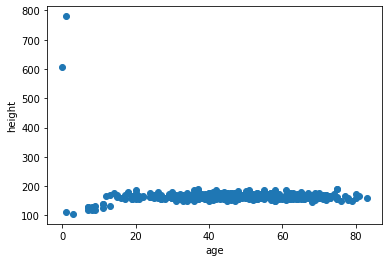

In [304]:
plt.scatter(data_raw['age'], data_raw['height'])
plt.xlabel('age')
plt.ylabel('height')
pass

Построим диаграмму рассеивания для признаков Вес и Возраст 

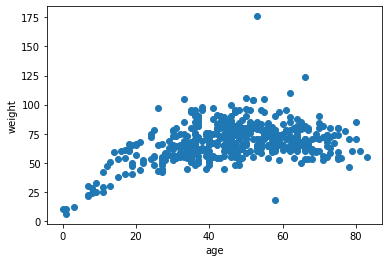

In [305]:
plt.scatter(data_raw['age'], data_raw['weight'])
plt.xlabel('age')
plt.ylabel('weight')
pass

Из построенных диаграмм видно, что некоторые точки соответствуют пациентам с чрезмерно большими и малыми значениями роста и веса. Это выбросы - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов (например, вес 176 кг) и очевидные ошибки в данных (например, рост более 600 см).  
В любом случае, выбросы мешают найти хорошее решение, и с ними рекомендуется бороться.

Для обнаружения выбросов рассмотрим более подробно квантили для признаков Рост и Вес

In [306]:
data_raw['height'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    119.255
0.010    122.040
0.050    150.000
0.100    155.000
0.500    164.000
0.900    175.000
0.950    178.000
0.990    188.980
0.995    190.000
Name: height, dtype: float64

$99.9$% всех значений признака Рост находится в диапазоне от $119.255$ до $190$ см (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соотвтетственно)

In [307]:
data_raw['weight'].quantile([0.005,.01,.015,.05,.1,.5,.9,.95,.99,.995])

0.005     10.51
0.010     19.53
0.015     23.53
0.050     45.00
0.100     52.00
0.500     68.00
0.900     86.00
0.950     94.00
0.990    105.00
0.995    108.98
Name: weight, dtype: float64

$99.9$% всех значений признака Вес находится в диапазоне от $10.51$ до $108.98$ кг (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соотвтетственно)

Удалим все строки таблицы, в которых признаки Рост или Вес выходят за пределы квантелей 0.005, 0.995.

In [308]:
rows_to_drop = data_raw[(data_raw['height'] < data_raw['height'].quantile(0.005)) | (data_raw['height'] > data_raw['height'].quantile(0.995)) | (data_raw['weight']  < data_raw['weight' ].quantile(0.005)) | (data_raw['weight']  > data_raw['weight' ].quantile(0.995))].index
data_raw = data_raw.drop(rows_to_drop)

В результате были удалены 8 строк

In [309]:
rows_to_drop

Int64Index([60, 141, 213, 254, 308, 316, 320, 424], dtype='int64')

Произведенная корректировка исходных данных отражается в новой сводной таблице

In [310]:
data_raw.describe()

age         sex     height      weight  qrs_duration  \
count  444.000000  444.000000  444.00000  444.000000    444.000000   
mean    46.873874    0.554054  164.18018   68.342342     88.801802   
std     15.886799    0.497630    9.52312   14.381136     15.223583   
min      7.000000    0.000000  120.00000   18.000000     55.000000   
25%     36.000000    0.000000  160.00000   59.750000     80.000000   
50%     47.000000    1.000000  164.00000   68.000000     86.000000   
75%     58.000000    1.000000  170.00000   78.250000     94.000000   
max     83.000000    1.000000  190.00000  106.000000    188.000000   

       p-r_interval  q-t_interval  t_interval  p_interval         qrs  ...  \
count    444.000000    444.000000  444.000000  444.000000  444.000000  ...   
mean     155.596847    368.427928  169.972973   90.335586   33.227477  ...   
std       44.582053     31.211096   35.702485   25.590410   44.887168  ...   
min        0.000000    241.000000  108.000000    0.000000 -172.000000  ...   
25%      142.000000    351.000000  148.000000   79.000000    3.750000  ...   
50%      157.000000    368.000000  162.000000   91.000000   40.000000  ...   
75%      175.000000    384.000000  178.250000  102.000000   66.000000  ...   
max      524.000000    509.000000  381.000000  205.000000  169.000000  ...   

               KY          KZ          LA          LB     LC          LD  \
count  444.000000  444.000000  444.000000  444.000000  444.0  444.000000   
mean    -0.279054    9.076126   -1.433559    0.004054    0.0    0.511486   
std      0.551491    3.452217    1.987517    0.050566    0.0    0.342845   
min     -4.100000    0.000000  -28.600000    0.000000    0.0   -0.800000   
25%     -0.400000    6.600000   -2.100000    0.000000    0.0    0.400000   
50%      0.000000    8.800000   -1.100000    0.000000    0.0    0.500000   
75%      0.000000   11.200000    0.000000    0.000000    0.0    0.700000   
max      0.000000   23.600000    0.000000    0.800000    0.0    2.400000   

               LE          LF          LG   diagnosis  
count  444.000000  444.000000  444.000000  444.000000  
mean     1.215315   19.466667   29.505405    3.873874  
std      1.420374   13.347101   17.988531    4.434865  
min     -6.000000  -44.200000  -38.600000    1.000000  
25%      0.500000   11.575000   17.875000    1.000000  
50%      1.350000   18.150000   28.100000    1.000000  
75%      2.100000   25.800000   41.125000    6.000000  
max      6.000000   88.800000   97.600000   16.000000  

[8 rows x 280 columns]

Диаграммы рассеивания после корректировки выглядят следующим образом

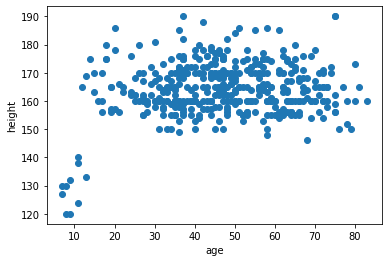

In [311]:
plt.scatter(data_raw['age'], data_raw['height'])
plt.xlabel('age')
plt.ylabel('height')
pass

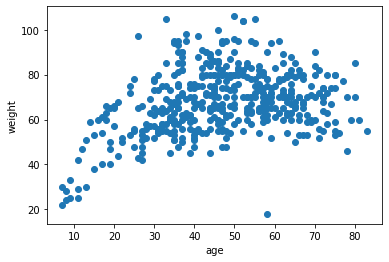

In [312]:
plt.scatter(data_raw['age'], data_raw['weight'])
plt.xlabel('age')
plt.ylabel('weight')
pass

Построим диаграмму рассеивания для признаков Диагноз и Возраст

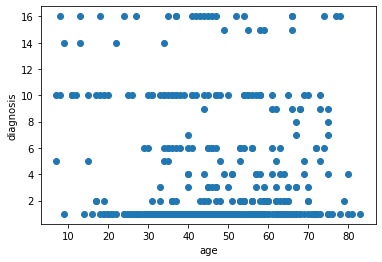

In [313]:
plt.scatter(data_raw['age'], data_raw['diagnosis'])
plt.xlabel('age')
plt.ylabel('diagnosis')
pass

Из рисунка видно, что очевидной зависимости между диагнозом и возрастом нет, однако в возрасте старше 60 лет учащаются случаи аритмии типов 7-9. Также можно отметить, что преимущественно встречаются пациенты с нормальной ЭКГ(Диагноз = 1), отсутствуют пациенты с Диагноз 11-13   

Построим диаграмму рассеивания для признаков Диагноз и Частота сердцебиения

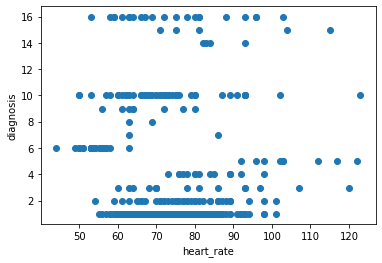

In [314]:
plt.scatter(data_raw['heart_rate'], data_raw['diagnosis'])
plt.xlabel('heart_rate')
plt.ylabel('diagnosis')
pass

Из рисунка видно, что пациенты с частотой сердцебиения 55-95 преимущественно имеют нормальную ЭКГ(Диагноз = 1), у пациентов с частотой сердцебиения более 95 присутствует аритмия   

Для отрисовки диаграммы рассеивания воспользуемся более продвинутой функцией scatterplot из модуля seaborn. Например, в следующей диаграмме цвет маркеров соответствует признаку Пол, а размер - признаку Частота сердцебиения

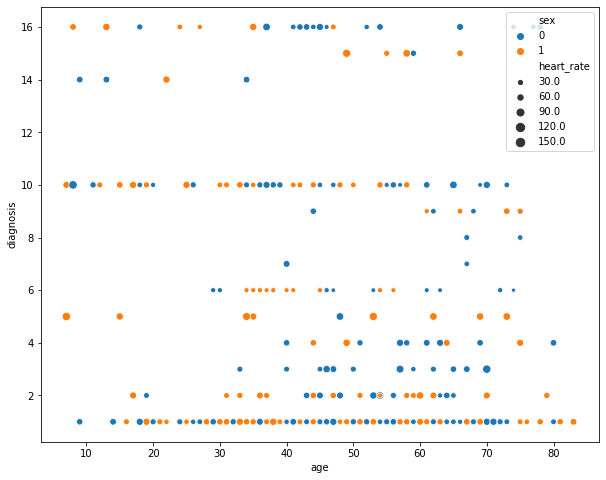

In [315]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=444, replace=False)
plt.figure(figsize = (10, 8))
sns.scatterplot(x='age', y='diagnosis', size='heart_rate', hue='sex', data=data_raw.iloc[random_subset], alpha=1)
pass

Можно заметить, что Диагнозы 5 и 15 в основном наблюдаются у женщин, а Диагнозы 3, 7, 8, 14 - у мужчин. Пациенты с высокой частотой сердцебиения в основном имеют Диагноз 5.

Построим все возможные диаграммы рассеивания для каждой пары переменных Диагноз, Возраст, Вес, Частота сердцебиений. Цвет маркеров соответствует признаку Пол. На диагонали расположены гистограммы распределения признаков. 

H:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
H:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


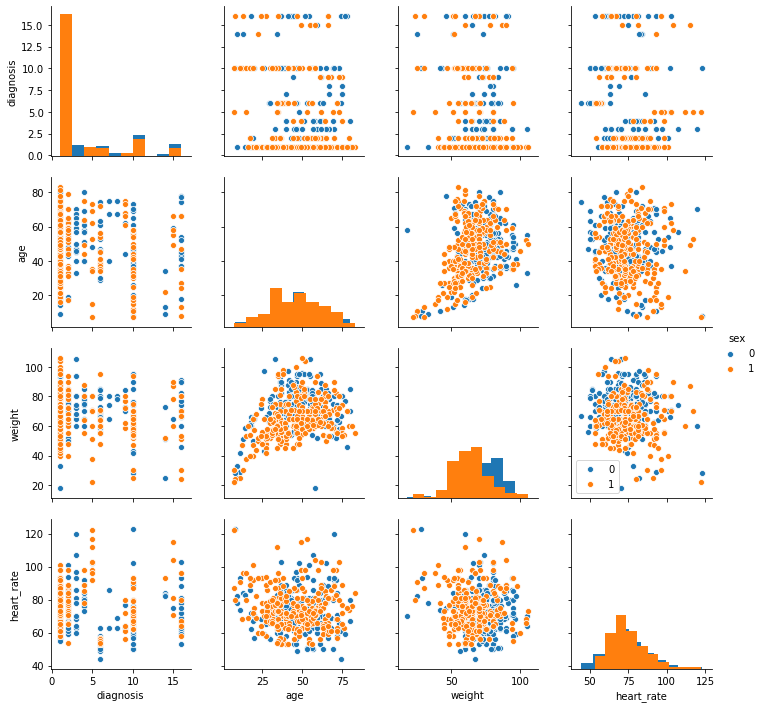

In [316]:
sns.pairplot(data_raw.iloc[random_subset], hue='sex',vars = ['diagnosis','age','weight','heart_rate'], diag_kind='hist')
plt.legend()
pass

Диаграммы рассеивания для пар первых 5 переменных датасета (Возраст, Пол, Рост, Вес, QRS)

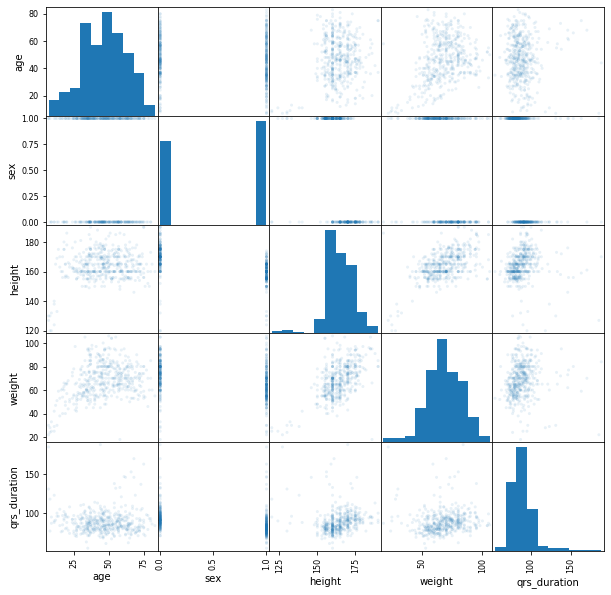

In [317]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw.loc[:,:'qrs_duration'], alpha = .1, figsize = (10, 10))
pass

С помощю функции distplot из библиотеки seaborn построим отдельные гистограммы.

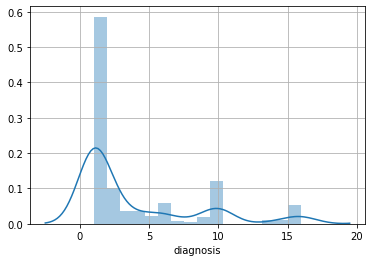

In [318]:
sns.distplot(data_raw['diagnosis'], bins=16)
plt.grid()
pass

Пациенты из датасета чаще всего имеют нормальную ЭКГ(Диагноз = 1)

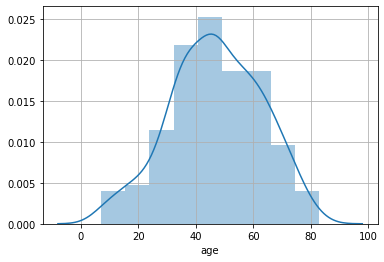

In [319]:
sns.distplot(data_raw['age'], bins=9)
plt.grid()
pass

Большая часть пациентов из датасета имеет возраст 40-50 лет

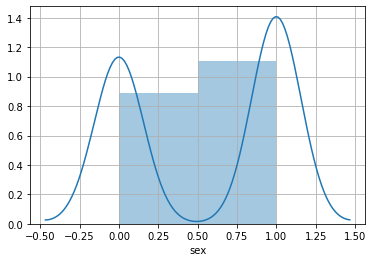

In [320]:
sns.distplot(data_raw['sex'], bins=2)
plt.grid()
pass

Среди пациентов из датасета большинство составляют женщины

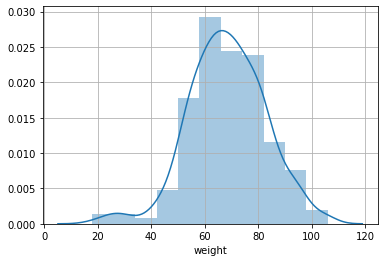

In [321]:
sns.distplot(data_raw['weight'], bins=11)
plt.grid()
pass

Пациенты из датасета с наибольшей вероятностью имеют вес 60-70 кг

H:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
H:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


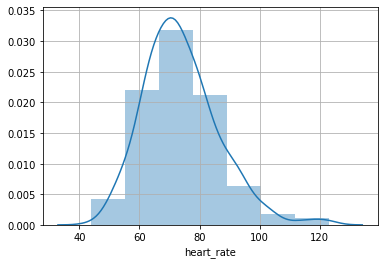

In [322]:
sns.distplot(data_raw['heart_rate'], bins=7)
plt.grid()
pass

Пациенты из датасета с наибольшей вероятностью имеют частоту сердцебиения 70 ударов в минуту

Рассмотрим другой способ визуального представления распределения - бокс-диаграмму (ящик с усами). Нижний и верхний концы ящика соответствуют 1-ому и 3-ему квартилям (25% и 75%), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Нижний ус продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

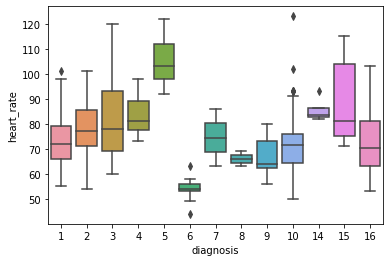

In [323]:
sns.boxplot(x="diagnosis", y="heart_rate", data=data_raw)
pass

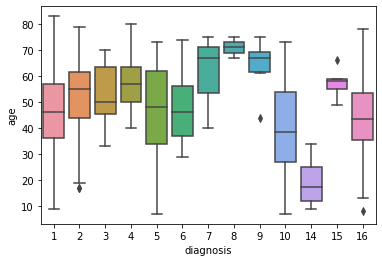

In [324]:
sns.boxplot(x="diagnosis", y="age", data=data_raw)
pass

Также информацию о характере распределения можно получить из скрипичных графиков (violin plots). В этом случае изображают графики аппроксимации плотности вероятности.

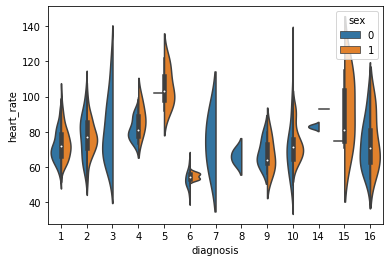

In [325]:
sns.violinplot(x="diagnosis", y="heart_rate", hue='sex', split=True, data=data_raw)
pass

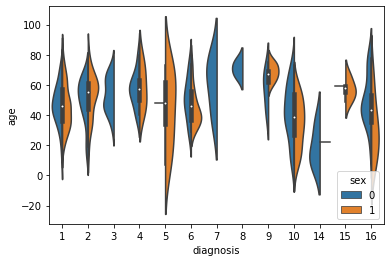

In [326]:
sns.violinplot(x="diagnosis", y="age", hue='sex', split=True, data=data_raw)
pass

Вычислим матрицу корреляции признаков

In [327]:
corr_mat = data_raw.corr()
corr_mat

age       sex    height    weight  qrs_duration  \
age           1.000000 -0.087650  0.172362  0.316742     -0.005732   
sex          -0.087650  1.000000 -0.551748 -0.316124     -0.342142   
height        0.172362 -0.551748  1.000000  0.562361      0.061439   
weight        0.316742 -0.316124  0.562361  1.000000      0.086796   
qrs_duration -0.005732 -0.342142  0.061439  0.086796      1.000000   
...                ...       ...       ...       ...           ...   
LD            0.003168  0.027445 -0.004023  0.003275     -0.071227   
LE           -0.273803  0.076112 -0.057362 -0.155479     -0.254790   
LF           -0.011760  0.029670  0.038587  0.020819      0.115863   
LG           -0.223661  0.056731 -0.007518 -0.082096     -0.132949   
diagnosis    -0.080740 -0.174879 -0.017580 -0.071701      0.326254   

              p-r_interval  q-t_interval  t_interval  p_interval       qrs  \
age               0.043318      0.144683    0.013712    0.095001 -0.246489   
sex              -0.044141      0.070014   -0.188086   -0.085538  0.084993   
height            0.085965     -0.006814    0.048667    0.123539 -0.119113   
weight            0.149861      0.067154    0.141224    0.133268 -0.161848   
qrs_duration      0.024268      0.209401    0.387432    0.052071 -0.131646   
...                    ...           ...         ...         ...       ...   
LD                0.125231     -0.017084    0.054152    0.237552  0.075415   
LE                0.058015     -0.064770   -0.199467    0.013285  0.078358   
LF               -0.024852      0.225410    0.115167   -0.015609  0.329017   
LG                0.021320      0.097214   -0.044037    0.004349  0.301207   
diagnosis        -0.104256      0.028506    0.097551   -0.124934  0.019104   

              ...        KY        KZ        LA        LB  LC        LD  \
age           ...  0.173388 -0.201420  0.058402  0.092524 NaN  0.003168   
sex           ...  0.227407 -0.049441  0.094387  0.027155 NaN  0.027445   
height        ... -0.059518 -0.023866  0.060548  0.006918 NaN -0.004023   
weight        ...  0.075884 -0.094736  0.015313  0.054273 NaN  0.003275   
qrs_duration  ... -0.203764  0.080870 -0.237420 -0.013323 NaN -0.071227   
...           ...       ...       ...       ...       ...  ..       ...   
LD            ... -0.087712  0.016424 -0.081688 -0.019619 NaN  1.000000   
LE            ...  0.119383  0.095737 -0.066514 -0.017524 NaN -0.053902   
LF            ...  0.001696  0.663270  0.553346 -0.053046 NaN -0.055758   
LG            ...  0.083053  0.562179  0.340756 -0.051668 NaN -0.066248   
diagnosis     ... -0.166709  0.039789 -0.070831 -0.036972 NaN -0.096734   

                    LE        LF        LG  diagnosis  
age          -0.273803 -0.011760 -0.223661  -0.080740  
sex           0.076112  0.029670  0.056731  -0.174879  
height       -0.057362  0.038587 -0.007518  -0.017580  
weight       -0.155479  0.020819 -0.082096  -0.071701  
qrs_duration -0.254790  0.115863 -0.132949   0.326254  
...                ...       ...       ...        ...  
LD           -0.053902 -0.055758 -0.066248  -0.096734  
LE            1.000000 -0.133021  0.690260  -0.038789  
LF           -0.133021  1.000000  0.604050   0.002865  
LG            0.690260  0.604050  1.000000  -0.019728  
diagnosis    -0.038789  0.002865 -0.019728   1.000000  

[280 rows x 280 columns]

Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

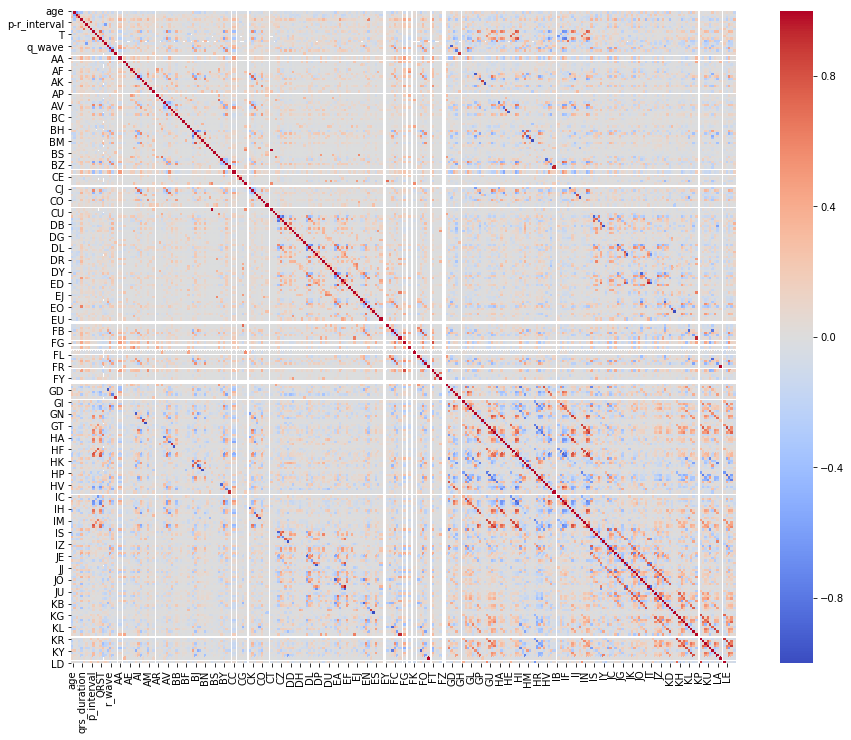

In [328]:
plt.figure(figsize = (16, 12))
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения (0.85):

In [329]:
corr_mat.where(np.triu((corr_mat) > 0.85, k=1)).stack().sort_values(ascending=False)

BR       CT    1.000000
FR       LB    0.997769
ED       JS    0.966664
CA       IA    0.941494
FE       KO    0.933495
BL       HN    0.932209
HB       II    0.923895
AZ       HD    0.922481
R'_wave  GG    0.916792
HH       IO    0.915390
GO       II    0.913590
KR       LD    0.895539
KM       KZ    0.888043
KU       LG    0.885976
HI       IP    0.885624
GY       IP    0.882519
KJ       KU    0.874796
AK       GR    0.873820
GV       IO    0.867268
EP       KE    0.865637
IO       IP    0.862257
KS       LE    0.860793
GT       IM    0.860248
JI       JT    0.856521
CM       IK    0.855533
dtype: float64

Найдем коэффициенты корреляции между Диагнозом и Возрастом/Частотой сердцебиения/Весом/QRS

In [330]:
corr_mat.loc['diagnosis', 'age'],corr_mat.loc['diagnosis', 'heart_rate'],corr_mat.loc['diagnosis', 'weight'],corr_mat.loc['diagnosis','qrs_duration']

(-0.08074039400508339,
 0.004136396231174231,
 -0.07170103149139699,
 0.3262536548288817)

Определим, сколько раз переменная Диагноз принимает то или иное значение

In [331]:
data_raw.diagnosis.value_counts()

1     244
10     50
2      42
6      25
16     22
4      15
3      15
5       9
9       8
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

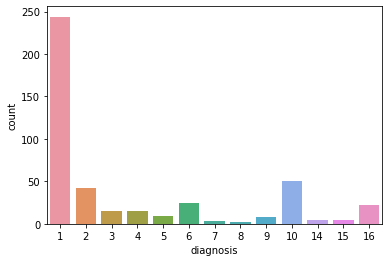

In [332]:
sns.countplot(x='diagnosis', data=data_raw)
pass

Среди 444 пациентов из датасета:
- наибольшее число пациентов (244) имеют нормальную ЭКГ (Диагноз = 1)
- второй по распространенности (у 50 пациентов) Диагноз = 10
- пациентов с диагнозами 11-13 нет
- у 22 пациентов диагноз не классифицирован (Диагноз = 16)

Определим, сколько среди пациентов из ддатасета женщин и мужчин

In [333]:
data_raw.sex.value_counts()

1    246
0    198
Name: sex, dtype: int64

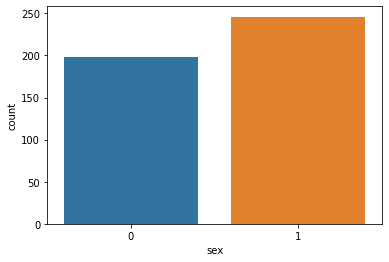

In [334]:
sns.countplot(x='sex', data=data_raw)
pass

Среди 444 пациентов из датасета 246 женщин и 198 мужчин

Сравним распределение мужчин и женщин по Дигнозу

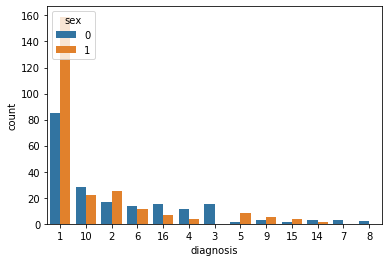

In [335]:
sns.countplot(x='diagnosis', order=data_raw.diagnosis.value_counts().index, hue='sex', data=data_raw)
pass

Пропущенные значения в таблице представлены значениями NaN 

In [336]:
df = data_raw.iloc[:4, 9:14]
df

qrs     T     P  QRST     J
0  -16  13.0  64.0  -2.0   NaN
1   25  37.0 -17.0  31.0   NaN
2   96  34.0  70.0  66.0  23.0
3   28  11.0  -5.0  20.0   NaN

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам

In [337]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

In [338]:
df = data_raw.iloc[:4, 9:14]
df

qrs     T     P  QRST     J
0  -16  13.0  64.0  -2.0 -64.0
1   25  37.0 -17.0  31.0 -64.0
2   96  34.0  70.0  66.0  23.0
3   28  11.0  -5.0  20.0 -64.0

Для предсказания Диагноза будем использовать все признаки

# Binary

Сведем задачу предсказания Диагноза к бинарному случаю, когда признак Диагноз может принимать только 2 значения: 0 (у пациента нормальная ЭКГ, т.е Диагноз = 1) и 1 (во всех остальных случаях, т.е Диагноз = 2..16)

In [339]:
X = data_raw.drop('diagnosis', axis = 1)
y = data_raw['diagnosis']
feature_names = X.columns

In [340]:
type(feature_names)

pandas.core.indexes.base.Index

In [341]:
feature_names

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KV', 'KY', 'KZ', 'LA', 'LB', 'LC', 'LD', 'LE', 'LF', 'LG'],
      dtype='object', length=279)

In [342]:
X = X.to_numpy()

In [343]:
y = np.array(y != 1, dtype='int')
y

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [344]:
print(X.shape)
print(y.shape)
N, d = X.shape

(444, 279)
(444,)


In [345]:
type(X)

numpy.ndarray

In [346]:
type(y)

numpy.ndarray

Разобьем данные на обучающую и тестовую выборки в пропорции 2:1

In [347]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

310 134


Обучающая выборка имеет вид:

In [348]:
print(X_train)

[[ 54.    0.  164.  ...  -2.2  47.2  19.5]
 [ 63.    1.  167.  ...   0.4  14.9  17.1]
 [ 58.    1.  170.  ...   1.2  22.2  31. ]
 ...
 [ 47.    0.  175.  ...   0.9  21.4  30.2]
 [ 41.    1.  154.  ...   1.4  17.8  29.5]
 [ 27.    0.  170.  ...   3.7  56.4  87.4]]


## Knn Method

Одним из самых простых алгоритмов машинного обучения является алгоритм k ближайших соседей. Построение модели заключается в запоминании обучающего набора данных. Для того, чтобы сделать прогноз для новой точки данных, алгоритм находит ближайшие к ней точки обучающего набора, то есть находит «ближайших соседей».Затем точке тестового набора присваивается наиболее часто встречающийся класс (набравший большинство среди k ближайших соседей). 

Просмотр матрицы неточностей (confиsion тatrix) - способ оценки производительности классификатора.  Общая идея заключается в том, чтобы подсчитать, сколько раз образцы класса А были отнесены к классу В. Каждая строка в матрице неточностей представляет фактический класс, а каждый столбец - спрогнозированный класс.Безупречный классификатор имел бы только истинно положительные и истинно отрицательные классификации, так что его матрица
неточностей содержала бы ненулевые значения только на своей главной диагонали (от левого верхнего до правого нижнего угла).

Точность (precision) классификатора -  аккуратность положительных классификаций. Точность = ТР/(ТР + FP), где ТР - количество истинно положительных классификаций, FP - количество ложноположительных классификаций. 

Полнота (recal), также называемая чувствительностью (sensitivity) или долей истинно положительных классификаций (True Positive Rate - TPR) это коэффициент положительных образцов, которые корректно обнаружены классификатором. Полнота=ТР/(ТР + FN), где ТР - количество истинно положительных классификаций, FN - количество ложноотрицательных классификаций. 

Часто, особенно если нужен простой способ сравнения двух классификаторов, точность и полноту  объединяют в единственную метрику - меру. Мера F1 (F1 score) - это среднее гармоническое (harmonic теап) точности и полноты.
Мера F1 =2* точность* полнота * (точность + полнота)
В то время как обычное среднее трактует все значения одинаково, среднее гармоническое придает низким значениям больший вес. В результате классификатор получит высокую меру F1, только если высокими являются и полнота, и точность. 

In [349]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    y_train_predict = knn.predict(X_train)
    err_train  = np.mean(y_train  != y_train_predict)
    #print(y_test_predict,y_train_predict)
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_train,y_train_predict))
    print("Mera F1 Train:",f1_score(y_train,y_train_predict))
    print("Precision Score Train: ",precision_score(y_train, y_train_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_train, y_train_predict, pos_label='positive',average='micro'))
    i=i+1

neighbours = 2 err_train = 0.24516129032258063 err_test = 0.3582089552238806
[[170   0]
 [ 76  64]]
Mera F1 Train: 0.6274509803921569
Precision Score Train:  0.7548387096774194
Recall Score Train:  0.7548387096774194
neighbours = 3 err_train = 0.19032258064516128 err_test = 0.3358208955223881
[[163   7]
 [ 52  88]]
Mera F1 Train: 0.7489361702127659
Precision Score Train:  0.8096774193548387
Recall Score Train:  0.8096774193548387
neighbours = 5 err_train = 0.25161290322580643 err_test = 0.373134328358209


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


[[162   8]
 [ 70  70]]
Mera F1 Train: 0.6422018348623854
Precision Score Train:  0.7483870967741936
Recall Score Train:  0.7483870967741936
neighbours = 7 err_train = 0.2870967741935484 err_test = 0.3656716417910448
[[163   7]
 [ 82  58]]
Mera F1 Train: 0.5658536585365854
Precision Score Train:  0.7129032258064516
Recall Score Train:  0.7129032258064516
neighbours = 10 err_train =

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


 0.34516129032258064 err_test = 0.3880597014925373
[[169   1]
 [106  34]]
Mera F1 Train: 0.3885714285714286
Precision Score Train:  0.6548387096774193
Recall Score Train:  0.6548387096774193
neighbours = 15 err_train = 0.3387096774193548 err_test = 0.3880597014925373
[[169   1]
 [104  36]]
Mera F1 Train: 0.40677966101694907
Precision Score Train:  0.6612903225806451
Recall Score Train:  0.6612903225806451
neighbours =

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


 20 err_train = 0.3774193548387097 err_test = 0.40298507462686567
[[169   1]
 [116  24]]
Mera F1 Train: 0.2909090909090909
Precision Score Train:  0.6225806451612903
Recall Score Train:  0.6225806451612903
neighbours = 50 err_train = 0.43870967741935485 err_test = 0.417910447761194
[[170   0]
 [136   4]]
Mera F1 Train: 0.05555555555555556
Precision Score Train:  0.5612903225806452
Recall Score Train:  0.5612903225806452


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 100 err_train = 0.45161290322580644 err_test = 0.44776119402985076
[[170   0]
 [140   0]]
Mera F1 Train: 0.0
Precision Score Train:  0.5483870967741935
Recall Score Train:  0.5483870967741935


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


## SGDClassifer

Rлассификатор на основе метода стохастического градиентного спуска (Stochastic Gradient Descent - SGD) способен эффективно обрабатывать очень крупные наборы данных. Отчасти это связано с тем, что SGD использует обучающие образцы независимым образом по одному за раз.Класс SGDClassifier полагается на неупорядоченность во время обучения (отсюда и название метода "стохастический"). 

In [350]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

Функция cross_val_predict () выполняет перекрестную проверку по К блокам, но вместо сумм очков оценки возвращает прогнозы, выработанные на каждом испытательном блоке. Это значит, что мы получим чистый прогноз для каждого образца в обучающем наборе ("чистый" означает, что прогноз сделан моделью, которая никогда не видела данные во время обучения). 


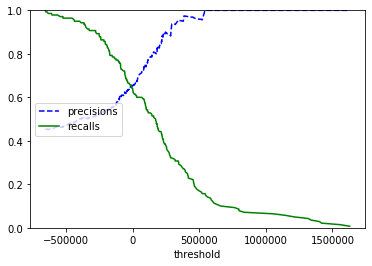

In [351]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf,X_train,y_train,cv=3,method="decision_function")
precisions,recalls,thresholds=precision_recall_curve(y_train,y_scores)
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="precisions") #tochnost
    plt.plot(thresholds,recalls[:-1],"g-",label="recalls") #polnota
    plt.xlabel("threshold")#porog
    plt.legend(loc="center left")
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

 Рисунок. Точность и полнота в сравнении с порогом принятия решения 

Text(0, 0.5, 'precisions')

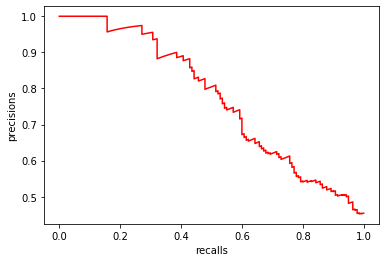

In [352]:
plt.plot(recalls,precisions,"r-")
plt.xlabel("recalls")
plt.ylabel("precisions")

Рисунок. Зависимость точности от полноты

Кривая рабочей характеристики приемника (Receiver Operatiпg Characteristic - ROC) похожа на кривую точности-полноты (precisioп-recall (PR) cиrve), но вместо вычерчивания точности в сравнении с полнотой кривая ROC изображает долю истинно
положительных классификаций (другое название полноты) по отношению к
доле ложноположительных классификаций (False Positive Rate - FPR). Доля
FPR - это пропорция отрицательных образцов, которые были некорректно классифицированы как положительные. FPR = 1 - TNR, где TNR - специфичность (specificity), или доля истинно отрицательных классификаций (Тrие Negative Rate), представляющая собой пропорцию отрицательных образцов, которые были корректно классифицированы как отрицательные.
Кривая ROC изображает чувствительность (seпsitivity), т.е. полноту, в сравнении с 1 - специфичность. 

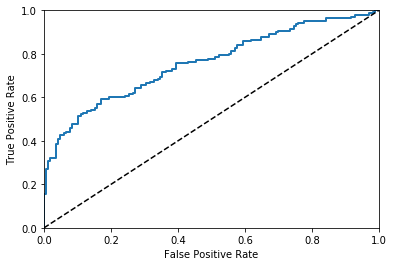

In [353]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds= roc_curve(y_train, y_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2 , label=label )
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve (fpr,tpr)
plt.show()

Измерение площади под кривой (Area Under the Curve - АИС) - один из способов сравнения классификаторов. Безупречный классификатор будет иметь площадь под кривой ROC (ROC АИС), равную 1, чисто случайный классификатор - площадь 0.5.

In [354]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_scores)

0.7571848739495798

Сравним кривую ROC и показатель ROC AUC классификатора RandomForestClassifier и с классификатором SGDClassifier.

In [355]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42 )
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train,cv=3,method="predict_proba") 

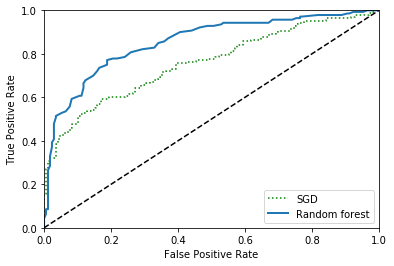

In [356]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train,y_scores_forest)
plt.plot(fpr,tpr,"g:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random forest")
plt.legend(loc="lower right")
plt.show()

На рисунке видно, что кривая ROC классификатора RandomForestClassifier выглядит гораздо лучше кривой ROC классификатора SGDClassifier:она расположена намного ближе к левому верхнему углу.
Как результат, его показатель ROC AUC также значительно лучше: 

In [357]:
roc_auc_score(y_train,y_scores_forest)

0.8545588235294118

## Support Vector Classifier

Support vector classifier – классификатор опорных векторов.
Опорные вектора - точки, которые лежат на границе между классами. Важны для
определения границы принятия решений.
Чтобы получить прогноз для новой точки, измеряется расстояние до каждого опорного вектора. Классификационное решение принимается, исходя из расстояний до опорных векторов, а также важности опорных векторов, полученных в процессе обучения.

In [358]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.0 0.44776119402985076


# Plural

In [359]:
X = data_raw.drop('diagnosis', axis = 1)
#X = data.dropna
#X = data.drop('Class', axis = 1)# выбрасываем столбец 'class'
y = data_raw['diagnosis']
feature_names = X.columns

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [361]:
type(X)

pandas.core.frame.DataFrame

In [362]:
some_digit = X.loc[0]

In [363]:
some_digit

age              75.0
sex               0.0
height          190.0
weight           80.0
qrs_duration     91.0
                ...  
LC                0.0
LD                0.9
LE                2.9
LF               23.3
LG               49.4
Name: 0, Length: 279, dtype: float64

In [364]:
y

0       8
1       6
2      10
3       1
4       7
       ..
447     1
448    10
449     2
450     1
451     1
Name: diagnosis, Length: 444, dtype: int64

In [365]:
y.loc[0]

8

In [366]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([10], dtype=int64)

предсказание SGDClassifier выдало 10 вместо 8?

In [367]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores 

array([[  -20978.31692789,  -299959.63270707,  -826694.61330342,
         -419798.82311642,  -367689.41807697,  -129122.80666684,
          -50407.23115746,  -754219.24463688,   -14008.37354285,
         -708103.76811621, -1082482.22076914,  -288262.4167706 ]])

максимальное число 10, т.е тоже ошибка?

In [368]:
sgd_clf.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 14, 15, 16], dtype=int64)

отсутсвуют классы 11,12,13

In [369]:
sgd_clf.classes_[5]

6

In [370]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit]) 

array([1], dtype=int64)

## Knn method

neighbours = 2 err_train = 0.29354838709677417 err_test = 0.39552238805970147
[[170   0   0   0   0   0   0   0   0   0   0   0]
 [ 19  15   0   0   0   0   0   0   0   0   0   0]
 [  1   0   8   0   0   0   0   0   0   0   0   0]
 [  4   0   0   4   0   0   0   0   0   0   0   0]
 [  6   0   0   0   1   0   0   0   0   0   0   0]
 [ 15   0   0   0   0   3   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   4   0   0   0   0]
 [ 17   0   0   0   1   4   0   0  11   0   0   0]
 [  1   1   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   3   0]
 [ 11   3   0   1   0   0   0   0   2   0   1   0]]


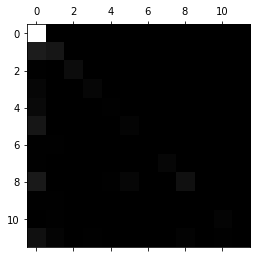

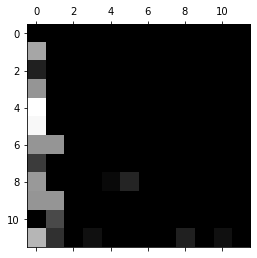

Mera F1 Train: 0.7064516129032258
Precision Score Train:  0.7064516129032258
Recall Score Train:  0.7064516129032258


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 3 err_train = 0.29354838709677417 err_test = 0.3805970149253731
[[168   0   0   1   0   1   0   0   0   0   0   0]
 [ 20  14   0   0   0   0   0   0   0   0   0   0]
 [  2   0   7   0   0   0   0   0   0   0   0   0]
 [  4   0   0   4   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   1   0   0   0]
 [ 12   0   0   0   0   6   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   4   0   0   0   0]
 [ 19   1   0   0   0   0   0   0  13   0   0   0]
 [  1   1   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   3   0]
 [ 15   2   0   0   0   0   0   0   0   0   1   0]]


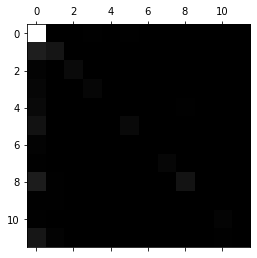

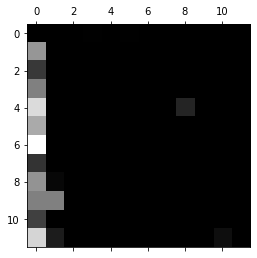

Mera F1 Train: 0.7064516129032258
Precision Score Train:  0.7064516129032258
Recall Score Train:  0.7064516129032258
neighbours = 5 err_train = 0.3419354838709677 err_test = 0.417910447761194
[[166   3   0   0   0   1   0   0   0   0   0   0]
 [ 18  15   0   0   0   0   0   0   0   0   1   0]
 [  2   0   7   0   0   0   0   0   0   0   0   0]
 [  4   0   0   4   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   1   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  1   1   1   0   0   0   0   2   0   0   0   0]
 [ 24   0   0   0   0   0   0   0   9   0   0   0]
 [  1   1   0   0   0   0   0   0   0   0   0   0]
 [  2   1   0   0   0   0   0   0   0   0   1   0]
 [ 15   2   0   0   0   0   0   0   0   0   1   0]]


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


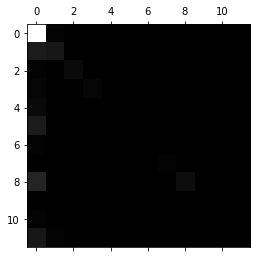

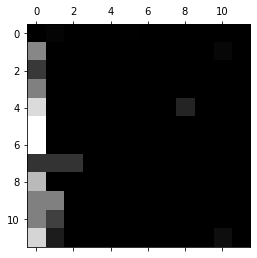

Mera F1 Train: 0.6580645161290323
Precision Score Train:  0.6580645161290323
Recall Score Train:  0.6580645161290323
neighbours = 7 err_train = 0.36451612903225805 err_test = 0.4253731343283582
[[169   1   0   0   0   0   0   0   0   0   0   0]
 [ 25   9   0   0   0   0   0   0   0   0   0   0]
 [  2   0   7   0   0   0   0   0   0   0   0   0]
 [  6   0   0   2   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   1   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   1   0   0   0   0   1   0   0   0   0]
 [ 25   1   0   0   0   0   0   0   7   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   2   0]
 [ 16   2   0   0   0   0   0   0   0   0   0   0]]


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


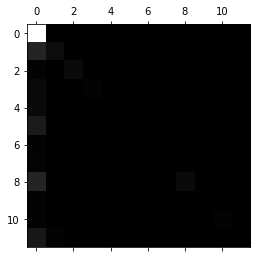

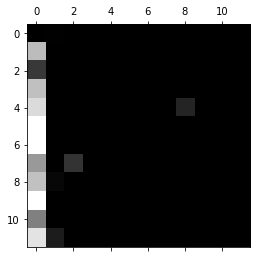

Mera F1 Train: 0.635483870967742
Precision Score Train:  0.635483870967742
Recall Score Train:  0.635483870967742
neighbours = 10 err_train = 0.4032258064516129 err_test = 0.44029850746268656
[[169   1   0   0   0   0   0   0   0   0   0   0]
 [ 25   8   0   0   0   0   0   0   0   0   1   0]
 [  4   0   5   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   1   0   0   0   0   0   0   0   0   0]
 [ 31   0   0   0   0   0   0   0   2   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   1   0]
 [ 17   1   0   0   0   0   0   0   0   0   0   0]]


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


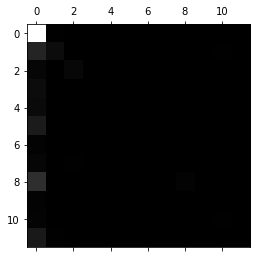

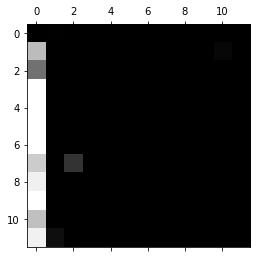

Mera F1 Train: 0.5967741935483871
Precision Score Train:  0.5967741935483871
Recall Score Train:  0.5967741935483871
neighbours = 15 err_train = 0.4290322580645161 err_test = 0.44776119402985076
[[170   0   0   0   0   0   0   0   0   0   0   0]
 [ 29   5   0   0   0   0   0   0   0   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   0]
 [ 31   0   0   0   0   0   0   0   2   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  3   1   0   0   0   0   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0   0   0]]


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


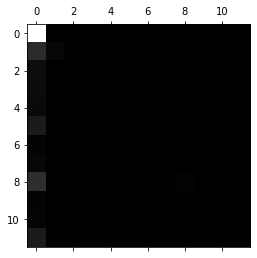

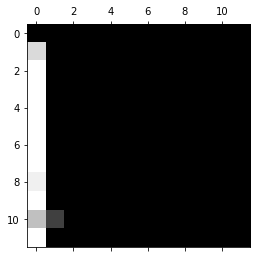

Mera F1 Train: 0.5709677419354838
Precision Score Train:  0.5709677419354838
Recall Score Train:  0.5709677419354838
neighbours = 20 err_train = 0.44193548387096776 err_test = 0.44776119402985076
[[170   0   0   0   0   0   0   0   0   0   0   0]
 [ 33   1   0   0   0   0   0   0   0   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   0]
 [ 31   0   0   0   0   0   0   0   2   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0   0   0]]


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


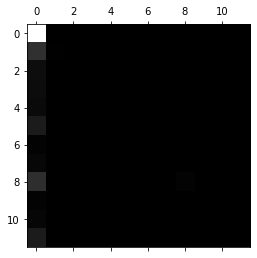

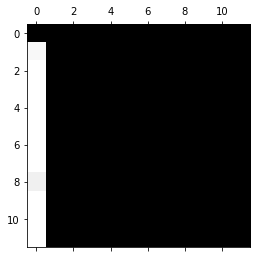

Mera F1 Train: 0.5580645161290323
Precision Score Train:  0.5580645161290323
Recall Score Train:  0.5580645161290323
neighbours = 50 err_train = 0.45161290322580644 err_test = 0.44776119402985076
[[170   0   0   0   0   0   0   0   0   0   0   0]
 [ 34   0   0   0   0   0   0   0   0   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   0]
 [ 33   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0   0   0]]


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


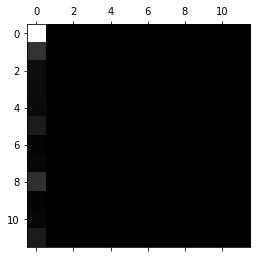

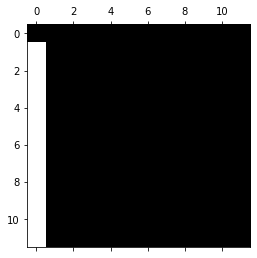

Mera F1 Train: 0.5483870967741935
Precision Score Train:  0.5483870967741935
Recall Score Train:  0.5483870967741935
neighbours = 100 err_train = 0.45161290322580644 err_test = 0.44776119402985076
[[170   0   0   0   0   0   0   0   0   0   0   0]
 [ 34   0   0   0   0   0   0   0   0   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   0]
 [ 33   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0   0   0]]


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


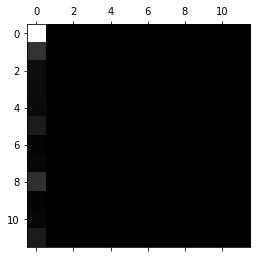

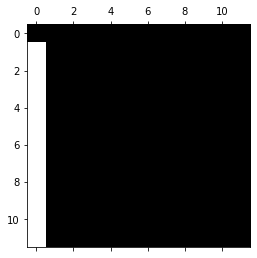

Mera F1 Train: 0.5483870967741935
Precision Score Train:  0.5483870967741935
Recall Score Train:  0.5483870967741935


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [371]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    y_train_predict = knn.predict(X_train)
    err_train  = np.mean(y_train  != y_train_predict)
    #print(y_test_predict,y_train_predict)
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_train,y_train_predict))
    confmx=confusion_matrix(y_train,y_train_predict)
    plt.matshow(confusion_matrix(y_train,y_train_predict),cmap=plt.cm.gray)
    plt.show()
    row_sums = confmx.sum ( axis=1 , keepdims=True )
    norm_conf_mx = confmx / row_sums 
    np.fill_diagonal (norm_conf_mx, 0 )
    plt.matshow ( norm_conf_mx, cmap=plt.cm.gray)
    plt.show ()
    print("Mera F1 Train:",f1_score(y_train,y_train_predict,pos_label='positive',average='micro'))
    print("Precision Score Train: ",precision_score(y_train, y_train_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_train, y_train_predict, pos_label='positive',average='micro'))
    i=i+1

на первом графике матрицы неточностей в виде изображения не все изображения на главной диагонали, что уже говорит о неточной классификации, далее ситуация хуже

In [372]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [373]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit]) 

array([1], dtype=int64)

In [374]:
forest_clf.fit(X_train,y_train)
forest_clf.predict((X_train)) 

array([ 2,  1,  1,  1,  6, 15, 10,  1,  1,  1,  1,  1, 16,  1,  1,  1,  1,
       16,  1,  4, 16,  1,  4,  6,  1, 16, 10,  1, 10, 16,  1, 10,  1,  1,
        1,  1,  1,  2,  5,  1,  1,  1,  1,  1,  3,  3,  1,  1,  1,  1,  1,
        7,  1,  1,  1,  2,  2,  3, 10,  6,  2,  1,  1,  4,  1,  2,  2, 10,
        1, 10,  1,  1,  3,  1,  2, 10, 10,  5, 16,  6, 16,  1, 14,  1, 10,
        2,  1,  2,  1,  1,  1,  1, 10, 10,  1,  1,  3,  2,  6,  1,  2,  5,
        1,  1,  2,  3,  1,  1,  1,  1,  1,  4,  4, 16,  6,  1,  3,  2,  2,
        6,  4,  6,  1,  1,  1,  1, 16,  1,  1,  2,  1,  1,  1,  1,  1, 10,
        1,  1,  2, 16,  1, 16,  1,  6,  1,  5,  2,  1, 10,  1,  1,  1,  2,
        1,  2,  2, 14,  1, 10,  1,  2,  1, 10,  3,  1, 10, 10,  1, 15,  1,
        1,  1,  1, 10,  1,  1,  5,  2,  7,  1,  1,  1,  1, 16,  2, 10,  1,
        2,  3,  1,  1,  1,  1, 10,  1,  5, 10, 16,  1,  1,  1,  1,  6,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1, 16,  6,  1, 10,  1,
       10,  1,  1, 16,  1

In [375]:
forest_clf.fit(X_test,y_test)
forest_clf.predict([some_digit]) 

array([8], dtype=int64)

In [376]:
forest_clf.fit(X_test,y_test)
forest_clf.predict(X_test) 

array([10,  1,  1,  2,  1, 10,  1,  1,  1,  3,  1,  1,  1,  9,  1,  1, 10,
        1,  2,  1, 10,  1,  6,  1,  6, 10, 10,  2,  1,  1,  1,  1,  6,  1,
        1, 10,  3,  1,  1, 10, 16,  6,  3,  1,  1,  4,  1,  1, 16, 10,  3,
        1,  1,  9,  1,  1,  1,  8,  1,  1,  1,  1,  8,  1,  3,  1,  1, 10,
        1, 16, 10, 16,  6,  1, 15, 10,  6,  1,  1,  1,  1,  5, 10,  2,  1,
        4,  1,  1,  1,  1,  1,  4,  1,  1,  9,  7,  4,  1,  1,  1,  1,  1,
        1,  1,  2,  4,  2, 14,  4,  1,  1,  1,  6, 10, 10,  2, 10,  1,  1,
        1,  5,  1, 10,  1,  1,  3,  1,  2,  1,  1, 14,  1,  4,  1],
      dtype=int64)

In [377]:
y_test

341    10
138     1
73      1
372     2
74      1
       ..
170     1
26     14
7       1
410     4
109     1
Name: diagnosis, Length: 134, dtype: int64

In [378]:
y_train

323     2
421     1
119     1
115     1
364     6
       ..
107     1
274     1
355     1
443    10
103     1
Name: diagnosis, Length: 310, dtype: int64

In [379]:
y_train.iloc[31]

10

In [380]:
forest_clf.fit(X_test,y_test)

RandomForestClassifier(random_state=42)

In [381]:
err_test  = np.mean(y_test  != forest_clf.predict(X_test))
print('forest_clf_err_test =',err_test)

forest_clf_err_test = 0.0


In [382]:
err_train  = np.mean(y_train  != forest_clf.predict(X_train))
print('forest_clf_err_train =',err_train)

forest_clf_err_train = 0.33225806451612905


In [383]:
forest_clf.predict_proba([ some_digit ])

array([[0.15, 0.01, 0.01, 0.09, 0.  , 0.02, 0.  , 0.7 , 0.  , 0.01, 0.01,
        0.  , 0.  ]])

дерево говорит, что класс 1, т.к там 0.5, что тоже ошибка

Text(0, 0.5, 'precisions')

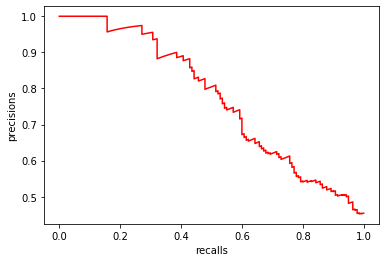

In [384]:
plt.plot(recalls,precisions,"r-")
plt.xlabel("recalls")
plt.ylabel("precisions")

In [385]:
cross_val_score ( sgd_clf , X_train , y_train ,cv=3 , scoring="accuracy")


H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


array([0.65384615, 0.66990291, 0.70873786])

In [386]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
X_train_scaled = scaler.fit_transform (X_train.astype(np.float64))
cross_val_score(sgd_clf , X_train_scaled, y_train,cv=3,scoring="accuracy") 

H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


array([0.64423077, 0.66019417, 0.67961165])

In [387]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train, cv=3 )
confmx = confusion_matrix ( y_train,y_train_pred)
confmx

H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


array([[146,   5,   0,   0,   0,   7,   1,   0,   3,   0,   0,   8],
       [  9,  19,   2,   0,   0,   1,   1,   0,   0,   0,   1,   1],
       [  0,   2,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   8,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   2,   1,   0,   1,   0,   0,   0,   0,   0,   0,   1],
       [ 12,   1,   1,   0,   0,   2,   0,   0,   1,   0,   0,   1],
       [  1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   3,   0,   1,   0,   0],
       [  6,   2,   1,   0,   1,   2,   0,   0,  19,   1,   0,   1],
       [  1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 11,   1,   0,   0,   0,   2,   2,   0,   1,   0,   1,   0]],
      dtype=int64)

In [388]:
row_sums = confmx.sum ( axis=1 , keepdims=True )
norm_conf_mx = confmx / row_sums 

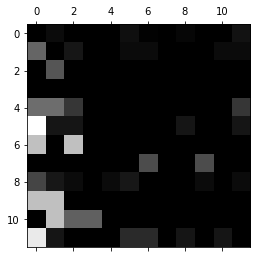

In [389]:
row_sums = confmx.sum ( axis=1 , keepdims=True )
norm_conf_mx = confmx / row_sums 
np.fill_diagonal (norm_conf_mx, 0 )
plt.matshow ( norm_conf_mx, cmap=plt.cm.gray)
plt.show ()

In [390]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42 )
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train,cv=3,method="predict_proba") 

H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


# Binary for 1 and 10

In [391]:
data_1_10 = data_raw[(data_raw["diagnosis"]==1) | (data_raw["diagnosis"]==10)]

In [392]:
data_1_10

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
2     54    0     172      95           138           163           386   
3     55    0     175      94           100           202           380   
6     40    1     160      52            77           129           377   
7     49    1     162      54            78             0           376   
8     44    0     168      56            84           118           354   
..   ...  ...     ...     ...           ...           ...           ...   
446   20    1     157      57            81           151           363   
447   53    1     160      70            80           199           382   
448   37    0     190      85           100           137           361   
450   32    1     155      55            93           106           386   
451   78    1     160      70            79           127           364   

     t_interval  p_interval  qrs  ...   KY    KZ   LA   LB  LC   LD   LE  \
2           185         102   96  ...  0.0   9.5 -2.4  0.0   0  0.3  3.4   
3           179         143   28  ...  0.0  12.2 -2.2  0.0   0  0.4  2.6   
6           133          77   77  ...  0.0   6.5  0.0  0.0   0  0.4  1.0   
7           157          70   67  ...  0.0   8.2 -1.9  0.0   0  0.1  0.5   
8           160          63   61  ...  0.0   7.0 -1.3  0.0   0  0.6  2.1   
..          ...         ...  ...  ...  ...   ...  ...  ...  ..  ...  ...   
446         166          80   43  ...  0.0   7.2 -0.7  0.0   0  0.5  2.3   
447         154         117  -37  ...  0.0   4.3 -5.0  0.0   0  0.7  0.6   
448         201          73   86  ...  0.0  15.6 -1.6  0.0   0  0.4  2.4   
450         218          63   54  ... -0.4  12.0 -0.7  0.0   0  0.5  2.4   
451         138          78   28  ...  0.0  10.4 -1.8  0.0   0  0.5  1.6   

       LF    LG  diagnosis  
2    12.3  49.0         10  
3    34.6  61.6          1  
6    14.3  20.5          1  
7    15.8  19.8          1  
8    12.5  30.9          1  
..    ...   ...        ...  
446  17.6  39.2          1  
447  -4.4  -0.5          1  
448  38.0  62.4         10  
450  25.0  46.6          1  
451  21.3  32.8          1  

[294 rows x 280 columns]

In [393]:
data_10 = data_1_10[data_1_10["diagnosis"]==10]
data_10_copy=data_10

In [394]:
import random
#for i in range (0,len(data_10)):

for column in data_10:
    if (column!='age') and (column!='sex') and (column!='diagnosis'):
         data_10[column]=data_10[column]+random.uniform(0.05,0.1)
data_10_p1=data_10
data_10=data_10_copy

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [395]:
data_10_p1

age  sex     height     weight  qrs_duration  p-r_interval  q-t_interval  \
2     54    0  172.09935  95.091812    138.082208     163.06971    386.071718   
9     50    1  167.09935  67.091812     89.082208     130.06971    383.071718   
12    54    1  172.09935  58.091812     78.082208     155.06971    382.071718   
16    47    0  171.09935  59.091812     82.082208     145.06971    347.071718   
27    31    1  160.09935  54.091812     95.082208     161.06971    407.071718   
37    35    1  164.09935  94.091812     85.082208     200.06971    385.071718   
52    39    0  172.09935  76.091812    103.082208     147.06971    356.071718   
75    34    0  165.09935  65.091812     88.082208     159.06971    371.071718   
94    25    1  168.09935  55.091812     97.082208     133.06971    338.071718   
96    33    1  150.09935  55.091812    102.082208     143.06971    364.071718   
127   61    0  185.09935  95.091812     95.082208     197.06971    340.071718   
134   41    1  155.09935  56.091812     80.082208     134.06971    362.071718   
137   47    0  162.09935  74.091812    102.082208     126.06971    357.071718   
144   34    0  175.09935  60.091812     97.082208     167.06971    339.071718   
145   36    0  168.09935  75.091812     92.082208     194.06971    387.071718   
146   18    0  175.09935  60.091812    102.082208     135.06971    379.071718   
149   17    1  160.09935  54.091812     85.082208     137.06971    323.071718   
173   56    0  168.09935  76.091812     90.082208     157.06971    378.071718   
209   47    0  176.09935  95.091812     80.082208     168.06971    368.071718   
210   11    1  124.09935  25.091812     90.082208     161.06971    349.071718   
224   42    1  165.09935  54.091812     82.082208     157.06971    376.071718   
250   15    1  170.09935  53.091812    105.082208     149.06971    362.071718   
266   58    1  160.09935  62.091812     98.082208     158.06971    358.071718   
278   48    1  160.09935  61.091812     72.082208     204.06971    360.071718   
284   73    0  165.09935  58.091812    104.082208       0.06971    372.071718   
291   45    0  170.09935  74.091812     99.082208     164.06971    381.071718   
293   55    0  173.09935  75.091812    132.082208     184.06971    390.071718   
297    7    1  130.09935  30.091812    131.082208     161.06971    377.071718   
298   12    1  165.09935  47.091812     91.082208       0.06971    359.071718   
312   69    0  160.09935  60.091812    123.082208     193.06971    440.071718   
313   70    0  165.09935  70.091812    105.082208     178.06971    329.071718   
319   37    0  170.09935  90.091812     96.082208     178.06971    350.071718   
324   38    0  170.09935  69.091812     91.082208     164.06971    357.071718   
326   58    1  166.09935  70.091812     89.082208     158.06971    355.071718   
334   19    1  165.09935  65.091812     99.082208     132.06971    383.071718   
336   31    1  165.09935  56.091812     74.082208     199.06971    384.071718   
341   44    1  157.09935  60.091812     88.082208     146.06971    380.071718   
344   36    0  171.09935  76.091812     90.082208     156.06971    364.071718   
346   20    0  186.09935  66.091812     95.082208     123.06971    378.071718   
353   26    0  170.09935  43.091812     92.082208       0.06971    363.071718   
363   57    0  170.09935  66.091812    102.082208     177.06971    429.071718   
379    8    0  120.09935  28.091812    118.082208     126.06971    303.071718   
397   30    1  160.09935  52.091812    110.082208     154.06971    426.071718   
400   55    1  160.09935  70.091812     93.082208     155.06971    387.071718   
417   65    0  172.09935  66.091812     98.082208     199.06971    339.071718   
427   58    0  160.09935  65.091812    133.082208     148.06971    417.071718   
430   11    0  138.09935  29.091812    123.082208     145.06971    361.071718   
432   11    0  140.09935  42.091812     88.082208     123.06971    362.071718   
443   41    1  154.09935  75.091812 

In [396]:
for column in data_10:
    if (column!='age') and (column!='sex') and (column!='diagnosis'):
         data_10[column]=data_10[column]+random.uniform(0.06,0.09)
data_10_p2=data_10
data_10=data_10_copy

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [397]:
data_10_p2

age  sex      height     weight  qrs_duration  p-r_interval  \
2     54    0  172.181017  95.152202    138.154296    163.141416   
9     50    1  167.181017  67.152202     89.154296    130.141416   
12    54    1  172.181017  58.152202     78.154296    155.141416   
16    47    0  171.181017  59.152202     82.154296    145.141416   
27    31    1  160.181017  54.152202     95.154296    161.141416   
37    35    1  164.181017  94.152202     85.154296    200.141416   
52    39    0  172.181017  76.152202    103.154296    147.141416   
75    34    0  165.181017  65.152202     88.154296    159.141416   
94    25    1  168.181017  55.152202     97.154296    133.141416   
96    33    1  150.181017  55.152202    102.154296    143.141416   
127   61    0  185.181017  95.152202     95.154296    197.141416   
134   41    1  155.181017  56.152202     80.154296    134.141416   
137   47    0  162.181017  74.152202    102.154296    126.141416   
144   34    0  175.181017  60.152202     97.154296    167.141416   
145   36    0  168.181017  75.152202     92.154296    194.141416   
146   18    0  175.181017  60.152202    102.154296    135.141416   
149   17    1  160.181017  54.152202     85.154296    137.141416   
173   56    0  168.181017  76.152202     90.154296    157.141416   
209   47    0  176.181017  95.152202     80.154296    168.141416   
210   11    1  124.181017  25.152202     90.154296    161.141416   
224   42    1  165.181017  54.152202     82.154296    157.141416   
250   15    1  170.181017  53.152202    105.154296    149.141416   
266   58    1  160.181017  62.152202     98.154296    158.141416   
278   48    1  160.181017  61.152202     72.154296    204.141416   
284   73    0  165.181017  58.152202    104.154296      0.141416   
291   45    0  170.181017  74.152202     99.154296    164.141416   
293   55    0  173.181017  75.152202    132.154296    184.141416   
297    7    1  130.181017  30.152202    131.154296    161.141416   
298   12    1  165.181017  47.152202     91.154296      0.141416   
312   69    0  160.181017  60.152202    123.154296    193.141416   
313   70    0  165.181017  70.152202    105.154296    178.141416   
319   37    0  170.181017  90.152202     96.154296    178.141416   
324   38    0  170.181017  69.152202     91.154296    164.141416   
326   58    1  166.181017  70.152202     89.154296    158.141416   
334   19    1  165.181017  65.152202     99.154296    132.141416   
336   31    1  165.181017  56.152202     74.154296    199.141416   
341   44    1  157.181017  60.152202     88.154296    146.141416   
344   36    0  171.181017  76.152202     90.154296    156.141416   
346   20    0  186.181017  66.152202     95.154296    123.141416   
353   26    0  170.181017  43.152202     92.154296      0.141416   
363   57    0  170.181017  66.152202    102.154296    177.141416   
379    8    0  120.181017  28.152202    118.154296    126.141416   
397   30    1  160.181017  52.152202    110.154296    154.141416   
400   55    1  160.181017  70.152202     93.154296    155.141416   
417   65    0  172.181017  66.152202     98.154296    199.141416   
427   58    0  160.181017  65.152202    133.154296    148.141416   
430   11    0  138.181017  29.152202    123.154296    145.141416   
432   11    0  140.181017  42.152202     88.154296    123.141416   
443   41    1  154.181017  75.152202     88.154296    157.141416   
448   37    0  190.181017  85.152202    100.154296    137.141416   

     q-t_interval  t_interval  p_interval         qrs  ...        KY  \
2      386.147299  185.172999  102.168081   96.161254  ...  0.128738   
9      383.147299  156.172999   73.168081   85.161254  ... -0.471262   
12     382.147299  163.172999   81.168081  -23.838746  ...  0.128738   
16     347.147299  169.172999   61.168081   77.161254  ...  0.128738   
27     407.147299  168.172999   83.168081   10.161254  ...  0.128738   
37     385.147299  174.172999   74.168081   48.161254  ...  0.128738   
52     356.147299  162.172999   

In [398]:
for column in data_10:
    if (column!='age') and (column!='sex') and (column!='diagnosis'):
         data_10[column]=data_10[column]+random.uniform(0.045,0.11)
data_10_p3=data_10
data_10=data_10_copy

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [399]:
data_10_p3

age  sex     height     weight  qrs_duration  p-r_interval  q-t_interval  \
2     54    0  172.23932  95.257291    138.248002    163.195471    386.204783   
9     50    1  167.23932  67.257291     89.248002    130.195471    383.204783   
12    54    1  172.23932  58.257291     78.248002    155.195471    382.204783   
16    47    0  171.23932  59.257291     82.248002    145.195471    347.204783   
27    31    1  160.23932  54.257291     95.248002    161.195471    407.204783   
37    35    1  164.23932  94.257291     85.248002    200.195471    385.204783   
52    39    0  172.23932  76.257291    103.248002    147.195471    356.204783   
75    34    0  165.23932  65.257291     88.248002    159.195471    371.204783   
94    25    1  168.23932  55.257291     97.248002    133.195471    338.204783   
96    33    1  150.23932  55.257291    102.248002    143.195471    364.204783   
127   61    0  185.23932  95.257291     95.248002    197.195471    340.204783   
134   41    1  155.23932  56.257291     80.248002    134.195471    362.204783   
137   47    0  162.23932  74.257291    102.248002    126.195471    357.204783   
144   34    0  175.23932  60.257291     97.248002    167.195471    339.204783   
145   36    0  168.23932  75.257291     92.248002    194.195471    387.204783   
146   18    0  175.23932  60.257291    102.248002    135.195471    379.204783   
149   17    1  160.23932  54.257291     85.248002    137.195471    323.204783   
173   56    0  168.23932  76.257291     90.248002    157.195471    378.204783   
209   47    0  176.23932  95.257291     80.248002    168.195471    368.204783   
210   11    1  124.23932  25.257291     90.248002    161.195471    349.204783   
224   42    1  165.23932  54.257291     82.248002    157.195471    376.204783   
250   15    1  170.23932  53.257291    105.248002    149.195471    362.204783   
266   58    1  160.23932  62.257291     98.248002    158.195471    358.204783   
278   48    1  160.23932  61.257291     72.248002    204.195471    360.204783   
284   73    0  165.23932  58.257291    104.248002      0.195471    372.204783   
291   45    0  170.23932  74.257291     99.248002    164.195471    381.204783   
293   55    0  173.23932  75.257291    132.248002    184.195471    390.204783   
297    7    1  130.23932  30.257291    131.248002    161.195471    377.204783   
298   12    1  165.23932  47.257291     91.248002      0.195471    359.204783   
312   69    0  160.23932  60.257291    123.248002    193.195471    440.204783   
313   70    0  165.23932  70.257291    105.248002    178.195471    329.204783   
319   37    0  170.23932  90.257291     96.248002    178.195471    350.204783   
324   38    0  170.23932  69.257291     91.248002    164.195471    357.204783   
326   58    1  166.23932  70.257291     89.248002    158.195471    355.204783   
334   19    1  165.23932  65.257291     99.248002    132.195471    383.204783   
336   31    1  165.23932  56.257291     74.248002    199.195471    384.204783   
341   44    1  157.23932  60.257291     88.248002    146.195471    380.204783   
344   36    0  171.23932  76.257291     90.248002    156.195471    364.204783   
346   20    0  186.23932  66.257291     95.248002    123.195471    378.204783   
353   26    0  170.23932  43.257291     92.248002      0.195471    363.204783   
363   57    0  170.23932  66.257291    102.248002    177.195471    429.204783   
379    8    0  120.23932  28.257291    118.248002    126.195471    303.204783   
397   30    1  160.23932  52.257291    110.248002    154.195471    426.204783   
400   55    1  160.23932  70.257291     93.248002    155.195471    387.204783   
417   65    0  172.23932  66.257291     98.248002    199.195471    339.204783   
427   58    0  160.23932  65.257291    133.248002    148.195471    417.204783   
430   11    0  138.23932  29.257291    123.248002    145.195471    361.204783   
432   11    0  140.23932  42.257291     88.248002    123.195471    362.204783   
443   41    1  154.23932  75.257291 

In [400]:
for column in data_10:
    if (column!='age') and (column!='sex') and (column!='diagnosis'):
         data_10[column]=data_10[column]+random.uniform(0.055,0.12)
data_10_p4=data_10
data_10=data_10_copy

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [401]:
data_10_p4

age  sex      height     weight  qrs_duration  p-r_interval  \
2     54    0  172.322217  95.374805    138.352755    163.278832   
9     50    1  167.322217  67.374805     89.352755    130.278832   
12    54    1  172.322217  58.374805     78.352755    155.278832   
16    47    0  171.322217  59.374805     82.352755    145.278832   
27    31    1  160.322217  54.374805     95.352755    161.278832   
37    35    1  164.322217  94.374805     85.352755    200.278832   
52    39    0  172.322217  76.374805    103.352755    147.278832   
75    34    0  165.322217  65.374805     88.352755    159.278832   
94    25    1  168.322217  55.374805     97.352755    133.278832   
96    33    1  150.322217  55.374805    102.352755    143.278832   
127   61    0  185.322217  95.374805     95.352755    197.278832   
134   41    1  155.322217  56.374805     80.352755    134.278832   
137   47    0  162.322217  74.374805    102.352755    126.278832   
144   34    0  175.322217  60.374805     97.352755    167.278832   
145   36    0  168.322217  75.374805     92.352755    194.278832   
146   18    0  175.322217  60.374805    102.352755    135.278832   
149   17    1  160.322217  54.374805     85.352755    137.278832   
173   56    0  168.322217  76.374805     90.352755    157.278832   
209   47    0  176.322217  95.374805     80.352755    168.278832   
210   11    1  124.322217  25.374805     90.352755    161.278832   
224   42    1  165.322217  54.374805     82.352755    157.278832   
250   15    1  170.322217  53.374805    105.352755    149.278832   
266   58    1  160.322217  62.374805     98.352755    158.278832   
278   48    1  160.322217  61.374805     72.352755    204.278832   
284   73    0  165.322217  58.374805    104.352755      0.278832   
291   45    0  170.322217  74.374805     99.352755    164.278832   
293   55    0  173.322217  75.374805    132.352755    184.278832   
297    7    1  130.322217  30.374805    131.352755    161.278832   
298   12    1  165.322217  47.374805     91.352755      0.278832   
312   69    0  160.322217  60.374805    123.352755    193.278832   
313   70    0  165.322217  70.374805    105.352755    178.278832   
319   37    0  170.322217  90.374805     96.352755    178.278832   
324   38    0  170.322217  69.374805     91.352755    164.278832   
326   58    1  166.322217  70.374805     89.352755    158.278832   
334   19    1  165.322217  65.374805     99.352755    132.278832   
336   31    1  165.322217  56.374805     74.352755    199.278832   
341   44    1  157.322217  60.374805     88.352755    146.278832   
344   36    0  171.322217  76.374805     90.352755    156.278832   
346   20    0  186.322217  66.374805     95.352755    123.278832   
353   26    0  170.322217  43.374805     92.352755      0.278832   
363   57    0  170.322217  66.374805    102.352755    177.278832   
379    8    0  120.322217  28.374805    118.352755    126.278832   
397   30    1  160.322217  52.374805    110.352755    154.278832   
400   55    1  160.322217  70.374805     93.352755    155.278832   
417   65    0  172.322217  66.374805     98.352755    199.278832   
427   58    0  160.322217  65.374805    133.352755    148.278832   
430   11    0  138.322217  29.374805    123.352755    145.278832   
432   11    0  140.322217  42.374805     88.352755    123.278832   
443   41    1  154.322217  75.374805     88.352755    157.278832   
448   37    0  190.322217  85.374805    100.352755    137.278832   

     q-t_interval  t_interval  p_interval        qrs  ...        KY  \
2      386.283055  185.368107  102.285462   96.33705  ...  0.285271   
9      383.283055  156.368107   73.285462   85.33705  ... -0.314729   
12     382.283055  163.368107   81.285462  -23.66295  ...  0.285271   
16     347.283055  169.368107   61.285462   77.33705  ...  0.285271   
27     407.283055  168.368107   83.285462   10.33705  ...  0.285271   
37     385.283055  174.368107   74.285462   48.33705  ...  0.285271   
52     356.283055  162.368107   80.2854

In [402]:
data_1_10_for_train = pd.concat([data_1_10,data_10_p1,data_10_p2,data_10_p3,data_10_p4],axis=0)
data_1_10_for_train

age  sex      height     weight  qrs_duration  p-r_interval  \
2     54    0  172.000000  95.000000    138.000000    163.000000   
3     55    0  175.000000  94.000000    100.000000    202.000000   
6     40    1  160.000000  52.000000     77.000000    129.000000   
7     49    1  162.000000  54.000000     78.000000      0.000000   
8     44    0  168.000000  56.000000     84.000000    118.000000   
..   ...  ...         ...        ...           ...           ...   
427   58    0  160.322217  65.374805    133.352755    148.278832   
430   11    0  138.322217  29.374805    123.352755    145.278832   
432   11    0  140.322217  42.374805     88.352755    123.278832   
443   41    1  154.322217  75.374805     88.352755    157.278832   
448   37    0  190.322217  85.374805    100.352755    137.278832   

     q-t_interval  t_interval  p_interval        qrs  ...        KY  \
2      386.000000  185.000000  102.000000   96.00000  ...  0.000000   
3      380.000000  179.000000  143.000000   28.00000  ...  0.000000   
6      377.000000  133.000000   77.000000   77.00000  ...  0.000000   
7      376.000000  157.000000   70.000000   67.00000  ...  0.000000   
8      354.000000  160.000000   63.000000   61.00000  ...  0.000000   
..            ...         ...         ...        ...  ...       ...   
427    417.283055  260.368107   92.285462 -157.66295  ... -0.114729   
430    361.283055  221.368107   80.285462  112.33705  ... -3.114729   
432    362.283055  228.368107   81.285462  -17.66295  ...  0.285271   
443    384.283055  132.368107  112.285462   65.33705  ... -0.114729   
448    361.283055  201.368107   73.285462   86.33705  ...  0.285271   

            KZ        LA        LB        LC        LD        LE         LF  \
2     9.500000 -2.400000  0.000000  0.000000  0.300000  3.400000  12.300000   
3    12.200000 -2.200000  0.000000  0.000000  0.400000  2.600000  34.600000   
6     6.500000  0.000000  0.000000  0.000000  0.400000  1.000000  14.300000   
7     8.200000 -1.900000  0.000000  0.000000  0.100000  0.500000  15.800000   
8     7.000000 -1.300000  0.000000  0.000000  0.600000  2.100000  12.500000   
..         ...       ...       ...       ...       ...       ...        ...   
427   6.741135 -3.208607  0.320794  0.306624  0.701671  1.122474  -2.612528   
430  19.941135 -3.908607  0.320794  0.306624  0.501671  2.122474  12.487472   
432  17.441135 -6.808607  0.320794  0.306624  1.001671  5.822474  15.387472   
443  10.841135 -2.208607  0.320794  0.306624  0.801671  1.722474  18.087472   
448  15.941135 -1.308607  0.320794  0.306624  0.701671  2.722474  38.287472   

           LG  diagnosis  
2    49.00000         10  
3    61.60000          1  
6    20.50000          1  
7    19.80000          1  
8    30.90000          1  
..        ...        ...  
427   6.80859         10  
430  25.40859         10  
432  84.70859         10  
443  29.80859         10  
448  62.70859         10  

[494 rows x 280 columns]

In [403]:
from sklearn.utils import shuffle 
data_1_10_for_train = shuffle(data_1_10_for_train) 
data_1_10_for_train

age  sex      height     weight  qrs_duration  p-r_interval  \
363   57    0  170.322217  66.374805    102.352755    177.278832   
239   38    1  165.000000  98.000000     84.000000    136.000000   
145   36    0  168.322217  75.374805     92.352755    194.278832   
293   55    0  173.322217  75.374805    132.352755    184.278832   
43    34    1  165.000000  61.000000     84.000000    152.000000   
..   ...  ...         ...        ...           ...           ...   
390   66    1  160.000000  53.000000     72.000000    164.000000   
27    31    1  160.322217  54.374805     95.352755    161.278832   
434   20    0  178.000000  65.000000     88.000000    155.000000   
111   43    0  176.000000  90.000000     78.000000    203.000000   
12    54    1  172.322217  58.374805     78.352755    155.278832   

     q-t_interval  t_interval  p_interval       qrs  ...        KY         KZ  \
363    429.283055  163.368107   86.285462  62.33705  ...  0.285271  10.541135   
239    356.000000  159.000000   85.000000  40.00000  ... -0.700000  12.200000   
145    387.283055  175.368107   83.285462  -1.66295  ...  0.285271   7.241135   
293    390.283055  159.368107  103.285462 -43.66295  ...  0.285271   7.541135   
43     383.000000  144.000000   71.000000  59.00000  ... -1.000000  16.300000   
..            ...         ...         ...       ...  ...       ...        ...   
390    379.000000  160.000000   87.000000  44.00000  ...  0.000000   4.700000   
27     407.283055  168.368107   83.285462  10.33705  ...  0.285271  13.041135   
434    360.000000  163.000000   71.000000 -22.00000  ... -0.500000  10.200000   
111    369.000000  167.000000  102.000000  41.00000  ... -0.900000   9.600000   
12     382.283055  163.368107   81.285462 -23.66295  ...  0.285271   6.641135   

           LA        LB        LC        LD        LE         LF        LG  \
363 -1.708607  0.320794  0.306624  0.901671  2.622474  16.287472  38.30859   
239  0.000000  0.000000  0.000000  1.000000  2.000000  31.000000  44.60000   
145 -1.408607  0.320794  0.306624  0.701671  2.422474   9.687472  28.60859   
293 -2.308607  0.320794  0.306624 -0.198329  2.422474   8.687472  27.10859   
43   0.000000  0.000000  0.000000  0.400000 -1.100000  37.900000  22.10000   
..        ...       ...       ...       ...       ...        ...       ...   
390 -0.400000  0.000000  0.000000  0.700000  1.500000   9.900000  21.60000   
27  -1.508607  0.320794  0.306624  0.601671  3.522474  25.687472  55.10859   
434  0.000000  0.000000  0.000000  0.500000  0.400000  24.000000  25.40000   
111 -0.800000  0.000000  0.000000  0.900000  2.100000  14.900000  33.30000   
12  -1.808607  0.320794  0.306624  1.101671  0.822474   9.087472  12.40859   

     diagnosis  
363         10  
239          1  
145         10  
293         10  
43           1  
..         ...  
390          1  
27          10  
434          1  
111          1  
12          10  

[494 rows x 280 columns]

In [404]:
X_1_10_for_train = data_1_10_for_train.drop('diagnosis', axis = 1)
y_1_10_for_train = data_1_10_for_train['diagnosis']
feature_names = X_1_10_for_train.columns

In [405]:
X_1_10_for_test = data_1_10.drop('diagnosis', axis = 1)
y_1_10_for_test = data_1_10['diagnosis']

## Knn method

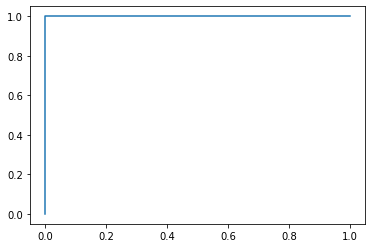

neighbours = 2 err_train = 0.0 err_test = 0.0
[[244   0]
 [  0  50]]
Mera F1 Train: 1.0
Precision Score Train:  1.0
Recall Score Train:  1.0


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


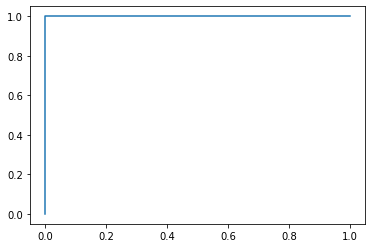

neighbours = 3 err_train = 0.030364372469635626 err_test = 0.05102040816326531
[[229  15]
 [  0  50]]
Mera F1 Train: 0.9682875264270614
Precision Score Train:  0.9489795918367347
Recall Score Train:  0.9489795918367347


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


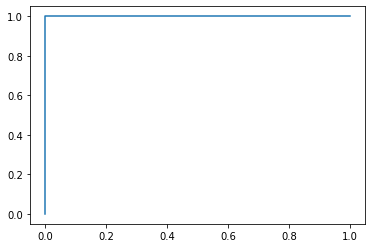

neighbours = 5 err_train = 0.05060728744939271 err_test = 0.08503401360544217
[[219  25]
 [  0  50]]
Mera F1 Train: 0.9460043196544278
Precision Score Train:  0.9149659863945578
Recall Score Train:  0.9149659863945578


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


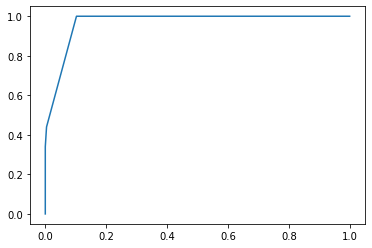

neighbours = 7 err_train = 0.08097165991902834 err_test = 0.1360544217687075
[[204  40]
 [  0  50]]
Mera F1 Train: 0.9107142857142857
Precision Score Train:  0.8639455782312925
Recall Score Train:  0.8639455782312925


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


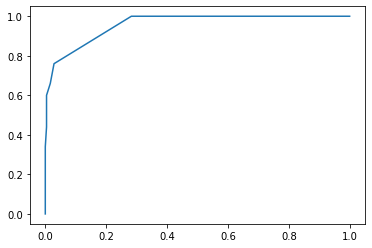

neighbours = 10 err_train = 0.13562753036437247 err_test = 0.06462585034013606
[[237   7]
 [ 12  38]]
Mera F1 Train: 0.9614604462474644
Precision Score Train:  0.935374149659864
Recall Score Train:  0.935374149659864


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


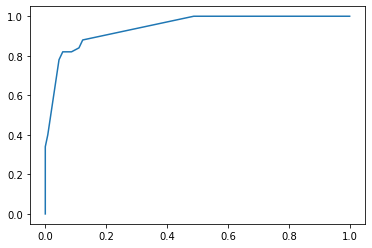

neighbours = 15 err_train = 0.13360323886639677 err_test = 0.10204081632653061
[[223  21]
 [  9  41]]
Mera F1 Train: 0.9369747899159664
Precision Score Train:  0.8979591836734694
Recall Score Train:  0.8979591836734694


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


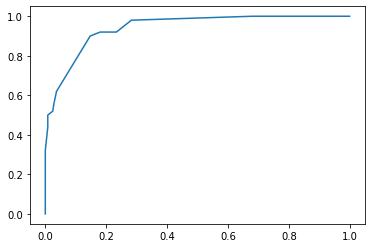

neighbours = 20 err_train = 0.19433198380566802 err_test = 0.09523809523809523
[[235   9]
 [ 19  31]]
Mera F1 Train: 0.9437751004016064
Precision Score Train:  0.9047619047619048
Recall Score Train:  0.9047619047619048


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


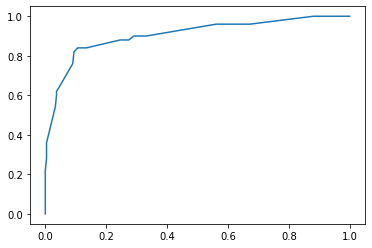

neighbours = 50 err_train = 0.19635627530364372 err_test = 0.09863945578231292
[[233  11]
 [ 18  32]]
Mera F1 Train: 0.9414141414141414
Precision Score Train:  0.9013605442176871
Recall Score Train:  0.9013605442176871


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


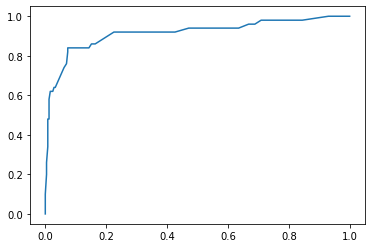

neighbours = 100 err_train = 0.19838056680161945 err_test = 0.08843537414965986
[[236   8]
 [ 18  32]]
Mera F1 Train: 0.9477911646586344
Precision Score Train:  0.9115646258503401
Recall Score Train:  0.9115646258503401


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [406]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_1_10_for_train, y_1_10_for_train)
    y_1_10_for_test_predict = knn.predict(X_1_10_for_test)
    err_test  = np.mean(y_1_10_for_test  != y_1_10_for_test_predict)
    y_1_10_for_train_predict = knn.predict(X_1_10_for_train)
    err_train  = np.mean(y_1_10_for_train  !=  y_1_10_for_train_predict)
    y_1_10_for_test_binary = np.array(y_1_10_for_test != 1, dtype='int')
    #for j in range (6):
    #    print("threshold = ",tresholds_array[j])
    #    fpr,tpr,thresholds=roc_curve(y_1_10_for_test_binary,knn.predict_proba(X_1_10_for_test)[:,1]>=tresholds_array[j])
    #    plt.plot(fpr,tpr,label="ROC")
    #    plt.show()
    #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_1_10_for_test_binary,knn.predict_proba(X_1_10_for_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    #print("predict_proba для кнн",knn.predict_proba(X_1_10_for_test))
    #print("thresholds",thresholds)
    #print(y_test_predict,y_train_predict)
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_1_10_for_test,y_1_10_for_test_predict))
    print("Mera F1 Train:",f1_score(y_1_10_for_test,y_1_10_for_test_predict))
    print("Precision Score Train: ",precision_score(y_1_10_for_test, y_1_10_for_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_1_10_for_test, y_1_10_for_test_predict, pos_label='positive',average='micro'))
    i=i+1

In [407]:
y_1_10_for_test

2      10
3       1
6       1
7       1
8       1
       ..
446     1
447     1
448    10
450     1
451     1
Name: diagnosis, Length: 294, dtype: int64

In [408]:
y_1_10_for_test_binary = np.array(y_1_10_for_test != 1, dtype='int')
y_1_10_for_test_binary

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0])

In [409]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_1_10_for_test, y_1_10_for_test)

SGDClassifier(random_state=42)

In [410]:
y_scores = cross_val_predict(sgd_clf,X_1_10_for_test,y_1_10_for_test,cv=3,method="decision_function")
#y_scores

Text(0, 0.5, 'precisions')

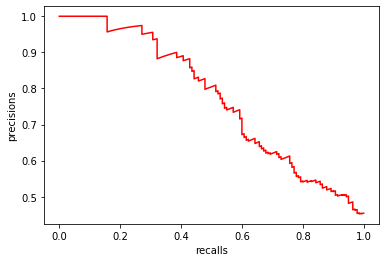

In [411]:
plt.plot(recalls,precisions,"r-")
plt.xlabel("recalls")
plt.ylabel("precisions")

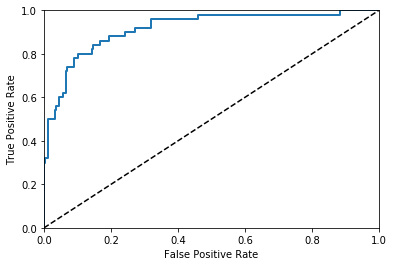

In [412]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds= roc_curve(y_1_10_for_test_binary, y_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2 , label=label )
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve (fpr,tpr)
plt.show()

In [413]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_1_10_for_test_binary,y_scores)

0.9161475409836065

In [414]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42 )
y_probas_forest = cross_val_predict(forest_clf,X_1_10_for_test,y_1_10_for_test_binary,cv=3,method="predict_proba") 

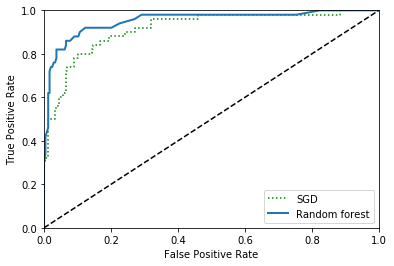

In [415]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_1_10_for_test_binary,y_scores_forest)
plt.plot(fpr,tpr,"g:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random forest")
plt.legend(loc="lower right")
plt.show()

In [416]:
roc_auc_score(y_1_10_for_test_binary,y_scores_forest)

0.9533196721311474

# New Methods

In [417]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in h:\anaconda\lib\site-packages (0.7.0)
Note: you may need to restart the kernel to use updated packages.


In [418]:
pip install git+git://github.com/scikit-learn-contrib/imbalanced-learn.git

  Cloning git://github.com/scikit-learn-contrib/imbalanced-learn.git to c:\users\aace~1\appdata\local\temp\pip-req-build-stpa9tq8
  Created wheel for imbalanced-learn: filename=imbalanced_learn-0.7.0-cp37-none-any.whl size=176564 sha256=0cfdbe90b6c13dceed045d0ddc8723da544b81c9ca26169f2e2fbc7ec93dab1a
  Stored in directory: C:\Users\AACE~1\AppData\Local\Temp\pip-ephem-wheel-cache-tfhppxbb\wheels\5e\65\a9\5fb89313536ea2aa87e813a80ead05e3c1ecbf2a4d4a53f1f1
Successfully built imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q git://github.com/scikit-learn-contrib/imbalanced-learn.git 'C:\Users\AACE~1\AppData\Local\Temp\pip-req-build-stpa9tq8'


## Data 1 and 10

In [419]:
methods=['Naive',
         'SMOTE',
         'BorderlineSMOTE',
         'ADASYN',
         'ClusterCentroids',
         'RandomUnderSampler',
         'NearMiss',
         'EditedNearestNeighbours',
         'RepeatedEditedNearestNeighbours',
         'AllKNN',
         'CondensedNearestNeighbour',
         'OneSidedSelection',
         'NeighbourhoodCleaningRule',
         'Instance hardness threshold',
         'SMOTEENN',
         'SMOTETomek']
Knn_test=[[0]*9 for j in range(16)]
Knn_train=[[0]*9 for j in range(16)]
SVC_test_RBF=[[0]*2 for j in range(16)]
SVC_train_RBF=[[0]*2 for j in range(16)]
gamma_mass=['scale','auto']
SVC_test_Lin=[0]*16
SVC_train_Lin=[0]*16
SVC_test_Poly=[[0]*3 for j in range(16)]
SVC_train_Poly=[[0]*3 for j in range(16)]

In [420]:
print(Knn_test)

[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


# Naive

Наивная стратегия - генерировать новые образцы путем случайной выборки с заменой текущих доступных образцов.

In [421]:
X_1_10 = data_1_10.drop('diagnosis', axis = 1)
y_1_10 = data_1_10['diagnosis']

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X_1_10, y_1_10, test_size = 0.3, random_state = 42)

In [423]:
X_test

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
49    34    1     159      68            80           135           379   
15    47    1     150      48            75           132           350   
223   83    1     160      55            84           186           358   
439   49    1     168      66            94           170           383   
413   53    1     160      60            86           133           338   
..   ...  ...     ...     ...           ...           ...           ...   
417   65    0     172      66            98           199           339   
110   71    1     162      72            82           294           366   
312   69    0     160      60           123           193           440   
250   15    1     170      53           105           149           362   
163   24    0     176      72            92           153           336   

     t_interval  p_interval  qrs  ...   KV   KY    KZ   LA   LB  LC   LD   LE  \
49          149          97  -14  ... -0.2  0.0   6.5 -3.1  0.0   0  0.7  0.6   
15          169          65   36  ...  0.0  0.0   7.7 -0.8  0.0   0  0.6  1.7   
223         166         113   35  ...  0.0  0.0  13.1 -2.2  0.0   0  0.8  3.0   
439         152         115   92  ... -0.3  0.0   8.2 -0.7  0.0   0  0.8  1.7   
413         159          82   74  ...  0.0 -0.4  11.6 -5.3  0.0   0  1.0  2.1   
..          ...         ...  ...  ...  ...  ...   ...  ...  ...  ..  ...  ...   
417         149         181   -4  ... -1.1  0.0  15.0 -4.5  0.0   0  0.2 -0.4   
110         148         178  -12  ... -0.6  0.0   9.5  0.0  0.0   0 -0.3  1.3   
312         183         111   28  ... -0.7 -0.8  10.5 -3.5  0.0   0  0.7  1.5   
250         143          82  -38  ...  0.1 -0.6   8.7 -3.9  0.0   0  0.5  2.1   
163         165          76   11  ...  0.1  0.0   6.8 -1.2  0.0   0  0.0  2.1   

       LF    LG  
49    8.8  12.7  
15   17.2  31.1  
223  24.0  52.8  
439  21.5  33.7  
413   0.5  17.3  
..    ...   ...  
417  26.4  23.0  
110  24.7  35.6  
312   2.7  19.5  
250   6.1  21.6  
163  17.1  35.5  

[89 rows x 279 columns]

In [424]:
X_train

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
167   19    1     156      47            80           137           342   
333   37    0     175      88           105           152           354   
143   31    1     150      64            82           195           362   
24    40    1     153      55            82           140           388   
264   34    1     150      45            90           135           354   
..   ...  ...     ...     ...           ...           ...           ...   
287   35    1     155      58            81           184           386   
115   39    1     160      45            75           163           418   
152   36    0     172      90            89           164           357   
423   51    0     186      95            94           203           367   
148   39    1     160      62            80           123           375   

     t_interval  p_interval  qrs  ...   KV   KY    KZ   LA   LB  LC   LD   LE  \
167         243          92   -7  ... -0.4 -0.4   9.4 -1.4  0.0   0  1.3  4.3   
333         177         118   52  ... -0.7 -1.1  14.7  0.0  0.0   0 -0.1  1.9   
143         156         102   61  ...  0.2  0.0  11.8  0.0  0.0   0  0.6  2.3   
24          149          82   52  ... -0.6  0.0  13.6  0.0  0.0   0  0.5  2.5   
264         153          70   55  ... -0.1  0.0   7.0 -0.8  0.0   0  0.4  1.4   
..          ...         ...  ...  ...  ...  ...   ...  ...  ...  ..  ...  ...   
287         153          89   73  ...  0.0  0.0   6.3 -0.5  0.0   0  0.5  1.9   
115         155          90   12  ...  0.1 -0.4   5.3 -1.3  0.0   0  0.6  1.9   
152         172          67  -50  ...  0.1  0.0   4.3 -3.3  0.0   0  0.6  2.2   
423         171         106   -7  ... -0.2  0.0   9.6 -3.5  0.0   0  1.0  1.6   
148         153          67   60  ... -0.1  0.0   5.3 -0.7  0.0   0  0.4  1.9   

       LF    LG  
167  16.1  71.1  
333  42.8  60.6  
143  44.8  63.6  
24   35.3  57.3  
264  12.4  21.0  
..    ...   ...  
287  15.4  31.3  
115   8.2  22.2  
152  -0.2  19.1  
423   9.4  23.4  
148   9.2  23.2  

[205 rows x 279 columns]

In [425]:
y_test_binary = np.array(y_test != 1, dtype='int')
y_test_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0])

In [426]:
y_train_binary = np.array(y_train != 1, dtype='int')
y_train_binary

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [427]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train_binary)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 176), (1, 176)]


In [428]:
X_resampled

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
0     19    1     156      47            80           137           342   
1     37    0     175      88           105           152           354   
2     31    1     150      64            82           195           362   
3     40    1     153      55            82           140           388   
4     34    1     150      45            90           135           354   
..   ...  ...     ...     ...           ...           ...           ...   
347   54    0     172      95           138           163           386   
348   30    1     160      52           110           154           426   
349   54    1     172      58            78           155           382   
350   11    0     140      42            88           123           362   
351   58    1     160      62            98           158           358   

     t_interval  p_interval  qrs  ...   KV   KY    KZ   LA   LB  LC   LD   LE  \
0           243          92   -7  ... -0.4 -0.4   9.4 -1.4  0.0   0  1.3  4.3   
1           177         118   52  ... -0.7 -1.1  14.7  0.0  0.0   0 -0.1  1.9   
2           156         102   61  ...  0.2  0.0  11.8  0.0  0.0   0  0.6  2.3   
3           149          82   52  ... -0.6  0.0  13.6  0.0  0.0   0  0.5  2.5   
4           153          70   55  ... -0.1  0.0   7.0 -0.8  0.0   0  0.4  1.4   
..          ...         ...  ...  ...  ...  ...   ...  ...  ...  ..  ...  ...   
347         185         102   96  ...  0.9  0.0   9.5 -2.4  0.0   0  0.3  3.4   
348         154          94  102  ...  0.5  0.0   6.5 -2.4  0.0   0  0.5  2.8   
349         163          81  -24  ... -0.2  0.0   6.3 -2.1  0.0   0  0.8  0.5   
350         228          81  -18  ...  0.1  0.0  17.1 -7.1  0.0   0  0.7  5.5   
351         154         114   85  ...  0.1  0.0   9.1 -2.6  0.0   0  0.7  0.8   

       LF    LG  
0    16.1  71.1  
1    42.8  60.6  
2    44.8  63.6  
3    35.3  57.3  
4    12.4  21.0  
..    ...   ...  
347  12.3  49.0  
348  15.2  40.9  
349   8.8  12.1  
350  15.1  84.4  
351  17.9  24.3  

[352 rows x 279 columns]

## Knn

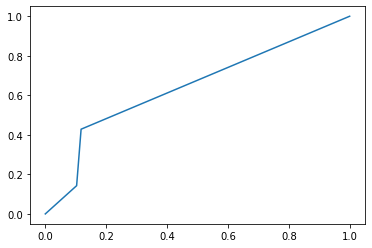

neighbours = 2 err_train = 0.0 err_test = 0.2808988764044944
[[61  7]
 [18  3]]
Mera F1 Train: 0.19354838709677416
Precision Score Train:  0.7191011235955056
Recall Score Train:  0.7191011235955056


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


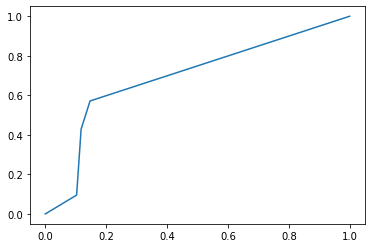

neighbours = 3 err_train = 0.02556818181818182 err_test = 0.2247191011235955
[[60  8]
 [12  9]]
Mera F1 Train: 0.4736842105263158
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


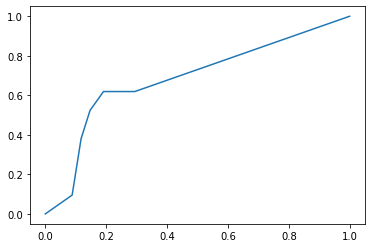

neighbours = 5 err_train = 0.06534090909090909 err_test = 0.2247191011235955
[[58 10]
 [10 11]]
Mera F1 Train: 0.5238095238095238
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


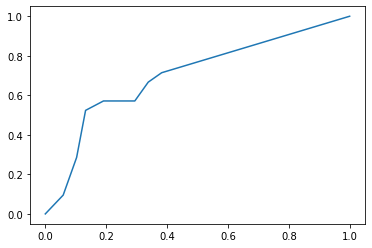

neighbours = 7 err_train = 0.09659090909090909 err_test = 0.24719101123595505
[[55 13]
 [ 9 12]]
Mera F1 Train: 0.5217391304347826
Precision Score Train:  0.7528089887640449
Recall Score Train:  0.7528089887640449


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


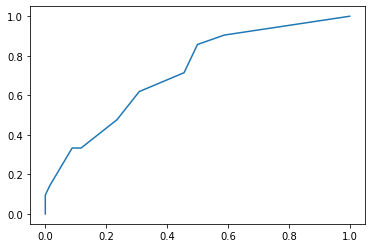

neighbours = 10 err_train = 0.13920454545454544 err_test = 0.30337078651685395
[[52 16]
 [11 10]]
Mera F1 Train: 0.42553191489361697
Precision Score Train:  0.6966292134831461
Recall Score Train:  0.6966292134831461


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


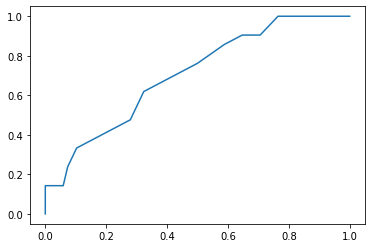

neighbours = 15 err_train = 0.21306818181818182 err_test = 0.33707865168539325
[[49 19]
 [11 10]]
Mera F1 Train: 0.39999999999999997
Precision Score Train:  0.6629213483146067
Recall Score Train:  0.6629213483146067


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


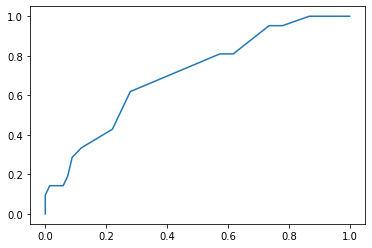

neighbours = 20 err_train = 0.1846590909090909 err_test = 0.30337078651685395
[[53 15]
 [12  9]]
Mera F1 Train: 0.39999999999999997
Precision Score Train:  0.6966292134831461
Recall Score Train:  0.6966292134831461


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


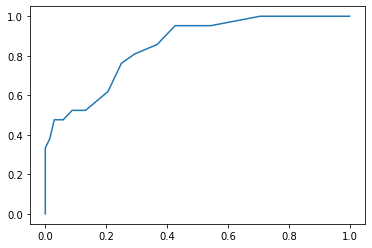

neighbours = 50 err_train = 0.23579545454545456 err_test = 0.1797752808988764
[[62  6]
 [10 11]]
Mera F1 Train: 0.5789473684210527
Precision Score Train:  0.8202247191011236
Recall Score Train:  0.8202247191011236


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


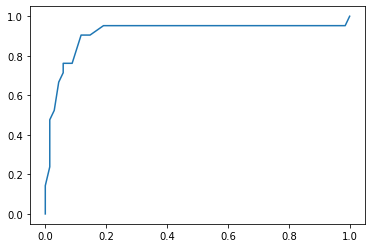

neighbours = 100 err_train = 0.26136363636363635 err_test = 0.1348314606741573
[[66  2]
 [10 11]]
Mera F1 Train: 0.6470588235294118
Precision Score Train:  0.8651685393258427
Recall Score Train:  0.8651685393258427


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [429]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[0][i]=err_test
    Knn_train[0][i]=err_train
    #for j in range (6):
    #    print("threshold = ",tresholds_array[j])
    #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
    #    plt.plot(fpr,tpr,label="ROC")
    #    plt.show()
    #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [430]:
from sklearn.svm import SVC
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[0][i]= err_test
    SVC_train_RBF[0][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.09943181818181818 err_test_SVC_rbf = 0.06741573033707865
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.23595505617977527


## Linear

In [431]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[0]= err_test
SVC_train_Lin[0]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.10112359550561797


## Poly

In [432]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[0][i-2]=err_test
    SVC_train_Poly[0][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.09943181818181818 err_test_SVC_Poly = 0.06741573033707865
degree = 3 err_train_SVC_Poly = 0.0625 err_test_SVC_Poly = 0.0449438202247191
degree = 4 err_train_SVC_Poly = 0.0625 err_test_SVC_Poly = 0.0449438202247191


# SMOTE

Mетод синтетической передискретизации меньшинства

In [433]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 176), (1, 176)]


## Knn

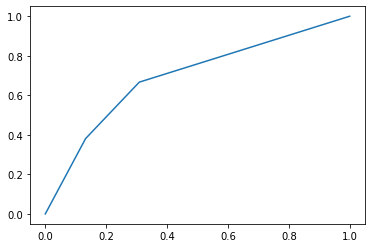

neighbours = 2 err_train = 0.0 err_test = 0.24719101123595505
[[59  9]
 [13  8]]
Mera F1 Train: 0.42105263157894735
Precision Score Train:  0.7528089887640449
Recall Score Train:  0.7528089887640449


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


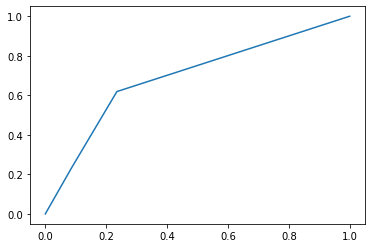

neighbours = 3 err_train = 0.07386363636363637 err_test = 0.2696629213483146
[[52 16]
 [ 8 13]]
Mera F1 Train: 0.52
Precision Score Train:  0.7303370786516854
Recall Score Train:  0.7303370786516854


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


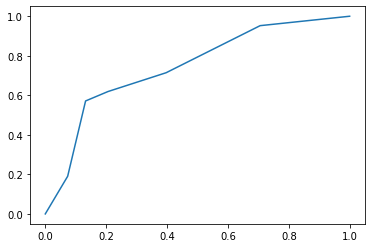

neighbours = 5 err_train = 0.10795454545454546 err_test = 0.24719101123595505
[[54 14]
 [ 8 13]]
Mera F1 Train: 0.5416666666666666
Precision Score Train:  0.7528089887640449
Recall Score Train:  0.7528089887640449


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


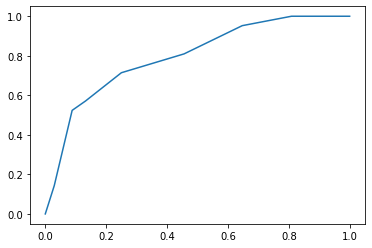

neighbours = 7 err_train = 0.14204545454545456 err_test = 0.25842696629213485
[[51 17]
 [ 6 15]]
Mera F1 Train: 0.5660377358490566
Precision Score Train:  0.7415730337078652
Recall Score Train:  0.7415730337078652


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


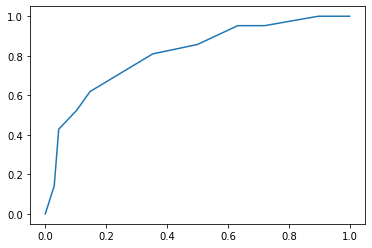

neighbours = 10 err_train = 0.14488636363636365 err_test = 0.25842696629213485
[[51 17]
 [ 6 15]]
Mera F1 Train: 0.5660377358490566
Precision Score Train:  0.7415730337078652
Recall Score Train:  0.7415730337078652


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


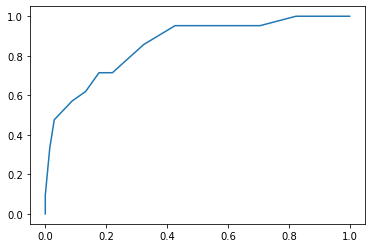

neighbours = 15 err_train = 0.17613636363636365 err_test = 0.2808988764044944
[[46 22]
 [ 3 18]]
Mera F1 Train: 0.5901639344262294
Precision Score Train:  0.7191011235955056
Recall Score Train:  0.7191011235955056


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


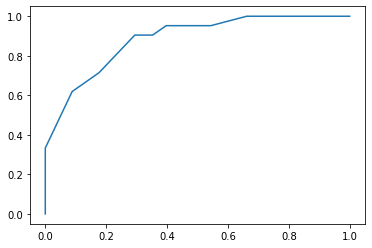

neighbours = 20 err_train = 0.16477272727272727 err_test = 0.24719101123595505
[[48 20]
 [ 2 19]]
Mera F1 Train: 0.6333333333333333
Precision Score Train:  0.7528089887640449
Recall Score Train:  0.7528089887640449


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


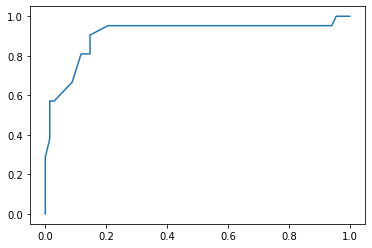

neighbours = 50 err_train = 0.23011363636363635 err_test = 0.2808988764044944
[[44 24]
 [ 1 20]]
Mera F1 Train: 0.6153846153846153
Precision Score Train:  0.7191011235955056
Recall Score Train:  0.7191011235955056


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


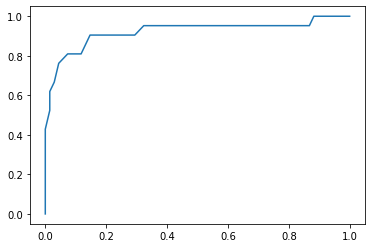

neighbours = 100 err_train = 0.23295454545454544 err_test = 0.2808988764044944
[[44 24]
 [ 1 20]]
Mera F1 Train: 0.6153846153846153
Precision Score Train:  0.7191011235955056
Recall Score Train:  0.7191011235955056


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [434]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[1][i]=err_test
    Knn_train[1][i]=err_train
    #for j in range (6):
    #    print("threshold = ",tresholds_array[j])
    #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
    #    plt.plot(fpr,tpr,label="ROC")
    #    plt.show()
    #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [435]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[1][i]= err_test
    SVC_train_RBF[1][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.0625 err_test_SVC_rbf = 0.06741573033707865
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.23595505617977527


## Linear

In [436]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[1]= err_test
SVC_train_Lin[1]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.0898876404494382


## Poly

In [437]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[1][i-2]=err_test
    SVC_train_Poly[1][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.06534090909090909 err_test_SVC_Poly = 0.07865168539325842
degree = 3 err_train_SVC_Poly = 0.05113636363636364 err_test_SVC_Poly = 0.0449438202247191
degree = 4 err_train_SVC_Poly = 0.04261363636363636 err_test_SVC_Poly = 0.0449438202247191


# BorderlineSMOTE

In [438]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 176), (1, 176)]


## Knn

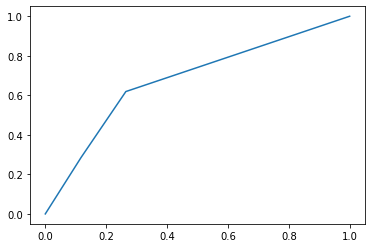

neighbours = 2 err_train = 0.002840909090909091 err_test = 0.25842696629213485
[[60  8]
 [15  6]]
Mera F1 Train: 0.34285714285714286
Precision Score Train:  0.7415730337078652
Recall Score Train:  0.7415730337078652


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


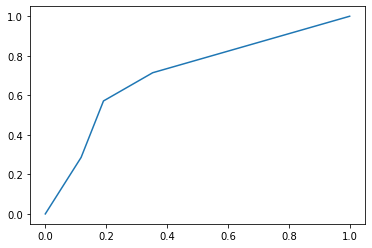

neighbours = 3 err_train = 0.07102272727272728 err_test = 0.24719101123595505
[[55 13]
 [ 9 12]]
Mera F1 Train: 0.5217391304347826
Precision Score Train:  0.7528089887640449
Recall Score Train:  0.7528089887640449


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


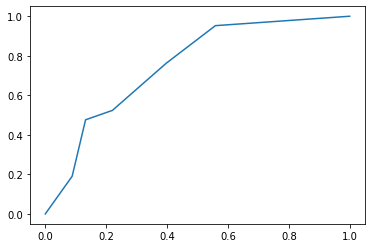

neighbours = 5 err_train = 0.10795454545454546 err_test = 0.2808988764044944
[[53 15]
 [10 11]]
Mera F1 Train: 0.4680851063829788
Precision Score Train:  0.7191011235955056
Recall Score Train:  0.7191011235955056


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


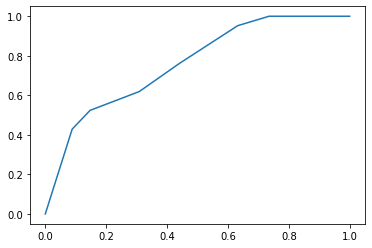

neighbours = 7 err_train = 0.14772727272727273 err_test = 0.3258426966292135
[[47 21]
 [ 8 13]]
Mera F1 Train: 0.4727272727272727
Precision Score Train:  0.6741573033707865
Recall Score Train:  0.6741573033707865


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


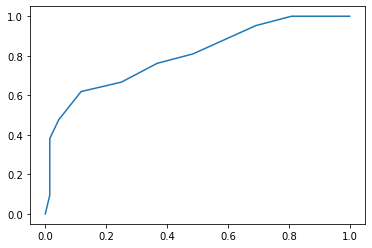

neighbours = 10 err_train = 0.11079545454545454 err_test = 0.2696629213483146
[[51 17]
 [ 7 14]]
Mera F1 Train: 0.5384615384615384
Precision Score Train:  0.7303370786516854
Recall Score Train:  0.7303370786516854


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


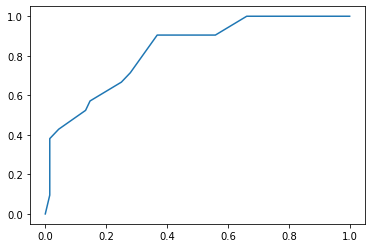

neighbours = 15 err_train = 0.15625 err_test = 0.2808988764044944
[[49 19]
 [ 6 15]]
Mera F1 Train: 0.5454545454545455
Precision Score Train:  0.7191011235955056
Recall Score Train:  0.7191011235955056


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


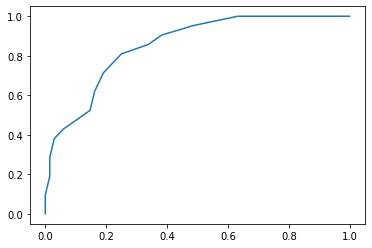

neighbours = 20 err_train = 0.15056818181818182 err_test = 0.23595505617977527
[[51 17]
 [ 4 17]]
Mera F1 Train: 0.6181818181818182
Precision Score Train:  0.7640449438202247
Recall Score Train:  0.7640449438202247


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


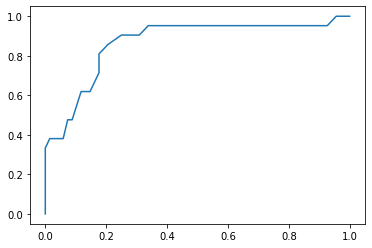

neighbours = 50 err_train = 0.22727272727272727 err_test = 0.2696629213483146
[[45 23]
 [ 1 20]]
Mera F1 Train: 0.625
Precision Score Train:  0.7303370786516854
Recall Score Train:  0.7303370786516854


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


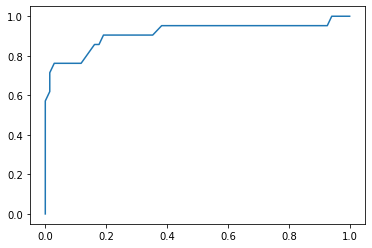

neighbours = 100 err_train = 0.23295454545454544 err_test = 0.29213483146067415
[[44 24]
 [ 2 19]]
Mera F1 Train: 0.59375
Precision Score Train:  0.7078651685393258
Recall Score Train:  0.7078651685393258


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [439]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[2][i]=err_test
    Knn_train[2][i]=err_train
    #for j in range (6):
    #    print("threshold = ",tresholds_array[j])
    #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
    #    plt.plot(fpr,tpr,label="ROC")
    #    plt.show()
    #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [440]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[2][i]= err_test
    SVC_train_RBF[2][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.07102272727272728 err_test_SVC_rbf = 0.06741573033707865
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.23595505617977527


## Linear

In [441]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[2]= err_test
SVC_train_Lin[2]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.0898876404494382


## Poly

In [442]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[2][i-2]=err_test
    SVC_train_Poly[2][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.07386363636363637 err_test_SVC_Poly = 0.0898876404494382
degree = 3 err_train_SVC_Poly = 0.056818181818181816 err_test_SVC_Poly = 0.056179775280898875
degree = 4 err_train_SVC_Poly = 0.05113636363636364 err_test_SVC_Poly = 0.056179775280898875


# ADASYN

Метод адаптивной синтетической выборки

In [443]:
from imblearn.over_sampling import ADASYN
X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 176), (1, 178)]


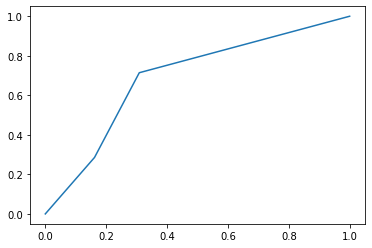

neighbours = 2 err_train = 0.0 err_test = 0.29213483146067415
[[57 11]
 [15  6]]
Mera F1 Train: 0.31578947368421056
Precision Score Train:  0.7078651685393258
Recall Score Train:  0.7078651685393258


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


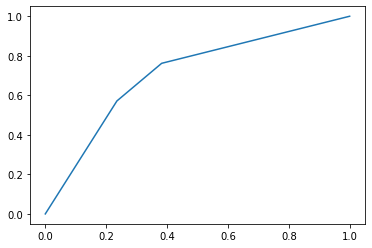

neighbours = 3 err_train = 0.0903954802259887 err_test = 0.2808988764044944
[[52 16]
 [ 9 12]]
Mera F1 Train: 0.48979591836734687
Precision Score Train:  0.7191011235955056
Recall Score Train:  0.7191011235955056


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


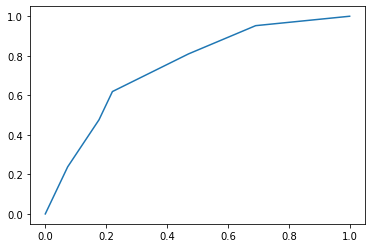

neighbours = 5 err_train = 0.1271186440677966 err_test = 0.25842696629213485
[[53 15]
 [ 8 13]]
Mera F1 Train: 0.5306122448979592
Precision Score Train:  0.7415730337078652
Recall Score Train:  0.7415730337078652


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


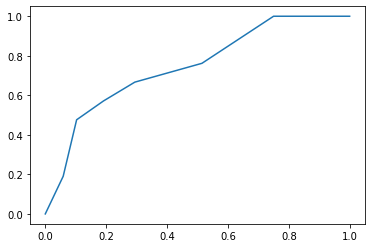

neighbours = 7 err_train = 0.1553672316384181 err_test = 0.30337078651685395
[[48 20]
 [ 7 14]]
Mera F1 Train: 0.509090909090909
Precision Score Train:  0.6966292134831461
Recall Score Train:  0.6966292134831461


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


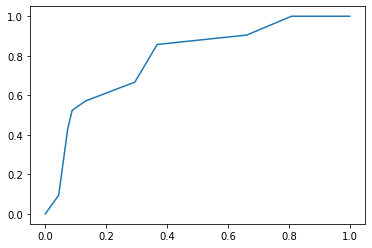

neighbours = 10 err_train = 0.14689265536723164 err_test = 0.30337078651685395
[[48 20]
 [ 7 14]]
Mera F1 Train: 0.509090909090909
Precision Score Train:  0.6966292134831461
Recall Score Train:  0.6966292134831461


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


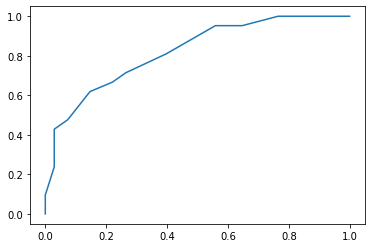

neighbours = 15 err_train = 0.20903954802259886 err_test = 0.34831460674157305
[[41 27]
 [ 4 17]]
Mera F1 Train: 0.523076923076923
Precision Score Train:  0.651685393258427
Recall Score Train:  0.651685393258427


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


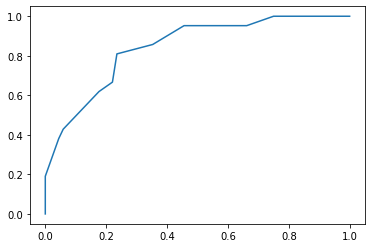

neighbours = 20 err_train = 0.1807909604519774 err_test = 0.30337078651685395
[[44 24]
 [ 3 18]]
Mera F1 Train: 0.5714285714285714
Precision Score Train:  0.6966292134831461
Recall Score Train:  0.6966292134831461


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


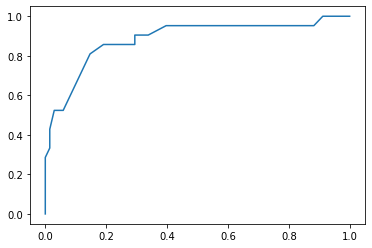

neighbours = 50 err_train = 0.2542372881355932 err_test = 0.3146067415730337
[[41 27]
 [ 1 20]]
Mera F1 Train: 0.5882352941176471
Precision Score Train:  0.6853932584269663
Recall Score Train:  0.6853932584269663


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


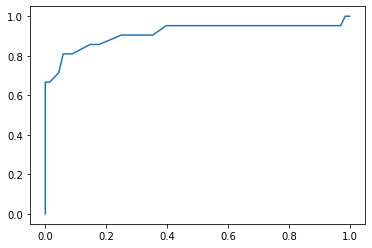

neighbours = 100 err_train = 0.2796610169491525 err_test = 0.34831460674157305
[[38 30]
 [ 1 20]]
Mera F1 Train: 0.5633802816901408
Precision Score Train:  0.651685393258427
Recall Score Train:  0.651685393258427


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [444]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[3][i]=err_test
    Knn_train[3][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

В ADASYN основное внимание уделяется генерации выборок рядом с исходными выборками, которые ошибочно классифицируются с использованием классификатора k-ближайших соседей.
SMOTE не делает никаких различий между простыми и жесткими выборками, которые должны быть классифицированы с использованием правила ближайших соседей.
Это подтверждают исследования, метод k-ближайших соседей для ADASYN работает хуже, чем для SMOTE

## Support Vector Classifier

## Rbf

In [445]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[3][i]= err_test
    SVC_train_RBF[3][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.08192090395480225 err_test_SVC_rbf = 0.056179775280898875
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.23595505617977527


## Linear

In [446]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[3]= err_test
SVC_train_Lin[3]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.0898876404494382


## Poly

In [447]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[3][i-2]=err_test
    SVC_train_Poly[3][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.07627118644067797 err_test_SVC_Poly = 0.06741573033707865
degree = 3 err_train_SVC_Poly = 0.062146892655367235 err_test_SVC_Poly = 0.0449438202247191
degree = 4 err_train_SVC_Poly = 0.05649717514124294 err_test_SVC_Poly = 0.0449438202247191


# Prototype generation

## ClusterCentroids

In [448]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 29), (1, 29)]


## Knn

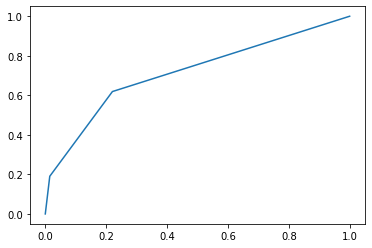

neighbours = 2 err_train = 0.3275862068965517 err_test = 0.20224719101123595
[[67  1]
 [17  4]]
Mera F1 Train: 0.3076923076923077
Precision Score Train:  0.797752808988764
Recall Score Train:  0.797752808988764


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


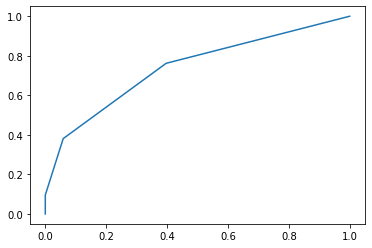

neighbours = 3 err_train = 0.22413793103448276 err_test = 0.19101123595505617
[[64  4]
 [13  8]]
Mera F1 Train: 0.4848484848484849
Precision Score Train:  0.8089887640449438
Recall Score Train:  0.8089887640449438


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


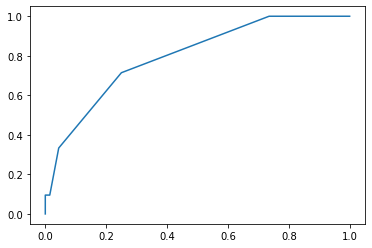

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 5 err_train = 0.27586206896551724 err_test = 0.19101123595505617
[[65  3]
 [14  7]]
Mera F1 Train: 0.45161290322580644
Precision Score Train:  0.8089887640449438
Recall Score Train:  0.8089887640449438


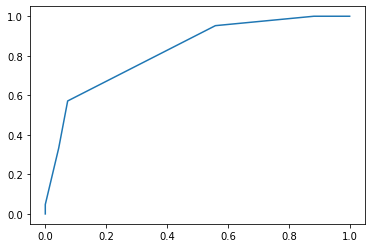

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 7 err_train = 0.3103448275862069 err_test = 0.19101123595505617
[[65  3]
 [14  7]]
Mera F1 Train: 0.45161290322580644
Precision Score Train:  0.8089887640449438
Recall Score Train:  0.8089887640449438


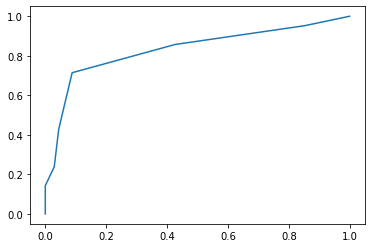

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 10 err_train = 0.3793103448275862 err_test = 0.20224719101123595
[[66  2]
 [16  5]]
Mera F1 Train: 0.35714285714285715
Precision Score Train:  0.797752808988764
Recall Score Train:  0.797752808988764


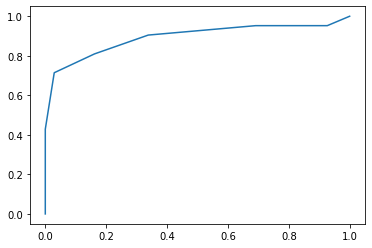

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 15 err_train = 0.3275862068965517 err_test = 0.1348314606741573
[[68  0]
 [12  9]]
Mera F1 Train: 0.6
Precision Score Train:  0.8651685393258427
Recall Score Train:  0.8651685393258427


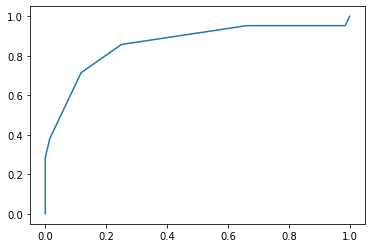

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 20 err_train = 0.39655172413793105 err_test = 0.16853932584269662
[[68  0]
 [15  6]]
Mera F1 Train: 0.4444444444444445
Precision Score Train:  0.8314606741573034
Recall Score Train:  0.8314606741573034


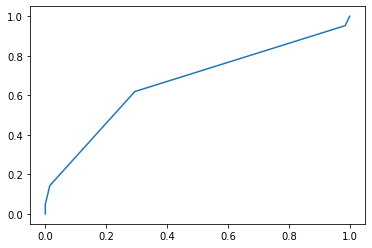

neighbours = 50 err_train = 0.3103448275862069 err_test = 0.3146067415730337
[[48 20]
 [ 8 13]]
Mera F1 Train: 0.48148148148148145
Precision Score Train:  0.6853932584269663
Recall Score Train:  0.6853932584269663


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [449]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[4][i]=err_test
    Knn_train[4][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [450]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[4][i]= err_test
    SVC_train_RBF[4][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.10344827586206896 err_test_SVC_rbf = 0.0898876404494382
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.7640449438202247


## Linear

In [451]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[4]= err_test
SVC_train_Lin[4]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.15730337078651685


## Poly

In [452]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[4][i-2]=err_test
    SVC_train_Poly[4][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.1206896551724138 err_test_SVC_Poly = 0.1348314606741573
degree = 3 err_train_SVC_Poly = 0.10344827586206896 err_test_SVC_Poly = 0.1348314606741573
degree = 4 err_train_SVC_Poly = 0.08620689655172414 err_test_SVC_Poly = 0.11235955056179775


# Controlled under-sampling techniques

## RandomUnderSampler

In [453]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 29), (1, 29)]


## Knn

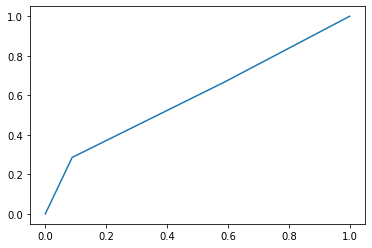

neighbours = 2 err_train = 0.20689655172413793 err_test = 0.23595505617977527
[[62  6]
 [15  6]]
Mera F1 Train: 0.36363636363636365
Precision Score Train:  0.7640449438202247
Recall Score Train:  0.7640449438202247


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


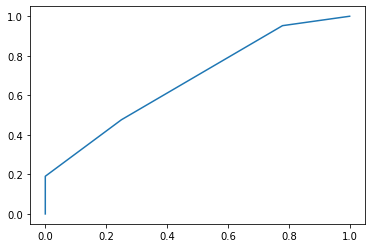

neighbours = 3 err_train = 0.13793103448275862 err_test = 0.3146067415730337
[[51 17]
 [11 10]]
Mera F1 Train: 0.4166666666666667
Precision Score Train:  0.6853932584269663
Recall Score Train:  0.6853932584269663


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


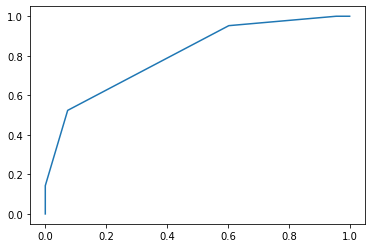

neighbours = 5 err_train = 0.22413793103448276 err_test = 0.16853932584269662
[[63  5]
 [10 11]]
Mera F1 Train: 0.5945945945945946
Precision Score Train:  0.8314606741573034
Recall Score Train:  0.8314606741573034


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


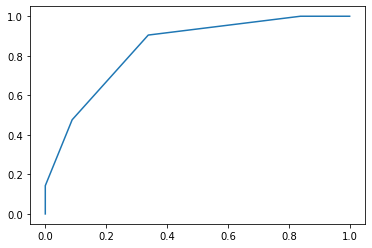

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 7 err_train = 0.27586206896551724 err_test = 0.19101123595505617
[[62  6]
 [11 10]]
Mera F1 Train: 0.5405405405405405
Precision Score Train:  0.8089887640449438
Recall Score Train:  0.8089887640449438


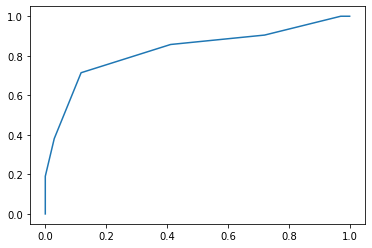

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 10 err_train = 0.3275862068965517 err_test = 0.16853932584269662
[[66  2]
 [13  8]]
Mera F1 Train: 0.5161290322580645
Precision Score Train:  0.8314606741573034
Recall Score Train:  0.8314606741573034


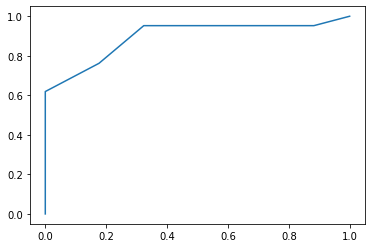

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 15 err_train = 0.2413793103448276 err_test = 0.0898876404494382
[[68  0]
 [ 8 13]]
Mera F1 Train: 0.7647058823529412
Precision Score Train:  0.9101123595505618
Recall Score Train:  0.9101123595505618


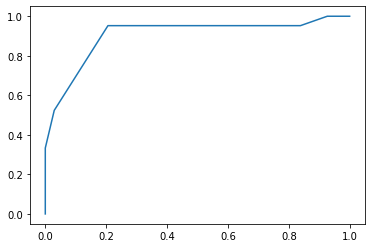

neighbours = 20 err_train = 0.3793103448275862 err_test = 0.15730337078651685
[[68  0]
 [14  7]]
Mera F1 Train: 0.5
Precision Score Train:  0.8426966292134831
Recall Score Train:  0.8426966292134831


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


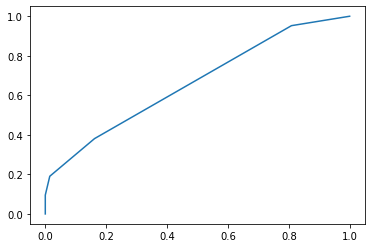

neighbours = 50 err_train = 0.4482758620689655 err_test = 0.20224719101123595
[[67  1]
 [17  4]]
Mera F1 Train: 0.3076923076923077
Precision Score Train:  0.797752808988764
Recall Score Train:  0.797752808988764


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [454]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[5][i]=err_test
    Knn_train[5][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

Быстрый и простой способ сбалансировать данные путем случайного выбора подмножества данных для целевых классов

## Support Vector Classifier

## Rbf

In [455]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[5][i]= err_test
    SVC_train_RBF[5][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.1206896551724138 err_test_SVC_rbf = 0.10112359550561797
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.7415730337078652


## Linear

In [456]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[5]= err_test
SVC_train_Lin[5]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.19101123595505617


## Poly

In [457]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[5][i-2]=err_test
    SVC_train_Poly[5][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.1206896551724138 err_test_SVC_Poly = 0.07865168539325842
degree = 3 err_train_SVC_Poly = 0.10344827586206896 err_test_SVC_Poly = 0.0898876404494382
degree = 4 err_train_SVC_Poly = 0.10344827586206896 err_test_SVC_Poly = 0.0898876404494382


## NearMiss

In [458]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1)
X_resampled_nm1, y_resampled = nm1.fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 29), (1, 29)]


## Knn

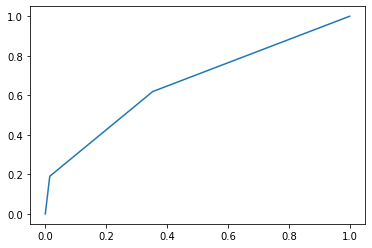

neighbours = 2 err_train = 0.3448275862068966 err_test = 0.20224719101123595
[[67  1]
 [17  4]]
Mera F1 Train: 0.3076923076923077
Precision Score Train:  0.797752808988764
Recall Score Train:  0.797752808988764


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


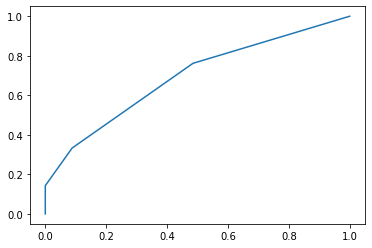

neighbours = 3 err_train = 0.1724137931034483 err_test = 0.2247191011235955
[[62  6]
 [14  7]]
Mera F1 Train: 0.41176470588235287
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


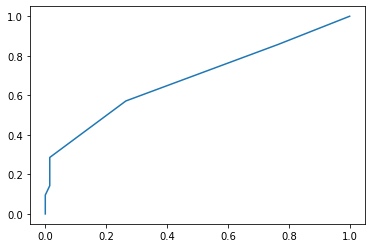

neighbours = 5 err_train = 0.25862068965517243 err_test = 0.1797752808988764
[[67  1]
 [15  6]]
Mera F1 Train: 0.42857142857142855
Precision Score Train:  0.8202247191011236
Recall Score Train:  0.8202247191011236


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


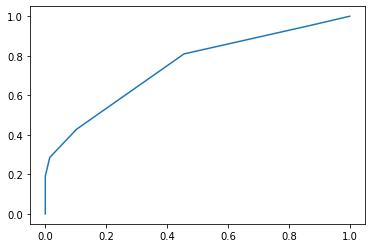

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 7 err_train = 0.3793103448275862 err_test = 0.1797752808988764
[[67  1]
 [15  6]]
Mera F1 Train: 0.42857142857142855
Precision Score Train:  0.8202247191011236
Recall Score Train:  0.8202247191011236


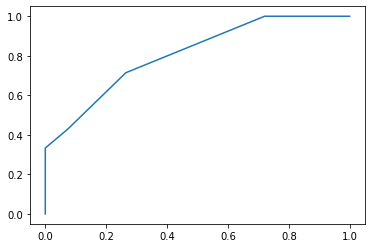

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 10 err_train = 0.4482758620689655 err_test = 0.16853932584269662
[[68  0]
 [15  6]]
Mera F1 Train: 0.4444444444444445
Precision Score Train:  0.8314606741573034
Recall Score Train:  0.8314606741573034


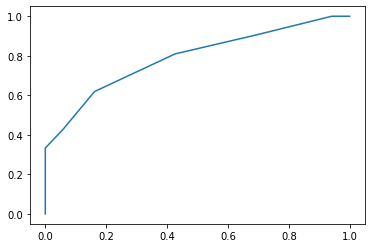

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 15 err_train = 0.43103448275862066 err_test = 0.20224719101123595
[[68  0]
 [18  3]]
Mera F1 Train: 0.25
Precision Score Train:  0.797752808988764
Recall Score Train:  0.797752808988764


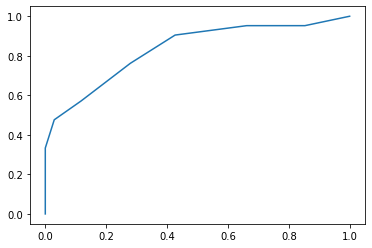

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 20 err_train = 0.4827586206896552 err_test = 0.21348314606741572
[[68  0]
 [19  2]]
Mera F1 Train: 0.17391304347826084
Precision Score Train:  0.7865168539325843
Recall Score Train:  0.7865168539325843


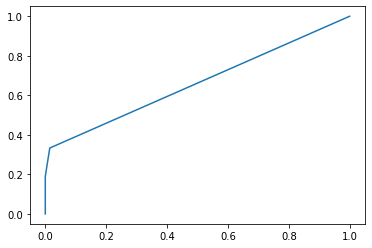

neighbours = 50 err_train = 0.5 err_test = 0.23595505617977527
[[68  0]
 [21  0]]
Mera F1 Train: 0.0
Precision Score Train:  0.7640449438202247
Recall Score Train:  0.7640449438202247


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [459]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled_nm1, y_resampled)
    y_train_predict = knn.predict(X_resampled_nm1)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[6][i]=err_test
    Knn_train[6][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [460]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled_nm1, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled_nm1))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[6][i]= err_test
    SVC_train_RBF[6][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.15517241379310345 err_test_SVC_rbf = 0.11235955056179775
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.7415730337078652


## Linear

In [461]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled_nm1, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled_nm1))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[6]= err_test
SVC_train_Lin[6]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.1797752808988764


## Poly

In [462]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled_nm1, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled_nm1))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[6][i-2]=err_test
    SVC_train_Poly[6][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.13793103448275862 err_test_SVC_Poly = 0.0898876404494382
degree = 3 err_train_SVC_Poly = 0.1206896551724138 err_test_SVC_Poly = 0.11235955056179775
degree = 4 err_train_SVC_Poly = 0.10344827586206896 err_test_SVC_Poly = 0.12359550561797752


# Edited data set using nearest neighbours

## EditedNearestNeighbours

In [463]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 141), (1, 29)]


## Knn

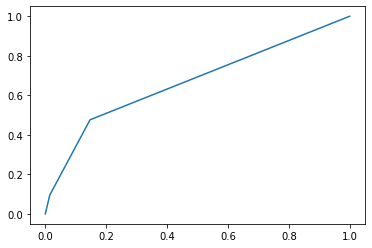

neighbours = 2 err_train = 0.10588235294117647 err_test = 0.2247191011235955
[[67  1]
 [19  2]]
Mera F1 Train: 0.16666666666666666
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


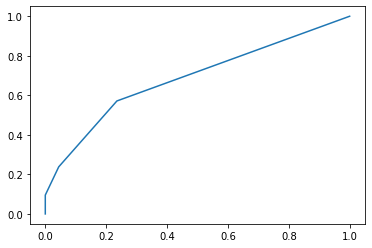

neighbours = 3 err_train = 0.08823529411764706 err_test = 0.21348314606741572
[[65  3]
 [16  5]]
Mera F1 Train: 0.3448275862068965
Precision Score Train:  0.7865168539325843
Recall Score Train:  0.7865168539325843


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


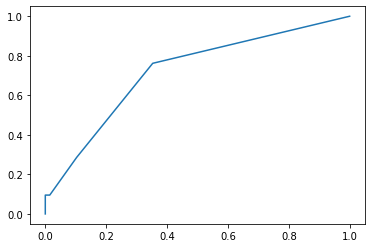

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 5 err_train = 0.12941176470588237 err_test = 0.2247191011235955
[[67  1]
 [19  2]]
Mera F1 Train: 0.16666666666666666
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


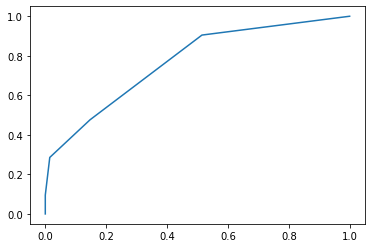

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 7 err_train = 0.16470588235294117 err_test = 0.21348314606741572
[[68  0]
 [19  2]]
Mera F1 Train: 0.17391304347826084
Precision Score Train:  0.7865168539325843
Recall Score Train:  0.7865168539325843


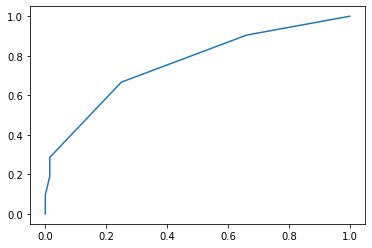

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 10 err_train = 0.16470588235294117 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


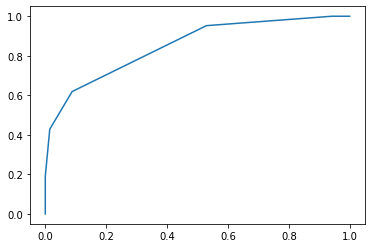

neighbours = 15 err_train = 0.17058823529411765 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


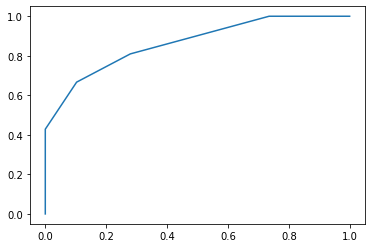

neighbours = 20 err_train = 0.17058823529411765 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


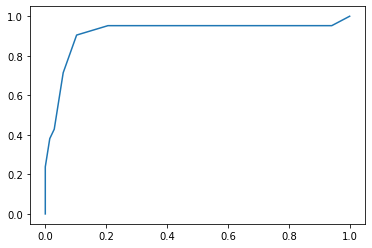

neighbours = 50 err_train = 0.17058823529411765 err_test = 0.23595505617977527
[[68  0]
 [21  0]]
Mera F1 Train: 0.0
Precision Score Train:  0.7640449438202247
Recall Score Train:  0.7640449438202247


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [464]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[7][i]=err_test
    Knn_train[7][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [465]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[7][i]= err_test
    SVC_train_RBF[7][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.1588235294117647 err_test_SVC_rbf = 0.21348314606741572
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.23595505617977527


## Linear

In [466]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[7]= err_test
SVC_train_Lin[7]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.0898876404494382


## Poly

In [467]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[7][i-2]=err_test
    SVC_train_Poly[7][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.15294117647058825 err_test_SVC_Poly = 0.19101123595505617
degree = 3 err_train_SVC_Poly = 0.11764705882352941 err_test_SVC_Poly = 0.1797752808988764
degree = 4 err_train_SVC_Poly = 0.09411764705882353 err_test_SVC_Poly = 0.16853932584269662


## RepeatedEditedNearestNeighbours

In [468]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
renn = RepeatedEditedNearestNeighbours()
X_resampled, y_resampled = renn.fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 129), (1, 29)]


## Knn

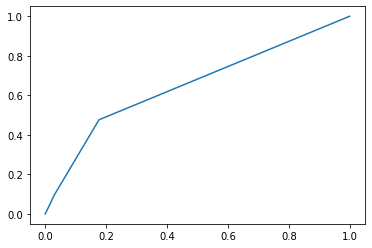

neighbours = 2 err_train = 0.11392405063291139 err_test = 0.23595505617977527
[[66  2]
 [19  2]]
Mera F1 Train: 0.16
Precision Score Train:  0.7640449438202247
Recall Score Train:  0.7640449438202247


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


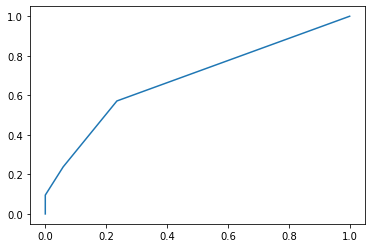

neighbours = 3 err_train = 0.0949367088607595 err_test = 0.2247191011235955
[[64  4]
 [16  5]]
Mera F1 Train: 0.33333333333333326
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


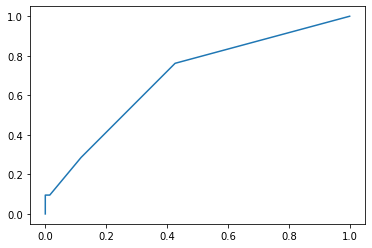

neighbours = 5 err_train = 0.13291139240506328 err_test = 0.2247191011235955
[[67  1]
 [19  2]]
Mera F1 Train: 0.16666666666666666
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


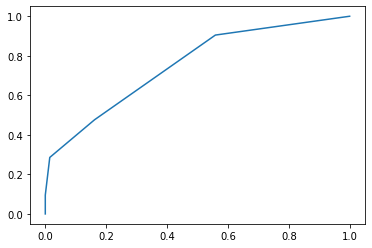

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 7 err_train = 0.16455696202531644 err_test = 0.21348314606741572
[[68  0]
 [19  2]]
Mera F1 Train: 0.17391304347826084
Precision Score Train:  0.7865168539325843
Recall Score Train:  0.7865168539325843


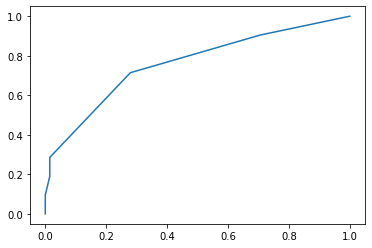

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 10 err_train = 0.17721518987341772 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


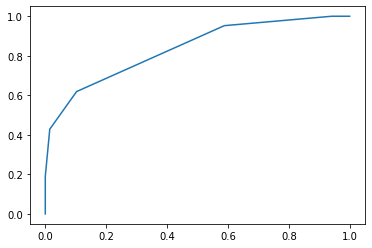

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 15 err_train = 0.18354430379746836 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


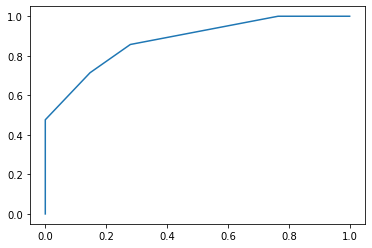

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 20 err_train = 0.18354430379746836 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


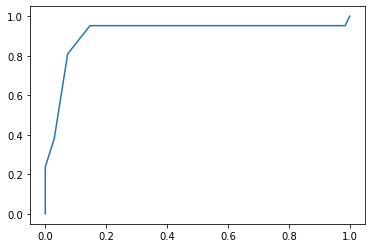

neighbours = 50 err_train = 0.18354430379746836 err_test = 0.23595505617977527
[[68  0]
 [21  0]]
Mera F1 Train: 0.0
Precision Score Train:  0.7640449438202247
Recall Score Train:  0.7640449438202247


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [469]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[8][i]=err_test
    Knn_train[8][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [470]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[8][i]= err_test
    SVC_train_RBF[8][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.17088607594936708 err_test_SVC_rbf = 0.21348314606741572
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.23595505617977527


## Linear

In [471]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[8]= err_test
SVC_train_Lin[8]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.0898876404494382


## Poly

In [472]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[8][i-2]=err_test
    SVC_train_Poly[8][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.16455696202531644 err_test_SVC_Poly = 0.19101123595505617
degree = 3 err_train_SVC_Poly = 0.12025316455696203 err_test_SVC_Poly = 0.1797752808988764
degree = 4 err_train_SVC_Poly = 0.10126582278481013 err_test_SVC_Poly = 0.16853932584269662


## AllKNN

In [473]:
from imblearn.under_sampling import AllKNN
allknn = AllKNN()
X_resampled, y_resampled = allknn.fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 133), (1, 29)]


## Knn

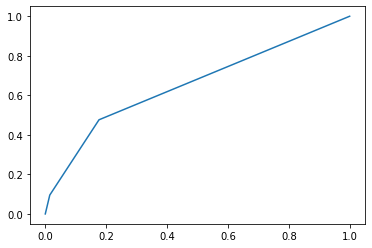

neighbours = 2 err_train = 0.1111111111111111 err_test = 0.2247191011235955
[[67  1]
 [19  2]]
Mera F1 Train: 0.16666666666666666
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


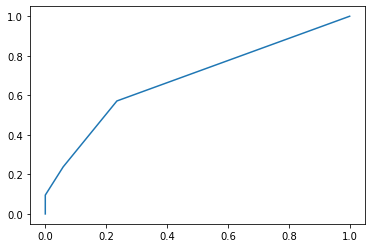

neighbours = 3 err_train = 0.09259259259259259 err_test = 0.2247191011235955
[[64  4]
 [16  5]]
Mera F1 Train: 0.33333333333333326
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


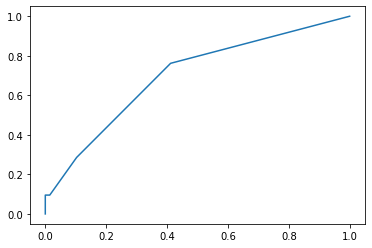

neighbours = 5 err_train = 0.13580246913580246 err_test = 0.2247191011235955
[[67  1]
 [19  2]]
Mera F1 Train: 0.16666666666666666
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


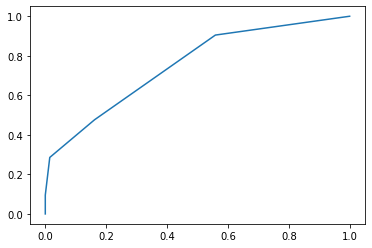

neighbours = 7 err_train = 0.16666666666666666 err_test = 0.21348314606741572
[[68  0]
 [19  2]]
Mera F1 Train: 0.17391304347826084
Precision Score Train:  0.7865168539325843
Recall Score Train:  0.7865168539325843


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


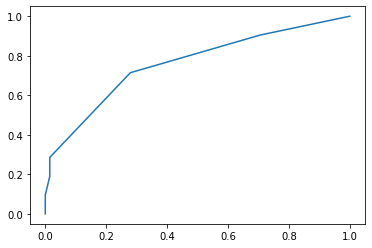

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 10 err_train = 0.1728395061728395 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


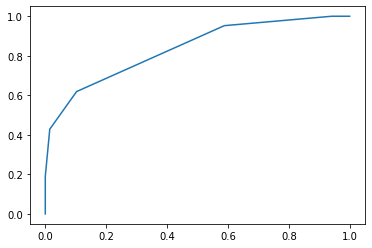

neighbours = 15 err_train = 0.17901234567901234 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


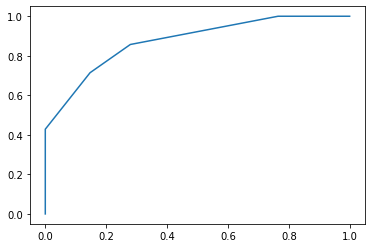

neighbours = 20 err_train = 0.17901234567901234 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


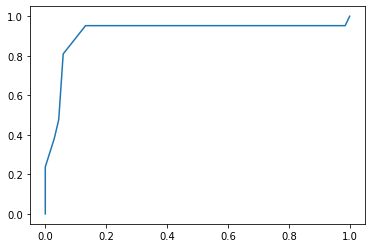

neighbours = 50 err_train = 0.17901234567901234 err_test = 0.23595505617977527
[[68  0]
 [21  0]]
Mera F1 Train: 0.0
Precision Score Train:  0.7640449438202247
Recall Score Train:  0.7640449438202247


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [474]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[9][i]=err_test
    Knn_train[9][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [475]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[9][i]= err_test
    SVC_train_RBF[9][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.16666666666666666 err_test_SVC_rbf = 0.21348314606741572
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.23595505617977527


## Linear

In [476]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[9]= err_test
SVC_train_Lin[9]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.0898876404494382


## Poly

In [477]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[9][i-2]=err_test
    SVC_train_Poly[9][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.16049382716049382 err_test_SVC_Poly = 0.19101123595505617
degree = 3 err_train_SVC_Poly = 0.11728395061728394 err_test_SVC_Poly = 0.1797752808988764
degree = 4 err_train_SVC_Poly = 0.09876543209876543 err_test_SVC_Poly = 0.16853932584269662


# Condensed nearest neighbors and derived algorithms

## CondensedNearestNeighbour

In [478]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(random_state=0)
X_resampled, y_resampled = cnn.fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 46), (1, 29)]


## Knn

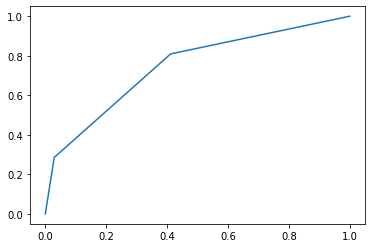

neighbours = 2 err_train = 0.22666666666666666 err_test = 0.19101123595505617
[[66  2]
 [15  6]]
Mera F1 Train: 0.4137931034482759
Precision Score Train:  0.8089887640449438
Recall Score Train:  0.8089887640449438


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


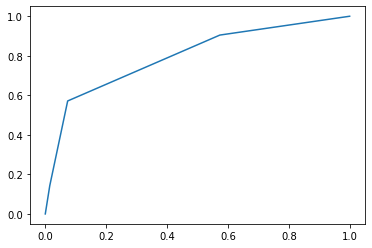

neighbours = 3 err_train = 0.12 err_test = 0.15730337078651685
[[63  5]
 [ 9 12]]
Mera F1 Train: 0.6315789473684211
Precision Score Train:  0.8426966292134831
Recall Score Train:  0.8426966292134831


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


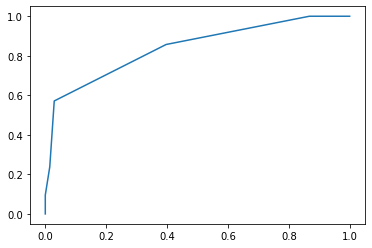

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 5 err_train = 0.18666666666666668 err_test = 0.12359550561797752
[[66  2]
 [ 9 12]]
Mera F1 Train: 0.6857142857142857
Precision Score Train:  0.8764044943820225
Recall Score Train:  0.8764044943820225


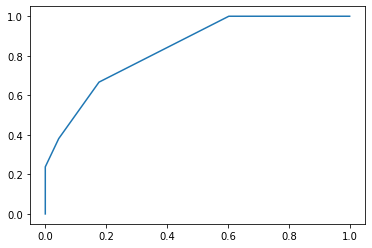

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 7 err_train = 0.22666666666666666 err_test = 0.1797752808988764
[[65  3]
 [13  8]]
Mera F1 Train: 0.5
Precision Score Train:  0.8202247191011236
Recall Score Train:  0.8202247191011236


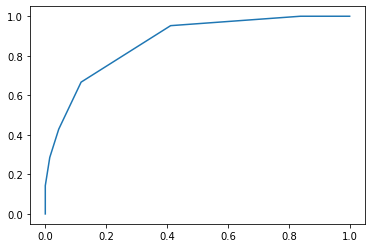

neighbours = 10 err_train = 0.30666666666666664 err_test = 0.1797752808988764
[[67  1]
 [15  6]]
Mera F1 Train: 0.42857142857142855
Precision Score Train:  0.8202247191011236
Recall Score Train:  0.8202247191011236


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


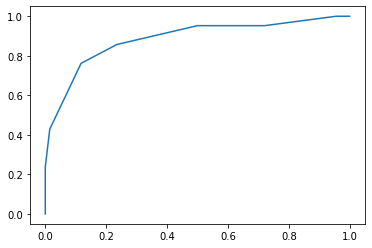

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 15 err_train = 0.28 err_test = 0.1797752808988764
[[68  0]
 [16  5]]
Mera F1 Train: 0.3846153846153846
Precision Score Train:  0.8202247191011236
Recall Score Train:  0.8202247191011236


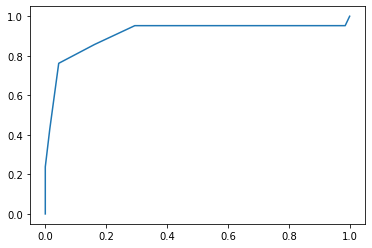

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 20 err_train = 0.32 err_test = 0.20224719101123595
[[68  0]
 [18  3]]
Mera F1 Train: 0.25
Precision Score Train:  0.797752808988764
Recall Score Train:  0.797752808988764


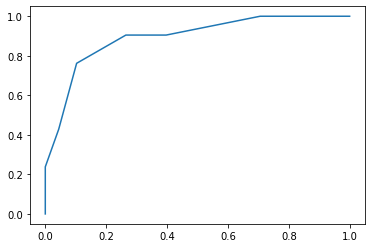

neighbours = 50 err_train = 0.38666666666666666 err_test = 0.23595505617977527
[[68  0]
 [21  0]]
Mera F1 Train: 0.0
Precision Score Train:  0.7640449438202247
Recall Score Train:  0.7640449438202247


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [479]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[10][i]=err_test
    Knn_train[10][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [480]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[10][i]= err_test
    SVC_train_RBF[10][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.26666666666666666 err_test_SVC_rbf = 0.15730337078651685
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.23595505617977527


## Linear

In [481]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[10]= err_test
SVC_train_Lin[10]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.19101123595505617


## Poly

In [482]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[10][i-2]=err_test
    SVC_train_Poly[10][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.24 err_test_SVC_Poly = 0.14606741573033707
degree = 3 err_train_SVC_Poly = 0.18666666666666668 err_test_SVC_Poly = 0.12359550561797752
degree = 4 err_train_SVC_Poly = 0.16 err_test_SVC_Poly = 0.11235955056179775


## OneSidedSelection

In [483]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=0)
X_resampled, y_resampled = oss.fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 151), (1, 29)]


## Knn

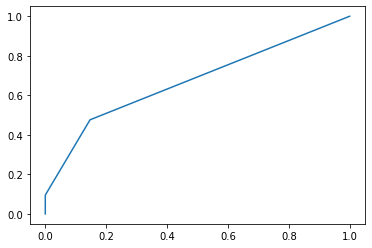

neighbours = 2 err_train = 0.10555555555555556 err_test = 0.21348314606741572
[[68  0]
 [19  2]]
Mera F1 Train: 0.17391304347826084
Precision Score Train:  0.7865168539325843
Recall Score Train:  0.7865168539325843


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


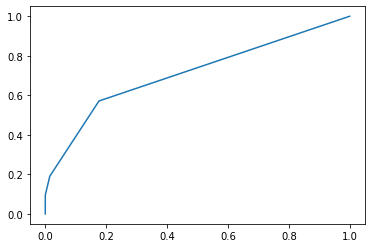

neighbours = 3 err_train = 0.08888888888888889 err_test = 0.20224719101123595
[[67  1]
 [17  4]]
Mera F1 Train: 0.3076923076923077
Precision Score Train:  0.797752808988764
Recall Score Train:  0.797752808988764


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


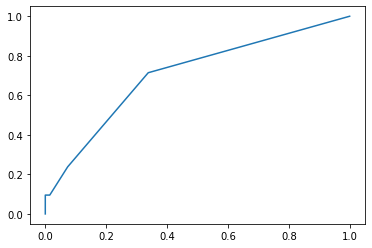

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 5 err_train = 0.12777777777777777 err_test = 0.2247191011235955
[[67  1]
 [19  2]]
Mera F1 Train: 0.16666666666666666
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


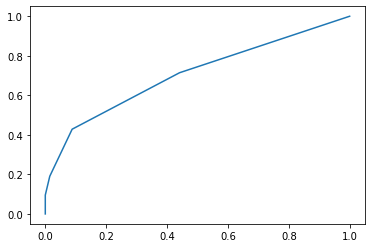

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 7 err_train = 0.15 err_test = 0.21348314606741572
[[68  0]
 [19  2]]
Mera F1 Train: 0.17391304347826084
Precision Score Train:  0.7865168539325843
Recall Score Train:  0.7865168539325843


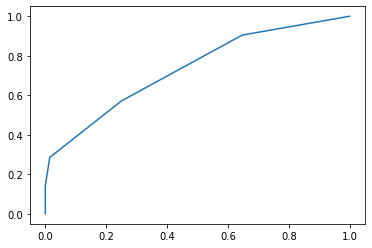

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 10 err_train = 0.16111111111111112 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


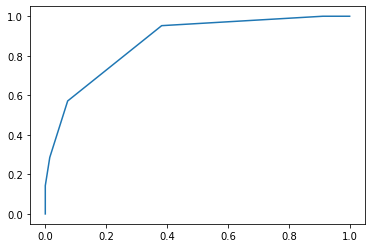

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 15 err_train = 0.16111111111111112 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


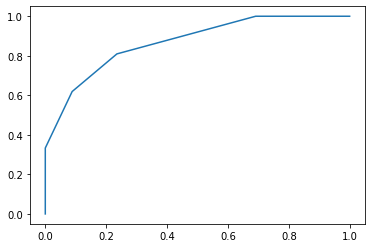

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 20 err_train = 0.16111111111111112 err_test = 0.23595505617977527
[[68  0]
 [21  0]]
Mera F1 Train: 0.0
Precision Score Train:  0.7640449438202247
Recall Score Train:  0.7640449438202247


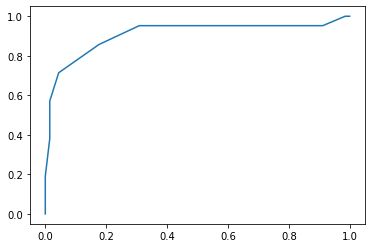

neighbours = 50 err_train = 0.16111111111111112 err_test = 0.23595505617977527
[[68  0]
 [21  0]]
Mera F1 Train: 0.0
Precision Score Train:  0.7640449438202247
Recall Score Train:  0.7640449438202247


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [484]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[11][i]=err_test
    Knn_train[11][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [485]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[11][i]= err_test
    SVC_train_RBF[11][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.15 err_test_SVC_rbf = 0.21348314606741572
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.23595505617977527


## Linear

In [486]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[11]= err_test
SVC_train_Lin[11]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.07865168539325842


## Poly

In [487]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[11][i-2]=err_test
    SVC_train_Poly[11][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.14444444444444443 err_test_SVC_Poly = 0.19101123595505617
degree = 3 err_train_SVC_Poly = 0.12777777777777777 err_test_SVC_Poly = 0.1797752808988764
degree = 4 err_train_SVC_Poly = 0.1 err_test_SVC_Poly = 0.16853932584269662


## NeighbourhoodCleaningRule

In [488]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule()
X_resampled, y_resampled = ncr.fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 126), (1, 29)]


## Knn

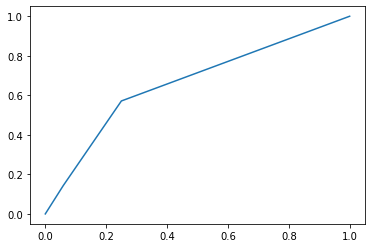

neighbours = 2 err_train = 0.07741935483870968 err_test = 0.24719101123595505
[[64  4]
 [18  3]]
Mera F1 Train: 0.21428571428571427
Precision Score Train:  0.7528089887640449
Recall Score Train:  0.7528089887640449


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


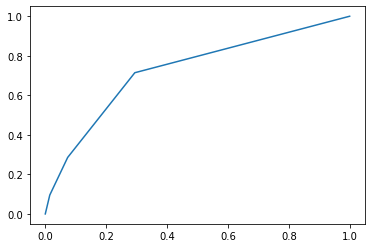

neighbours = 3 err_train = 0.06451612903225806 err_test = 0.2247191011235955
[[63  5]
 [15  6]]
Mera F1 Train: 0.37499999999999994
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


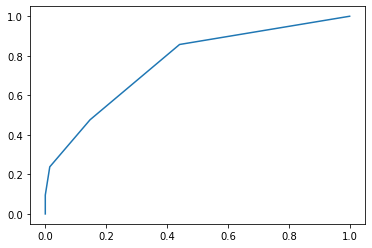

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 5 err_train = 0.0967741935483871 err_test = 0.19101123595505617
[[67  1]
 [16  5]]
Mera F1 Train: 0.37037037037037035
Precision Score Train:  0.8089887640449438
Recall Score Train:  0.8089887640449438


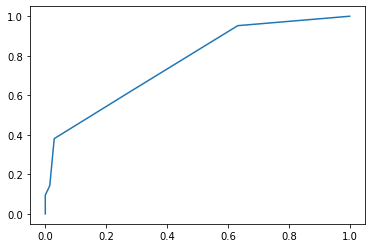

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 7 err_train = 0.13548387096774195 err_test = 0.21348314606741572
[[67  1]
 [18  3]]
Mera F1 Train: 0.24
Precision Score Train:  0.7865168539325843
Recall Score Train:  0.7865168539325843


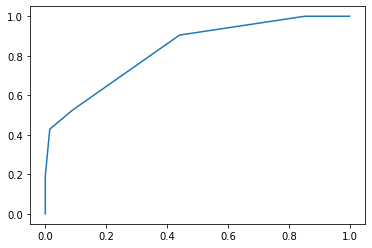

neighbours = 10 err_train = 0.16774193548387098 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


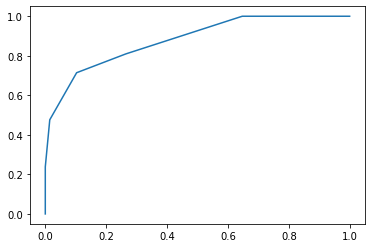

neighbours = 15 err_train = 0.17419354838709677 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


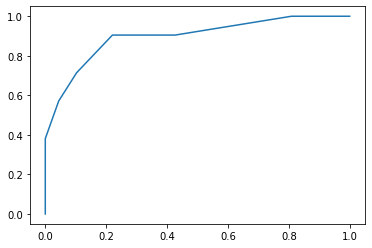

neighbours = 20 err_train = 0.18064516129032257 err_test = 0.2247191011235955
[[68  0]
 [20  1]]
Mera F1 Train: 0.0909090909090909
Precision Score Train:  0.7752808988764045
Recall Score Train:  0.7752808988764045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


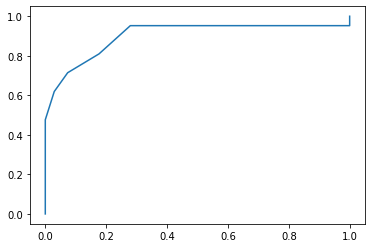

neighbours = 50 err_train = 0.1870967741935484 err_test = 0.23595505617977527
[[68  0]
 [21  0]]
Mera F1 Train: 0.0
Precision Score Train:  0.7640449438202247
Recall Score Train:  0.7640449438202247


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [489]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[12][i]=err_test
    Knn_train[12][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [490]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[12][i]= err_test
    SVC_train_RBF[12][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.16774193548387098 err_test_SVC_rbf = 0.21348314606741572
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.23595505617977527


## Linear

In [491]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[12]= err_test
SVC_train_Lin[12]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.10112359550561797


## Poly

In [492]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[12][i-2]=err_test
    SVC_train_Poly[12][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.16129032258064516 err_test_SVC_Poly = 0.1797752808988764
degree = 3 err_train_SVC_Poly = 0.12258064516129032 err_test_SVC_Poly = 0.1797752808988764
degree = 4 err_train_SVC_Poly = 0.0967741935483871 err_test_SVC_Poly = 0.15730337078651685


 ## Instance hardness threshold

In [493]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold(random_state=0,
                                estimator=LogisticRegression(
                                    solver='lbfgs', multi_class='auto'))
X_resampled, y_resampled = iht.fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 29), (1, 29)]


H:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

## Knn

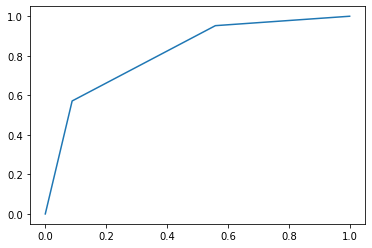

neighbours = 2 err_train = 0.13793103448275862 err_test = 0.16853932584269662
[[62  6]
 [ 9 12]]
Mera F1 Train: 0.6153846153846153
Precision Score Train:  0.8314606741573034
Recall Score Train:  0.8314606741573034


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


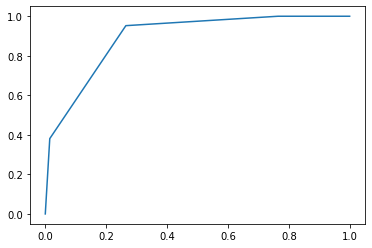

neighbours = 3 err_train = 0.08620689655172414 err_test = 0.21348314606741572
[[50 18]
 [ 1 20]]
Mera F1 Train: 0.6779661016949152
Precision Score Train:  0.7865168539325843
Recall Score Train:  0.7865168539325843


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


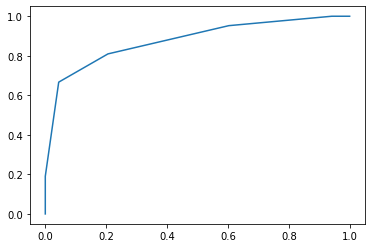

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 5 err_train = 0.10344827586206896 err_test = 0.20224719101123595
[[54 14]
 [ 4 17]]
Mera F1 Train: 0.6538461538461537
Precision Score Train:  0.797752808988764
Recall Score Train:  0.797752808988764


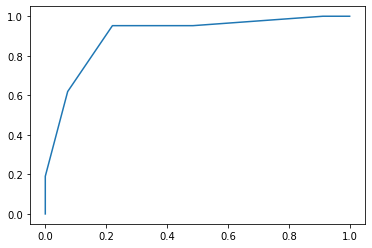

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 7 err_train = 0.13793103448275862 err_test = 0.1797752808988764
[[53 15]
 [ 1 20]]
Mera F1 Train: 0.7142857142857142
Precision Score Train:  0.8202247191011236
Recall Score Train:  0.8202247191011236


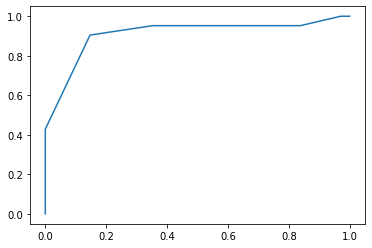

neighbours = 10 err_train = 0.08620689655172414 err_test = 0.1348314606741573
[[58 10]
 [ 2 19]]
Mera F1 Train: 0.7599999999999999
Precision Score Train:  0.8651685393258427
Recall Score Train:  0.8651685393258427


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


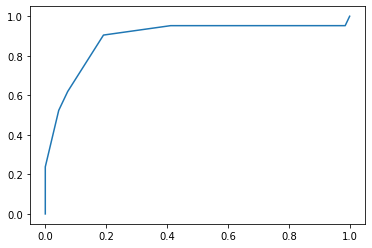

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 15 err_train = 0.06896551724137931 err_test = 0.16853932584269662
[[55 13]
 [ 2 19]]
Mera F1 Train: 0.7169811320754718
Precision Score Train:  0.8314606741573034
Recall Score Train:  0.8314606741573034


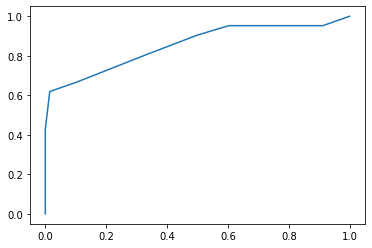

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 20 err_train = 0.10344827586206896 err_test = 0.15730337078651685
[[61  7]
 [ 7 14]]
Mera F1 Train: 0.6666666666666666
Precision Score Train:  0.8426966292134831
Recall Score Train:  0.8426966292134831


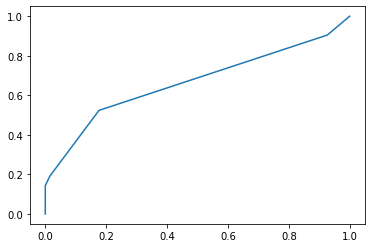

neighbours = 50 err_train = 0.29310344827586204 err_test = 0.24719101123595505
[[56 12]
 [10 11]]
Mera F1 Train: 0.5
Precision Score Train:  0.7528089887640449
Recall Score Train:  0.7528089887640449


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [494]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[13][i]=err_test
    Knn_train[13][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [495]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[13][i]= err_test
    SVC_train_RBF[13][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.06896551724137931 err_test_SVC_rbf = 0.19101123595505617
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.7303370786516854


## Linear

In [496]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[13]= err_test
SVC_train_Lin[13]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.29213483146067415


## Poly

In [497]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[13][i-2]=err_test
    SVC_train_Poly[13][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.05172413793103448 err_test_SVC_Poly = 0.16853932584269662
degree = 3 err_train_SVC_Poly = 0.05172413793103448 err_test_SVC_Poly = 0.16853932584269662
degree = 4 err_train_SVC_Poly = 0.05172413793103448 err_test_SVC_Poly = 0.1797752808988764


# Combination of over- and under-sampling

SMOTE может генерировать зашумленные выборки путем интерполяции новых точек между маргинальными выбросами и выбросами. Эту проблему можно решить, очистив пространство, возникшее из-за передозировки.

# SMOTEENN

In [498]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 81), (1, 171)]


## Knn

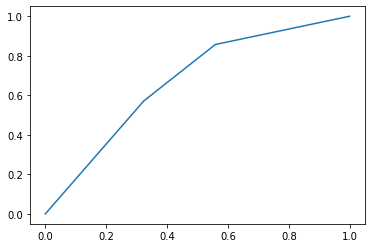

neighbours = 2 err_train = 0.0 err_test = 0.34831460674157305
[[46 22]
 [ 9 12]]
Mera F1 Train: 0.43636363636363634
Precision Score Train:  0.651685393258427
Recall Score Train:  0.651685393258427


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


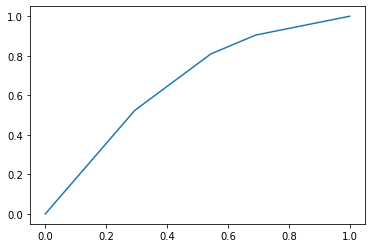

neighbours = 3 err_train = 0.01984126984126984 err_test = 0.4606741573033708
[[31 37]
 [ 4 17]]
Mera F1 Train: 0.4533333333333333
Precision Score Train:  0.5393258426966292
Recall Score Train:  0.5393258426966292


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


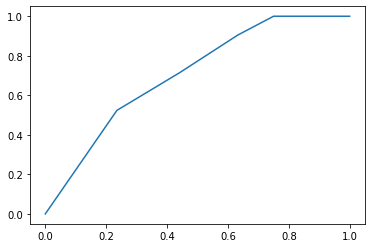

neighbours = 5 err_train = 0.04365079365079365 err_test = 0.5056179775280899
[[25 43]
 [ 2 19]]
Mera F1 Train: 0.4578313253012048
Precision Score Train:  0.4943820224719101
Recall Score Train:  0.4943820224719101


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


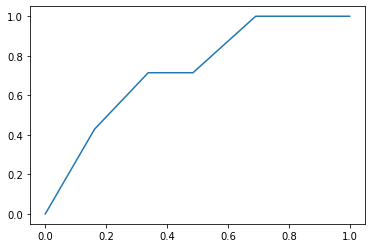

neighbours = 7 err_train = 0.08333333333333333 err_test = 0.5280898876404494
[[21 47]
 [ 0 21]]
Mera F1 Train: 0.4719101123595506
Precision Score Train:  0.47191011235955055
Recall Score Train:  0.47191011235955055


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


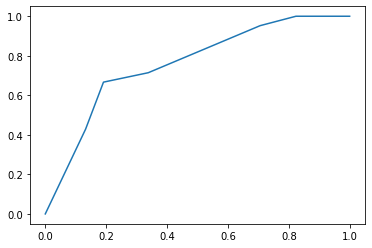

neighbours = 10 err_train = 0.11507936507936507 err_test = 0.550561797752809
[[20 48]
 [ 1 20]]
Mera F1 Train: 0.449438202247191
Precision Score Train:  0.449438202247191
Recall Score Train:  0.449438202247191


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


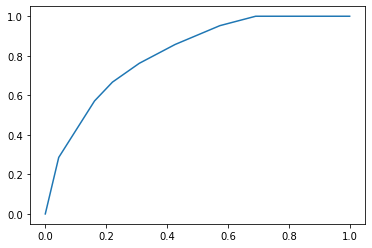

neighbours = 15 err_train = 0.18253968253968253 err_test = 0.6067415730337079
[[14 54]
 [ 0 21]]
Mera F1 Train: 0.43750000000000006
Precision Score Train:  0.39325842696629215
Recall Score Train:  0.39325842696629215


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


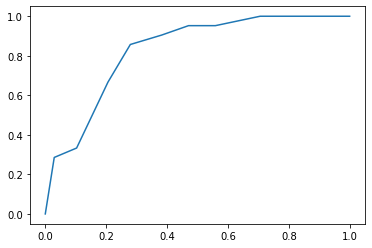

neighbours = 20 err_train = 0.20238095238095238 err_test = 0.6179775280898876
[[13 55]
 [ 0 21]]
Mera F1 Train: 0.4329896907216495
Precision Score Train:  0.38202247191011235
Recall Score Train:  0.38202247191011235


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


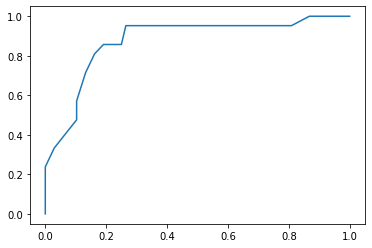

neighbours = 50 err_train = 0.24603174603174602 err_test = 0.6853932584269663
[[ 7 61]
 [ 0 21]]
Mera F1 Train: 0.4077669902912621
Precision Score Train:  0.3146067415730337
Recall Score Train:  0.3146067415730337


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [499]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[14][i]=err_test
    Knn_train[14][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [500]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[14][i]= err_test
    SVC_train_RBF[14][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.09523809523809523 err_test_SVC_rbf = 0.30337078651685395
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.7640449438202247


## Linear

In [501]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[14]= err_test
SVC_train_Lin[14]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.12359550561797752


## Poly

In [502]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[14][i-2]=err_test
    SVC_train_Poly[14][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.10317460317460317 err_test_SVC_Poly = 0.29213483146067415
degree = 3 err_train_SVC_Poly = 0.07142857142857142 err_test_SVC_Poly = 0.23595505617977527
degree = 4 err_train_SVC_Poly = 0.06349206349206349 err_test_SVC_Poly = 0.21348314606741572


# SMOTETomek

In [503]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train_binary)
print(sorted(Counter(y_resampled).items()))

[(0, 176), (1, 176)]


## Knn

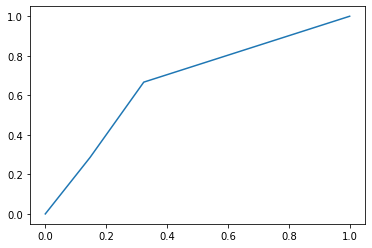

neighbours = 2 err_train = 0.0 err_test = 0.2808988764044944
[[58 10]
 [15  6]]
Mera F1 Train: 0.3243243243243243
Precision Score Train:  0.7191011235955056
Recall Score Train:  0.7191011235955056


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


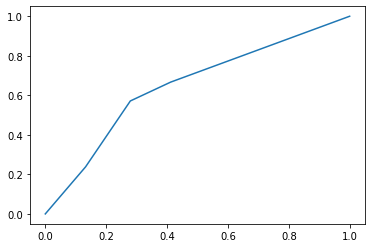

neighbours = 3 err_train = 0.10227272727272728 err_test = 0.3146067415730337
[[49 19]
 [ 9 12]]
Mera F1 Train: 0.4615384615384615
Precision Score Train:  0.6853932584269663
Recall Score Train:  0.6853932584269663


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


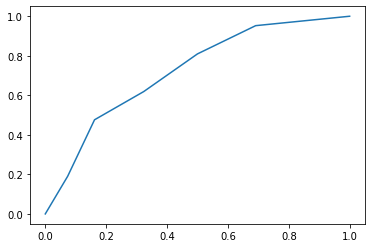

neighbours = 5 err_train = 0.125 err_test = 0.33707865168539325
[[46 22]
 [ 8 13]]
Mera F1 Train: 0.4642857142857143
Precision Score Train:  0.6629213483146067
Recall Score Train:  0.6629213483146067


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


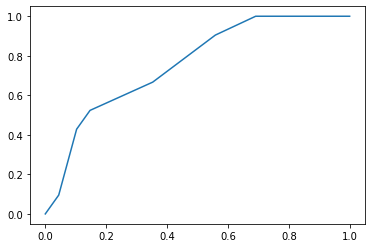

neighbours = 7 err_train = 0.14204545454545456 err_test = 0.34831460674157305
[[44 24]
 [ 7 14]]
Mera F1 Train: 0.4745762711864407
Precision Score Train:  0.651685393258427
Recall Score Train:  0.651685393258427


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


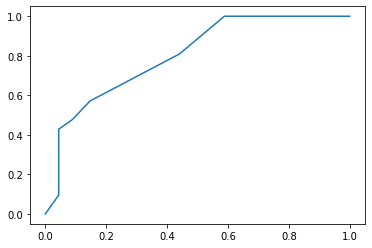

neighbours = 10 err_train = 0.15056818181818182 err_test = 0.3146067415730337
[[46 22]
 [ 6 15]]
Mera F1 Train: 0.5172413793103449
Precision Score Train:  0.6853932584269663
Recall Score Train:  0.6853932584269663


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


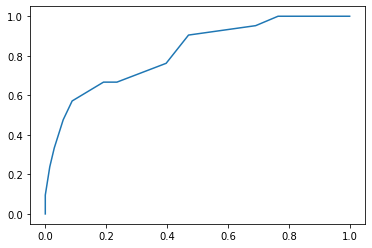

neighbours = 15 err_train = 0.20738636363636365 err_test = 0.3595505617977528
[[41 27]
 [ 5 16]]
Mera F1 Train: 0.5
Precision Score Train:  0.6404494382022472
Recall Score Train:  0.6404494382022472


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


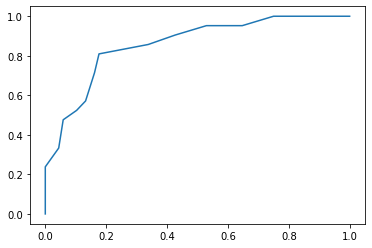

neighbours = 20 err_train = 0.19602272727272727 err_test = 0.29213483146067415
[[45 23]
 [ 3 18]]
Mera F1 Train: 0.5806451612903225
Precision Score Train:  0.7078651685393258
Recall Score Train:  0.7078651685393258


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


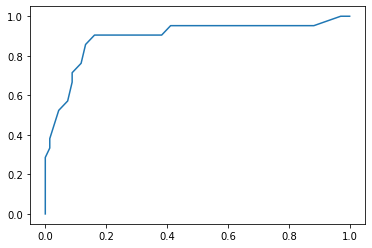

neighbours = 50 err_train = 0.23863636363636365 err_test = 0.3146067415730337
[[42 26]
 [ 2 19]]
Mera F1 Train: 0.5757575757575758
Precision Score Train:  0.6853932584269663
Recall Score Train:  0.6853932584269663


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [504]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test_binary  != y_test_predict)
    Knn_test[15][i]=err_test
    Knn_train[15][i]=err_train
    #for j in range (6):
    #    print("threshold = ",tresholds_array[j])
    #    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
    #    plt.plot(fpr,tpr,label="ROC")
    #    plt.show()
    #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test_binary,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test_binary,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test_binary,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test_binary, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [505]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_RBF[15][i]= err_test
    SVC_train_RBF[15][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.09375 err_test_SVC_rbf = 0.0898876404494382
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.23595505617977527


## Linear

In [506]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test_binary != svc_model.predict(X_test))
SVC_test_Lin[15]= err_test
SVC_train_Lin[15]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.11235955056179775


## Poly

In [507]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test_binary != svc_model.predict(X_test))
    SVC_test_Poly[15][i-2]=err_test
    SVC_train_Poly[15][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.08238636363636363 err_test_SVC_Poly = 0.0898876404494382
degree = 3 err_train_SVC_Poly = 0.0625 err_test_SVC_Poly = 0.056179775280898875
degree = 4 err_train_SVC_Poly = 0.048295454545454544 err_test_SVC_Poly = 0.056179775280898875


In [508]:
print('Test Err in Knn')
print("%-31s"%('Method'),'|',"%-7s"%('n = 2'),'|',"%-7s"%('n = 3'),'|',"%-7s"%('n = 5'),'|',"%-7s"%('n = 7'),'|',"%-7s"%('n = 10'),'|',"%-7s"%('n = 15'),'|',"%-7s"%('n = 20'),'|',"%-7s"%('n = 50'),'|',"%-7s"%('n = 100'))
for i in range(16):
    print("%-31s"%(methods[i]),'|',"%.5f"%(Knn_test[i][0]),'|',"%.5f"%(Knn_test[i][1]),'|',"%.5f"%(Knn_test[i][2]),'|',"%.5f"%(Knn_test[i][3]),'|',"%.5f"%(Knn_test[i][4]),'|',"%.5f"%(Knn_test[i][5]),'|',"%.5f"%(Knn_test[i][6]),'|',"%.5f"%(Knn_test[i][7]),'|',"%.5f"%(Knn_test[i][8]))

Test Err in Knn
Method                          | n = 2   | n = 3   | n = 5   | n = 7   | n = 10  | n = 15  | n = 20  | n = 50  | n = 100
Naive                           | 0.28090 | 0.22472 | 0.22472 | 0.24719 | 0.30337 | 0.33708 | 0.30337 | 0.17978 | 0.13483
SMOTE                           | 0.24719 | 0.26966 | 0.24719 | 0.25843 | 0.25843 | 0.28090 | 0.24719 | 0.28090 | 0.28090
BorderlineSMOTE                 | 0.25843 | 0.24719 | 0.28090 | 0.32584 | 0.26966 | 0.28090 | 0.23596 | 0.26966 | 0.29213
ADASYN                          | 0.29213 | 0.28090 | 0.25843 | 0.30337 | 0.30337 | 0.34831 | 0.30337 | 0.31461 | 0.34831
ClusterCentroids                | 0.20225 | 0.19101 | 0.19101 | 0.19101 | 0.20225 | 0.13483 | 0.16854 | 0.31461 | 0.00000
RandomUnderSampler              | 0.23596 | 0.31461 | 0.16854 | 0.19101 | 0.16854 | 0.08989 | 0.15730 | 0.20225 | 0.00000
NearMiss                        | 0.20225 | 0.22472 | 0.17978 | 0.17978 | 0.16854 | 0.20225 | 0.21348 | 0.23596 | 0.00000
EditedNe

In [509]:
print('Train Err in Knn')
print("%-31s"%('Method'),'|',"%-7s"%('n = 2'),'|',"%-7s"%('n = 3'),'|',"%-7s"%('n = 5'),'|',"%-7s"%('n = 7'),'|',"%-7s"%('n = 10'),'|',"%-7s"%('n = 15'),'|',"%-7s"%('n = 20'),'|',"%-7s"%('n = 50'),'|',"%-7s"%('n = 100'))
for i in range(16):
    print("%-31s"%(methods[i]),'|',"%.5f"%(Knn_train[i][0]),'|',"%.5f"%(Knn_train[i][1]),'|',"%.5f"%(Knn_train[i][2]),'|',"%.5f"%(Knn_train[i][3]),'|',"%.5f"%(Knn_train[i][4]),'|',"%.5f"%(Knn_train[i][5]),'|',"%.5f"%(Knn_train[i][6]),'|',"%.5f"%(Knn_train[i][7]),'|',"%.5f"%(Knn_train[i][8]))

Train Err in Knn
Method                          | n = 2   | n = 3   | n = 5   | n = 7   | n = 10  | n = 15  | n = 20  | n = 50  | n = 100
Naive                           | 0.00000 | 0.02557 | 0.06534 | 0.09659 | 0.13920 | 0.21307 | 0.18466 | 0.23580 | 0.26136
SMOTE                           | 0.00000 | 0.07386 | 0.10795 | 0.14205 | 0.14489 | 0.17614 | 0.16477 | 0.23011 | 0.23295
BorderlineSMOTE                 | 0.00284 | 0.07102 | 0.10795 | 0.14773 | 0.11080 | 0.15625 | 0.15057 | 0.22727 | 0.23295
ADASYN                          | 0.00000 | 0.09040 | 0.12712 | 0.15537 | 0.14689 | 0.20904 | 0.18079 | 0.25424 | 0.27966
ClusterCentroids                | 0.32759 | 0.22414 | 0.27586 | 0.31034 | 0.37931 | 0.32759 | 0.39655 | 0.31034 | 0.00000
RandomUnderSampler              | 0.20690 | 0.13793 | 0.22414 | 0.27586 | 0.32759 | 0.24138 | 0.37931 | 0.44828 | 0.00000
NearMiss                        | 0.34483 | 0.17241 | 0.25862 | 0.37931 | 0.44828 | 0.43103 | 0.48276 | 0.50000 | 0.00000
EditedN

In [510]:
print('Errors in SVC linear')
print("%-31s"%('Method'),'|',"{:^10}".format('Train'),'|',"{:^10}".format('Test'),'|')
for i in range(16):
    print("%-31s"%(methods[i]),'|',"%.8f"%(SVC_train_Lin[i]),'|',"%.8f"%(SVC_test_Lin[i]),'|')


Errors in SVC linear
Method                          |   Train    |    Test    |
Naive                           | 0.00000000 | 0.10112360 |
SMOTE                           | 0.00000000 | 0.08988764 |
BorderlineSMOTE                 | 0.00000000 | 0.08988764 |
ADASYN                          | 0.00000000 | 0.08988764 |
ClusterCentroids                | 0.00000000 | 0.15730337 |
RandomUnderSampler              | 0.00000000 | 0.19101124 |
NearMiss                        | 0.00000000 | 0.17977528 |
EditedNearestNeighbours         | 0.00000000 | 0.08988764 |
RepeatedEditedNearestNeighbours | 0.00000000 | 0.08988764 |
AllKNN                          | 0.00000000 | 0.08988764 |
CondensedNearestNeighbour       | 0.00000000 | 0.19101124 |
OneSidedSelection               | 0.00000000 | 0.07865169 |
NeighbourhoodCleaningRule       | 0.00000000 | 0.10112360 |
Instance hardness threshold     | 0.00000000 | 0.29213483 |
SMOTEENN                        | 0.00000000 | 0.12359551 |
SMOTETomek         

In [511]:
print('Errors in SVC rbf')
print("%-31s"%('Method'),'|',"{:^10}".format('Train scale'),'|',"{:^10}".format('Test scale'),' |',"{:^10}".format('Train auto'),' |',"{:^10}".format('Test auto'),' |')
for i in range(16):
    print("%-31s"%(methods[i]),'|',"%.9f"%(SVC_train_RBF[i][0]),'|',"%.9f"%(SVC_test_RBF[i][0]),'|',"%.9f"%(SVC_train_RBF[i][1]),'|',"%.9f"%(SVC_test_RBF[i][1]),'|')


Errors in SVC rbf
Method                          | Train scale | Test scale  | Train auto  | Test auto   |
Naive                           | 0.099431818 | 0.067415730 | 0.000000000 | 0.235955056 |
SMOTE                           | 0.062500000 | 0.067415730 | 0.000000000 | 0.235955056 |
BorderlineSMOTE                 | 0.071022727 | 0.067415730 | 0.000000000 | 0.235955056 |
ADASYN                          | 0.081920904 | 0.056179775 | 0.000000000 | 0.235955056 |
ClusterCentroids                | 0.103448276 | 0.089887640 | 0.000000000 | 0.764044944 |
RandomUnderSampler              | 0.120689655 | 0.101123596 | 0.000000000 | 0.741573034 |
NearMiss                        | 0.155172414 | 0.112359551 | 0.000000000 | 0.741573034 |
EditedNearestNeighbours         | 0.158823529 | 0.213483146 | 0.000000000 | 0.235955056 |
RepeatedEditedNearestNeighbours | 0.170886076 | 0.213483146 | 0.000000000 | 0.235955056 |
AllKNN                          | 0.166666667 | 0.213483146 | 0.000000000 | 0.2359

In [512]:
print('Errors in SVC rbf')
print("%-31s"%('Method'),'|',"{:^7}".format('Train deg 2'),'|',"{:^7}".format('Test deg 2'),' |',"{:^7}".format('Train deg 3'),'|',"{:^7}".format('Test deg 3'),' |',"{:^7}".format('Train deg 4'),'|',"{:^7}".format('Test deg 4'),' |')
for i in range(16):
    print("%-31s"%(methods[i]),'|',"%.9f"%(SVC_train_Poly[i][0]),'|',"%.9f"%(SVC_test_Poly[i][0]),'|',"%.9f"%(SVC_train_Poly[i][1]),'|',"%.9f"%(SVC_test_Poly[i][1]),'|',"%.9f"%(SVC_train_Poly[i][2]),'|',"%.9f"%(SVC_test_Poly[i][2]),'|')

Errors in SVC rbf
Method                          | Train deg 2 | Test deg 2  | Train deg 3 | Test deg 3  | Train deg 4 | Test deg 4  |
Naive                           | 0.099431818 | 0.067415730 | 0.062500000 | 0.044943820 | 0.062500000 | 0.044943820 |
SMOTE                           | 0.065340909 | 0.078651685 | 0.051136364 | 0.044943820 | 0.042613636 | 0.044943820 |
BorderlineSMOTE                 | 0.073863636 | 0.089887640 | 0.056818182 | 0.056179775 | 0.051136364 | 0.056179775 |
ADASYN                          | 0.076271186 | 0.067415730 | 0.062146893 | 0.044943820 | 0.056497175 | 0.044943820 |
ClusterCentroids                | 0.120689655 | 0.134831461 | 0.103448276 | 0.134831461 | 0.086206897 | 0.112359551 |
RandomUnderSampler              | 0.120689655 | 0.078651685 | 0.103448276 | 0.089887640 | 0.103448276 | 0.089887640 |
NearMiss                        | 0.137931034 | 0.089887640 | 0.120689655 | 0.112359551 | 0.103448276 | 0.123595506 |
EditedNearestNeighbours         | 0.15

## All Data

In [513]:
methods=['Naive',
         'SMOTE',
         'BorderlineSMOTE',
         'ADASYN',
         'ClusterCentroids',
         'RandomUnderSampler',
         'NearMiss',
         'EditedNearestNeighbours',
         'RepeatedEditedNearestNeighbours',
         'AllKNN',
         'CondensedNearestNeighbour',
         'OneSidedSelection',
         'NeighbourhoodCleaningRule',
         'Instance hardness threshold',
         'SMOTEENN',
         'SMOTETomek']
Knn_test=[[0]*9 for j in range(16)]
Knn_train=[[0]*9 for j in range(16)]
SVC_test_RBF=[[0]*2 for j in range(16)]
SVC_train_RBF=[[0]*2 for j in range(16)]
gamma_mass=['scale','auto']
SVC_test_Lin=[0]*16
SVC_train_Lin=[0]*16
SVC_test_Poly=[[0]*3 for j in range(16)]
SVC_train_Poly=[[0]*3 for j in range(16)]

In [514]:
X = data_raw.drop('diagnosis', axis = 1)
y = data_raw['diagnosis']

In [515]:
y = np.array(y != 1, dtype='int')
X = X.to_numpy()

In [516]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [517]:
y_test

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0])

# Naive

In [518]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 170), (1, 170)]


## Knn

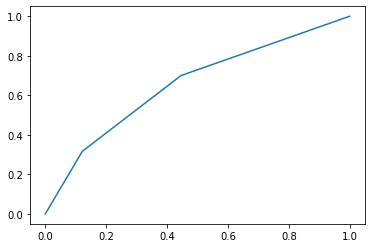

neighbours = 2 err_train = 0.17647058823529413 err_test = 0.373134328358209
[[65  9]
 [41 19]]
Mera F1 Train: 0.4318181818181818
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


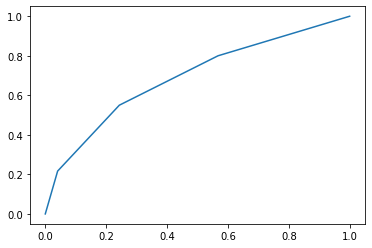

neighbours = 3 err_train = 0.15294117647058825 err_test = 0.3358208955223881
[[56 18]
 [27 33]]
Mera F1 Train: 0.5945945945945946
Precision Score Train:  0.664179104477612
Recall Score Train:  0.664179104477612


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


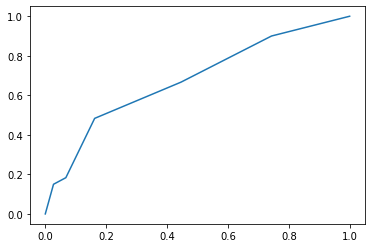

neighbours = 5 err_train = 0.2088235294117647 err_test = 0.3208955223880597
[[62 12]
 [31 29]]
Mera F1 Train: 0.5742574257425742
Precision Score Train:  0.6791044776119403
Recall Score Train:  0.6791044776119403


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


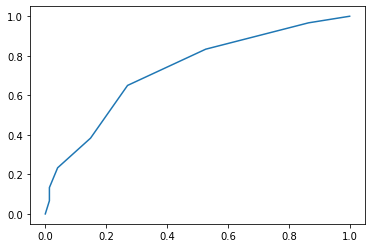

neighbours = 7 err_train = 0.2235294117647059 err_test = 0.3582089552238806
[[63 11]
 [37 23]]
Mera F1 Train: 0.4893617021276596
Precision Score Train:  0.6417910447761194
Recall Score Train:  0.6417910447761194


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


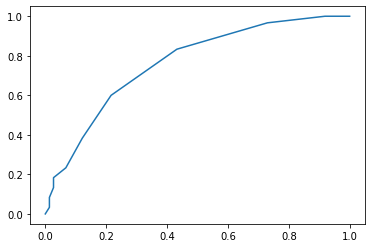

neighbours = 10 err_train = 0.3411764705882353 err_test = 0.3805970149253731
[[69  5]
 [46 14]]
Mera F1 Train: 0.35443037974683544
Precision Score Train:  0.6194029850746269
Recall Score Train:  0.6194029850746269


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


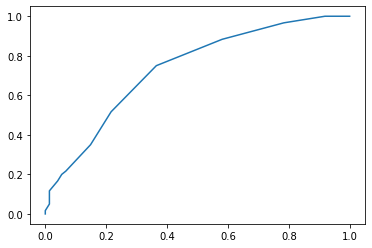

neighbours = 15 err_train = 0.34411764705882353 err_test = 0.3880597014925373
[[69  5]
 [47 13]]
Mera F1 Train: 0.3333333333333333
Precision Score Train:  0.6119402985074627
Recall Score Train:  0.6119402985074627


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


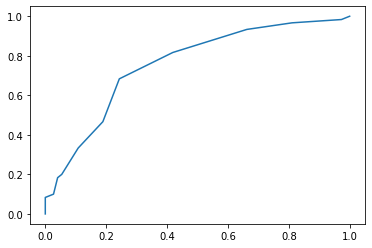

neighbours = 20 err_train = 0.3735294117647059 err_test = 0.3880597014925373
[[70  4]
 [48 12]]
Mera F1 Train: 0.31578947368421056
Precision Score Train:  0.6119402985074627
Recall Score Train:  0.6119402985074627


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


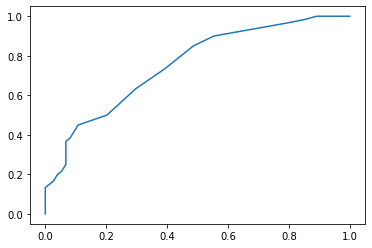

neighbours = 50 err_train = 0.4441176470588235 err_test = 0.3880597014925373
[[74  0]
 [52  8]]
Mera F1 Train: 0.23529411764705882
Precision Score Train:  0.6119402985074627
Recall Score Train:  0.6119402985074627


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


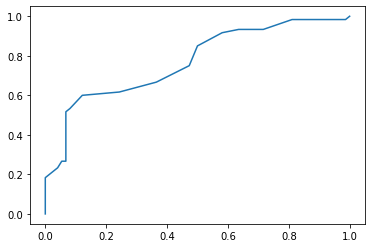

neighbours = 100 err_train = 0.49411764705882355 err_test = 0.4253731343283582
[[74  0]
 [57  3]]
Mera F1 Train: 0.09523809523809523
Precision Score Train:  0.5746268656716418
Recall Score Train:  0.5746268656716418


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [519]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[0][i]=err_test
    Knn_train[0][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [520]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[0][i]= err_test
    SVC_train_RBF[0][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.26176470588235295 err_test_SVC_rbf = 0.23134328358208955
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.44776119402985076


## Linear

In [521]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[0]= err_test
SVC_train_Lin[0]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.39552238805970147


## Poly

In [522]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[0][i-2]=err_test
    SVC_train_Poly[0][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.24705882352941178 err_test_SVC_Poly = 0.27611940298507465
degree = 3 err_train_SVC_Poly = 0.21470588235294116 err_test_SVC_Poly = 0.23134328358208955
degree = 4 err_train_SVC_Poly = 0.19705882352941176 err_test_SVC_Poly = 0.2537313432835821


# SMOTE

In [523]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 170), (1, 170)]


## Knn

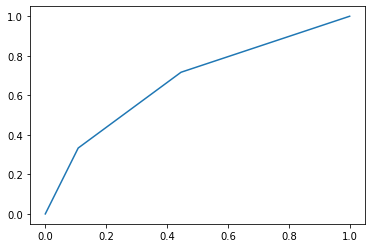

neighbours = 2 err_train = 0.15294117647058825 err_test = 0.3582089552238806
[[66  8]
 [40 20]]
Mera F1 Train: 0.4545454545454545
Precision Score Train:  0.6417910447761194
Recall Score Train:  0.6417910447761194


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


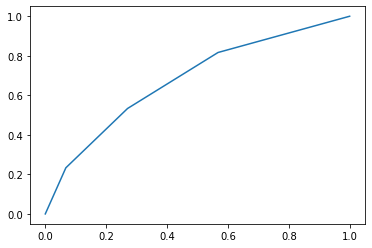

neighbours = 3 err_train = 0.1411764705882353 err_test = 0.3582089552238806
[[54 20]
 [28 32]]
Mera F1 Train: 0.5714285714285715
Precision Score Train:  0.6417910447761194
Recall Score Train:  0.6417910447761194


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


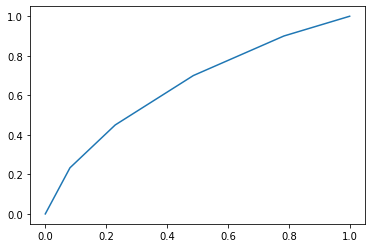

neighbours = 5 err_train = 0.20294117647058824 err_test = 0.373134328358209
[[57 17]
 [33 27]]
Mera F1 Train: 0.5192307692307692
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


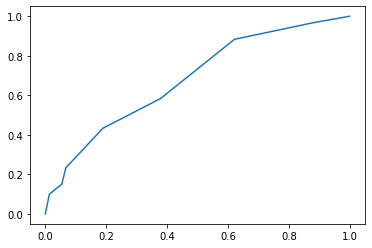

neighbours = 7 err_train = 0.26176470588235295 err_test = 0.3582089552238806
[[60 14]
 [34 26]]
Mera F1 Train: 0.5199999999999999
Precision Score Train:  0.6417910447761194
Recall Score Train:  0.6417910447761194


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


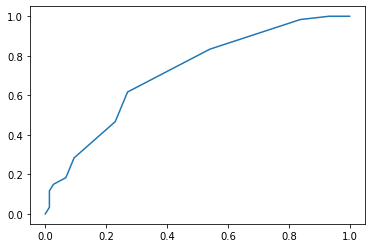

neighbours = 10 err_train = 0.2911764705882353 err_test = 0.373134328358209
[[67  7]
 [43 17]]
Mera F1 Train: 0.40476190476190477
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


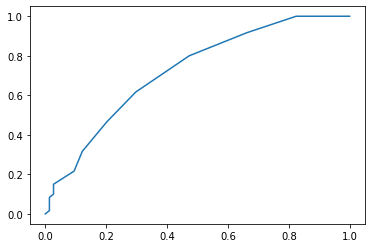

neighbours = 15 err_train = 0.2852941176470588 err_test = 0.373134328358209
[[65  9]
 [41 19]]
Mera F1 Train: 0.4318181818181818
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


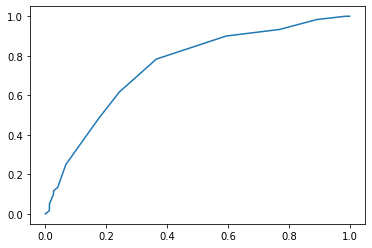

neighbours = 20 err_train = 0.3323529411764706 err_test = 0.373134328358209
[[69  5]
 [45 15]]
Mera F1 Train: 0.375
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


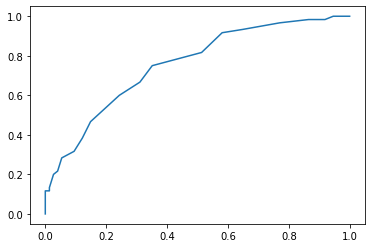

neighbours = 50 err_train = 0.42058823529411765 err_test = 0.39552238805970147
[[73  1]
 [52  8]]
Mera F1 Train: 0.2318840579710145
Precision Score Train:  0.6044776119402985
Recall Score Train:  0.6044776119402985


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


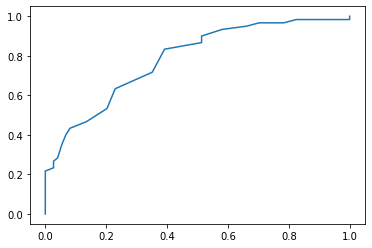

neighbours = 100 err_train = 0.49117647058823527 err_test = 0.41044776119402987
[[74  0]
 [55  5]]
Mera F1 Train: 0.15384615384615385
Precision Score Train:  0.5895522388059702
Recall Score Train:  0.5895522388059702


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [524]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[1][i]=err_test
    Knn_train[1][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [525]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[1][i]= err_test
    SVC_train_RBF[1][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.2676470588235294 err_test_SVC_rbf = 0.21641791044776118
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.44776119402985076


## Linear

In [526]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[1]= err_test
SVC_train_Lin[1]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.39552238805970147


## Poly

In [527]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[1][i-2]=err_test
    SVC_train_Poly[1][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.24705882352941178 err_test_SVC_Poly = 0.2537313432835821
degree = 3 err_train_SVC_Poly = 0.22058823529411764 err_test_SVC_Poly = 0.22388059701492538
degree = 4 err_train_SVC_Poly = 0.19117647058823528 err_test_SVC_Poly = 0.23880597014925373


# BorderlineSMOTE

In [528]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 170), (1, 170)]


## Knn

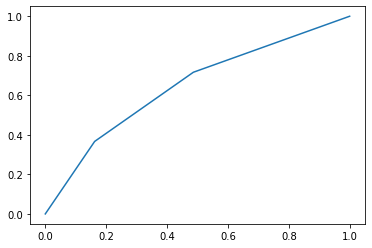

neighbours = 2 err_train = 0.15 err_test = 0.373134328358209
[[62 12]
 [38 22]]
Mera F1 Train: 0.46808510638297873
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


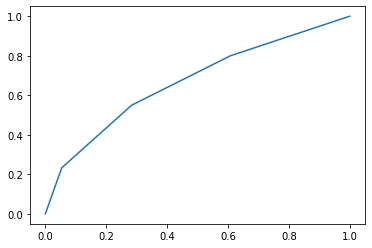

neighbours = 3 err_train = 0.14705882352941177 err_test = 0.3582089552238806
[[53 21]
 [27 33]]
Mera F1 Train: 0.5789473684210527
Precision Score Train:  0.6417910447761194
Recall Score Train:  0.6417910447761194


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


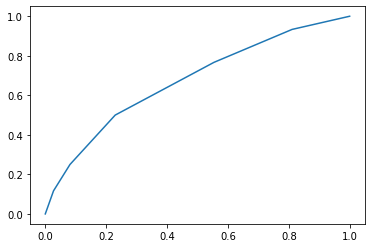

neighbours = 5 err_train = 0.19411764705882353 err_test = 0.35074626865671643
[[57 17]
 [30 30]]
Mera F1 Train: 0.5607476635514019
Precision Score Train:  0.6492537313432836
Recall Score Train:  0.6492537313432836


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


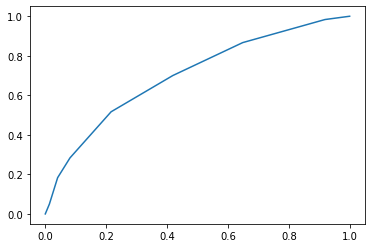

neighbours = 7 err_train = 0.23823529411764705 err_test = 0.3358208955223881
[[58 16]
 [29 31]]
Mera F1 Train: 0.5794392523364487
Precision Score Train:  0.664179104477612
Recall Score Train:  0.664179104477612


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


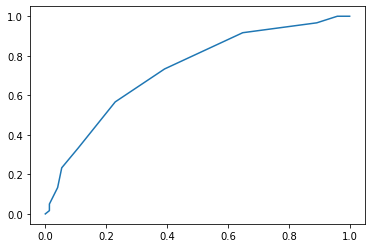

neighbours = 10 err_train = 0.29411764705882354 err_test = 0.3582089552238806
[[66  8]
 [40 20]]
Mera F1 Train: 0.4545454545454545
Precision Score Train:  0.6417910447761194
Recall Score Train:  0.6417910447761194


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


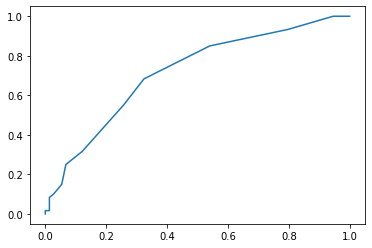

neighbours = 15 err_train = 0.2852941176470588 err_test = 0.373134328358209
[[65  9]
 [41 19]]
Mera F1 Train: 0.4318181818181818
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


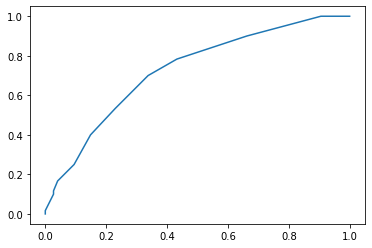

neighbours = 20 err_train = 0.3323529411764706 err_test = 0.3880597014925373
[[67  7]
 [45 15]]
Mera F1 Train: 0.36585365853658536
Precision Score Train:  0.6119402985074627
Recall Score Train:  0.6119402985074627


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


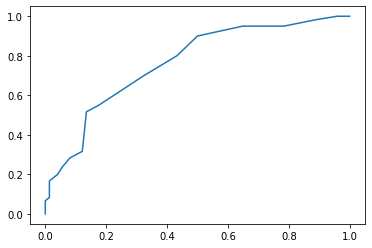

neighbours = 50 err_train = 0.4470588235294118 err_test = 0.3805970149253731
[[73  1]
 [50 10]]
Mera F1 Train: 0.2816901408450704
Precision Score Train:  0.6194029850746269
Recall Score Train:  0.6194029850746269


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


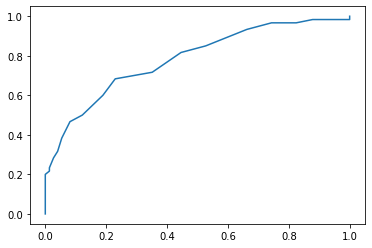

neighbours = 100 err_train = 0.49117647058823527 err_test = 0.44029850746268656
[[74  0]
 [59  1]]
Mera F1 Train: 0.03278688524590164
Precision Score Train:  0.5597014925373134
Recall Score Train:  0.5597014925373134


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [529]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[2][i]=err_test
    Knn_train[2][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [530]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[2][i]= err_test
    SVC_train_RBF[2][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.2529411764705882 err_test_SVC_rbf = 0.208955223880597
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.44776119402985076


## Linear

In [531]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[2]= err_test
SVC_train_Lin[2]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.39552238805970147


## Poly

In [532]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[2][i-2]=err_test
    SVC_train_Poly[2][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.24411764705882352 err_test_SVC_Poly = 0.22388059701492538
degree = 3 err_train_SVC_Poly = 0.2088235294117647 err_test_SVC_Poly = 0.22388059701492538
degree = 4 err_train_SVC_Poly = 0.19705882352941176 err_test_SVC_Poly = 0.2537313432835821


# ADASYN

from imblearn.over_sampling import ADASYN
X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

## Knn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[3][i]=err_test
    Knn_train[3][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

from sklearn.svm import SVC
svc_model = SVC(kernel = 'rbf')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test[3]= err_test
SVC_train[3]= err_train
print ('err_train_SVC =',err_train,'err_test_SVC =', err_test)

# Prototype generation

# ClusterCentroids

In [533]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 140), (1, 140)]


## Knn

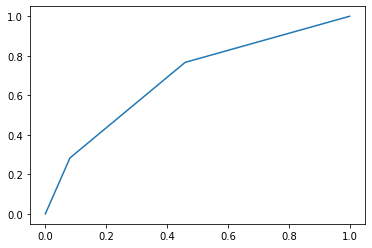

neighbours = 2 err_train = 0.25357142857142856 err_test = 0.3656716417910448
[[68  6]
 [43 17]]
Mera F1 Train: 0.4096385542168674
Precision Score Train:  0.6343283582089553
Recall Score Train:  0.6343283582089553


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


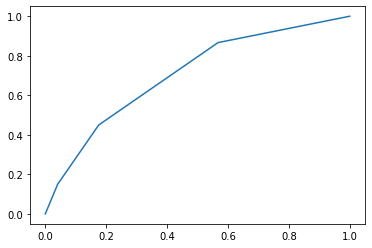

neighbours = 3 err_train = 0.18928571428571428 err_test = 0.34328358208955223
[[61 13]
 [33 27]]
Mera F1 Train: 0.54
Precision Score Train:  0.6567164179104478
Recall Score Train:  0.6567164179104478


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


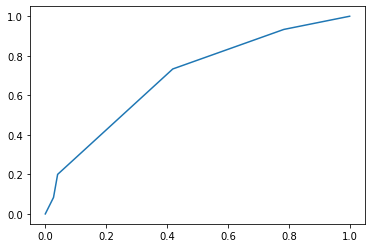

neighbours = 5 err_train = 0.26071428571428573 err_test = 0.373134328358209
[[64 10]
 [40 20]]
Mera F1 Train: 0.4444444444444444
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


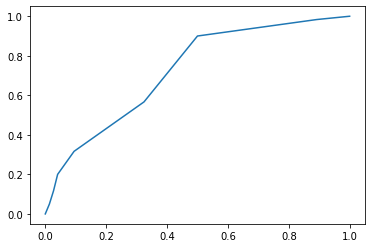

neighbours = 7 err_train = 0.3 err_test = 0.3582089552238806
[[67  7]
 [41 19]]
Mera F1 Train: 0.44186046511627913
Precision Score Train:  0.6417910447761194
Recall Score Train:  0.6417910447761194


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


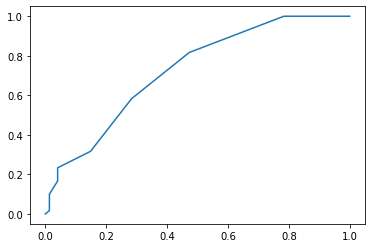

neighbours = 10 err_train = 0.3678571428571429 err_test = 0.3656716417910448
[[71  3]
 [46 14]]
Mera F1 Train: 0.3636363636363636
Precision Score Train:  0.6343283582089553
Recall Score Train:  0.6343283582089553


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


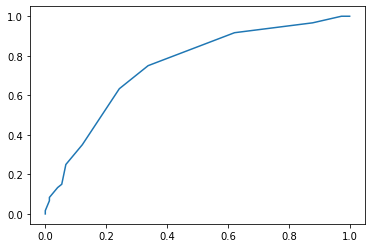

neighbours = 15 err_train = 0.3357142857142857 err_test = 0.373134328358209
[[69  5]
 [45 15]]
Mera F1 Train: 0.375
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


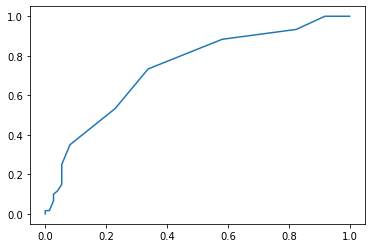

neighbours = 20 err_train = 0.36428571428571427 err_test = 0.41044776119402987
[[70  4]
 [51  9]]
Mera F1 Train: 0.2465753424657534
Precision Score Train:  0.5895522388059702
Recall Score Train:  0.5895522388059702


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


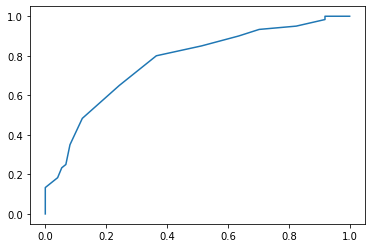

neighbours = 50 err_train = 0.4714285714285714 err_test = 0.40298507462686567
[[74  0]
 [54  6]]
Mera F1 Train: 0.18181818181818182
Precision Score Train:  0.5970149253731343
Recall Score Train:  0.5970149253731343


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


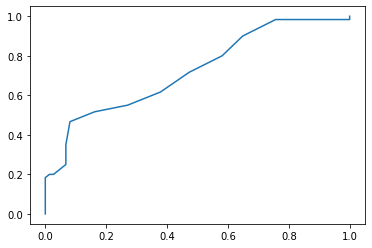

neighbours = 100 err_train = 0.5 err_test = 0.44029850746268656
[[74  0]
 [59  1]]
Mera F1 Train: 0.03278688524590164
Precision Score Train:  0.5597014925373134
Recall Score Train:  0.5597014925373134


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [534]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[4][i]=err_test
    Knn_train[4][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [535]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[4][i]= err_test
    SVC_train_RBF[4][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.2785714285714286 err_test_SVC_rbf = 0.23134328358208955
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.5522388059701493


## Linear

In [536]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[4]= err_test
SVC_train_Lin[4]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.417910447761194


## Poly

In [537]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[4][i-2]=err_test
    SVC_train_Poly[4][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.24642857142857144 err_test_SVC_Poly = 0.26119402985074625
degree = 3 err_train_SVC_Poly = 0.2357142857142857 err_test_SVC_Poly = 0.23880597014925373
degree = 4 err_train_SVC_Poly = 0.20714285714285716 err_test_SVC_Poly = 0.2462686567164179


# Controlled under-sampling techniques

# RandomUnderSampler

In [538]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 140), (1, 140)]


## Knn

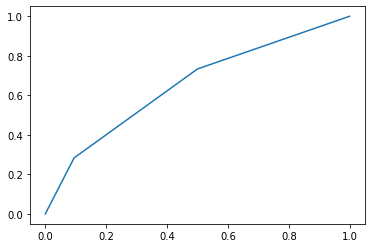

neighbours = 2 err_train = 0.24642857142857144 err_test = 0.373134328358209
[[67  7]
 [43 17]]
Mera F1 Train: 0.40476190476190477
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


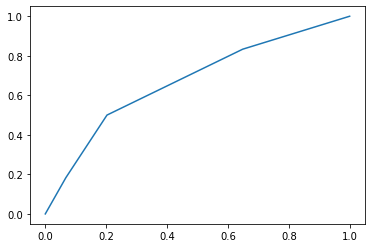

neighbours = 3 err_train = 0.19642857142857142 err_test = 0.3358208955223881
[[59 15]
 [30 30]]
Mera F1 Train: 0.5714285714285715
Precision Score Train:  0.664179104477612
Recall Score Train:  0.664179104477612


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


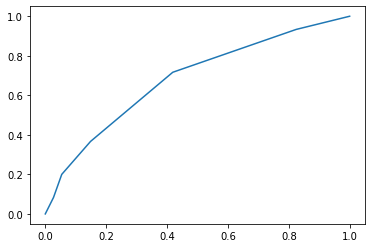

neighbours = 5 err_train = 0.2714285714285714 err_test = 0.3656716417910448
[[63 11]
 [38 22]]
Mera F1 Train: 0.47311827956989244
Precision Score Train:  0.6343283582089553
Recall Score Train:  0.6343283582089553


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


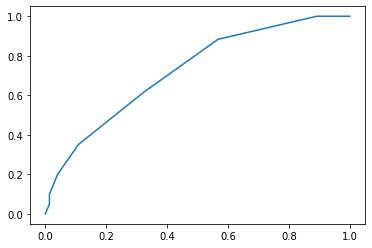

neighbours = 7 err_train = 0.30714285714285716 err_test = 0.35074626865671643
[[66  8]
 [39 21]]
Mera F1 Train: 0.4719101123595506
Precision Score Train:  0.6492537313432836
Recall Score Train:  0.6492537313432836


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


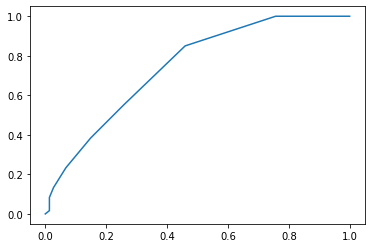

neighbours = 10 err_train = 0.3607142857142857 err_test = 0.3805970149253731
[[69  5]
 [46 14]]
Mera F1 Train: 0.35443037974683544
Precision Score Train:  0.6194029850746269
Recall Score Train:  0.6194029850746269


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


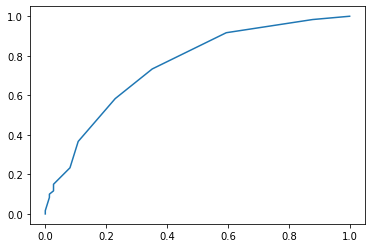

neighbours = 15 err_train = 0.3535714285714286 err_test = 0.3880597014925373
[[68  6]
 [46 14]]
Mera F1 Train: 0.35
Precision Score Train:  0.6119402985074627
Recall Score Train:  0.6119402985074627


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


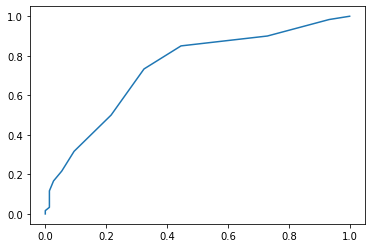

neighbours = 20 err_train = 0.3964285714285714 err_test = 0.3880597014925373
[[72  2]
 [50 10]]
Mera F1 Train: 0.2777777777777778
Precision Score Train:  0.6119402985074627
Recall Score Train:  0.6119402985074627


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


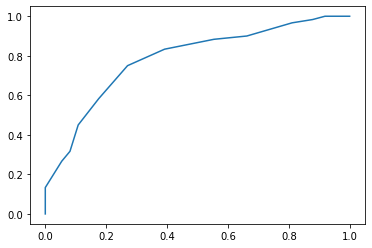

neighbours = 50 err_train = 0.4714285714285714 err_test = 0.41044776119402987
[[74  0]
 [55  5]]
Mera F1 Train: 0.15384615384615385
Precision Score Train:  0.5895522388059702
Recall Score Train:  0.5895522388059702


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


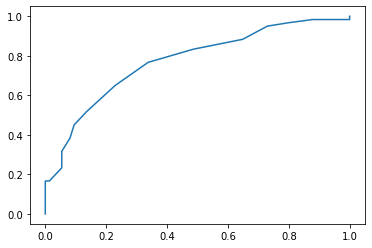

neighbours = 100 err_train = 0.5 err_test = 0.44776119402985076
[[74  0]
 [60  0]]
Mera F1 Train: 0.0
Precision Score Train:  0.5522388059701493
Recall Score Train:  0.5522388059701493


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [539]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[5][i]=err_test
    Knn_train[5][i]=err_train
    #for j in range (6):
    #    print("threshold = ",tresholds_array[j])
    #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
    #    plt.plot(fpr,tpr,label="ROC")
    #    plt.show()
    #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [540]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[5][i]= err_test
    SVC_train_RBF[5][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.2785714285714286 err_test_SVC_rbf = 0.23134328358208955
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.5522388059701493


## Linear

In [541]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[5]= err_test
SVC_train_Lin[5]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.3805970149253731


## Poly

In [542]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[5][i-2]=err_test
    SVC_train_Poly[5][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.275 err_test_SVC_Poly = 0.23134328358208955
degree = 3 err_train_SVC_Poly = 0.225 err_test_SVC_Poly = 0.208955223880597
degree = 4 err_train_SVC_Poly = 0.19285714285714287 err_test_SVC_Poly = 0.21641791044776118


# NearMiss

In [543]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1)
X_resampled_nm1, y_resampled = nm1.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 140), (1, 140)]


## Knn

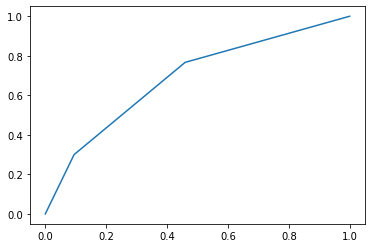

neighbours = 2 err_train = 0.25357142857142856 err_test = 0.3656716417910448
[[67  7]
 [42 18]]
Mera F1 Train: 0.4235294117647059
Precision Score Train:  0.6343283582089553
Recall Score Train:  0.6343283582089553


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


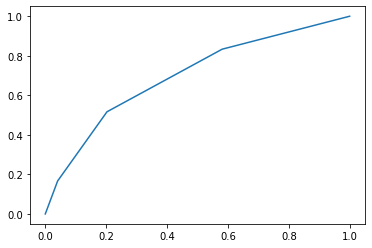

neighbours = 3 err_train = 0.19285714285714287 err_test = 0.3283582089552239
[[59 15]
 [29 31]]
Mera F1 Train: 0.5849056603773585
Precision Score Train:  0.6716417910447762
Recall Score Train:  0.6716417910447762


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


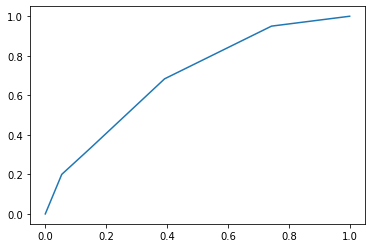

neighbours = 5 err_train = 0.26071428571428573 err_test = 0.3805970149253731
[[63 11]
 [40 20]]
Mera F1 Train: 0.4395604395604395
Precision Score Train:  0.6194029850746269
Recall Score Train:  0.6194029850746269


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


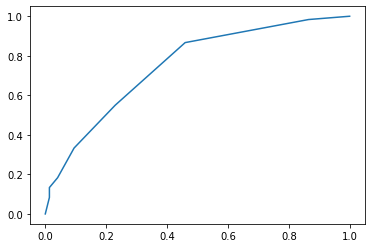

neighbours = 7 err_train = 0.3 err_test = 0.35074626865671643
[[67  7]
 [40 20]]
Mera F1 Train: 0.4597701149425288
Precision Score Train:  0.6492537313432836
Recall Score Train:  0.6492537313432836


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


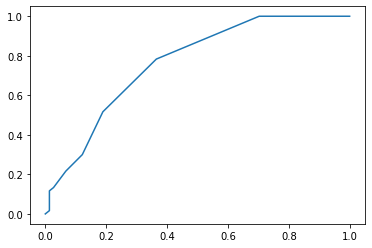

neighbours = 10 err_train = 0.3678571428571429 err_test = 0.3880597014925373
[[69  5]
 [47 13]]
Mera F1 Train: 0.3333333333333333
Precision Score Train:  0.6119402985074627
Recall Score Train:  0.6119402985074627


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


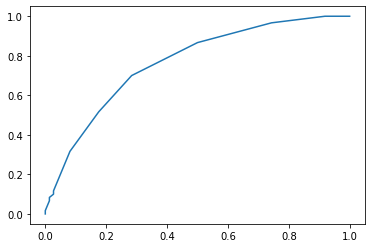

neighbours = 15 err_train = 0.3678571428571429 err_test = 0.3805970149253731
[[70  4]
 [47 13]]
Mera F1 Train: 0.33766233766233766
Precision Score Train:  0.6194029850746269
Recall Score Train:  0.6194029850746269


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


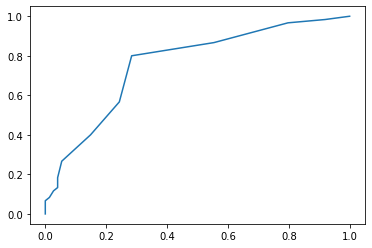

neighbours = 20 err_train = 0.39285714285714285 err_test = 0.41044776119402987
[[71  3]
 [52  8]]
Mera F1 Train: 0.22535211267605634
Precision Score Train:  0.5895522388059702
Recall Score Train:  0.5895522388059702


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


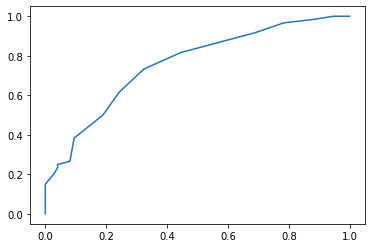

neighbours = 50 err_train = 0.46785714285714286 err_test = 0.41044776119402987
[[74  0]
 [55  5]]
Mera F1 Train: 0.15384615384615385
Precision Score Train:  0.5895522388059702
Recall Score Train:  0.5895522388059702


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


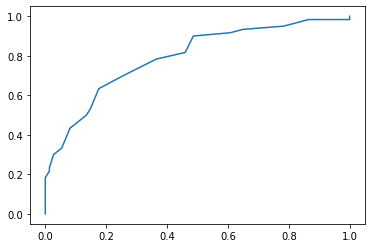

neighbours = 100 err_train = 0.5 err_test = 0.44029850746268656
[[74  0]
 [59  1]]
Mera F1 Train: 0.03278688524590164
Precision Score Train:  0.5597014925373134
Recall Score Train:  0.5597014925373134


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [544]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled_nm1, y_resampled)
    
    y_train_predict = knn.predict(X_resampled_nm1)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[6][i]=err_test
    Knn_train[6][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [545]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled_nm1, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled_nm1))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[6][i]= err_test
    SVC_train_RBF[6][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.25 err_test_SVC_rbf = 0.208955223880597
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.5522388059701493


## Linear

In [546]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled_nm1, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled_nm1))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[6]= err_test
SVC_train_Lin[6]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.3283582089552239


## Poly

In [547]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled_nm1, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled_nm1))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[6][i-2]=err_test
    SVC_train_Poly[6][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.2892857142857143 err_test_SVC_Poly = 0.208955223880597
degree = 3 err_train_SVC_Poly = 0.22142857142857142 err_test_SVC_Poly = 0.20149253731343283
degree = 4 err_train_SVC_Poly = 0.19285714285714287 err_test_SVC_Poly = 0.23880597014925373


# Edited data set using nearest neighbours

# EditedNearestNeighbours

In [548]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 62), (1, 140)]


## Knn

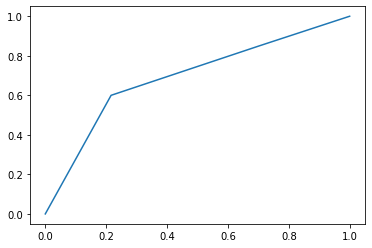

neighbours = 2 err_train = 0.18316831683168316 err_test = 0.29850746268656714
[[58 16]
 [24 36]]
Mera F1 Train: 0.6428571428571429
Precision Score Train:  0.7014925373134329
Recall Score Train:  0.7014925373134329


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


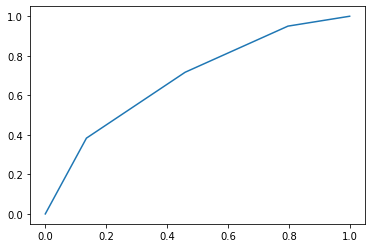

neighbours = 3 err_train = 0.10891089108910891 err_test = 0.3805970149253731
[[40 34]
 [17 43]]
Mera F1 Train: 0.6277372262773723
Precision Score Train:  0.6194029850746269
Recall Score Train:  0.6194029850746269


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


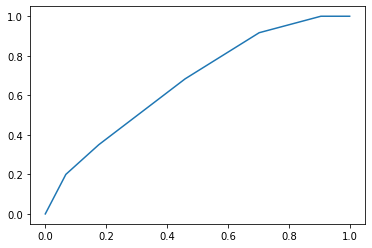

neighbours = 5 err_train = 0.1485148514851485 err_test = 0.39552238805970147
[[40 34]
 [19 41]]
Mera F1 Train: 0.6074074074074074
Precision Score Train:  0.6044776119402985
Recall Score Train:  0.6044776119402985


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


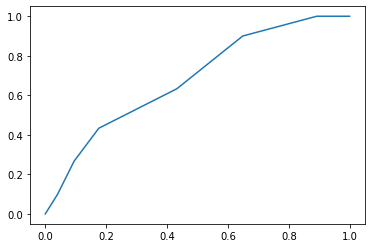

neighbours = 7 err_train = 0.16831683168316833 err_test = 0.40298507462686567
[[42 32]
 [22 38]]
Mera F1 Train: 0.5846153846153846
Precision Score Train:  0.5970149253731343


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Recall Score Train:  0.5970149253731343


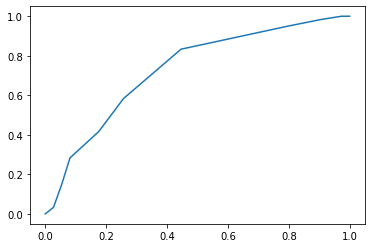

neighbours = 10 err_train = 0.24257425742574257 err_test = 0.3283582089552239
[[55 19]
 [25 35]]
Mera F1 Train: 0.6140350877192983
Precision Score Train:  0.6716417910447762
Recall Score Train:  0.6716417910447762


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


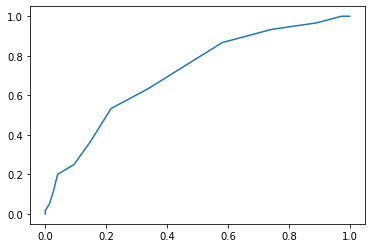

neighbours = 15 err_train = 0.24257425742574257 err_test = 0.35074626865671643
[[49 25]
 [22 38]]
Mera F1 Train: 0.6178861788617885
Precision Score Train:  0.6492537313432836
Recall Score Train:  0.6492537313432836


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


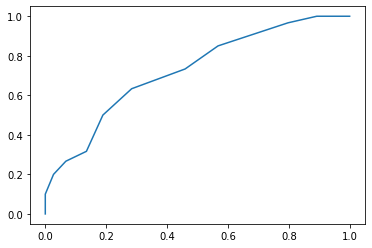

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 20 err_train = 0.2871287128712871 err_test = 0.3208955223880597
[[53 21]
 [22 38]]
Mera F1 Train: 0.6386554621848739
Precision Score Train:  0.6791044776119403
Recall Score Train:  0.6791044776119403


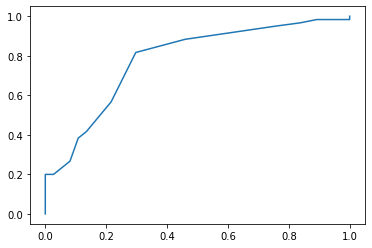

neighbours = 50 err_train = 0.24752475247524752 err_test = 0.2462686567164179
[[52 22]
 [11 49]]
Mera F1 Train: 0.748091603053435
Precision Score Train:  0.753731343283582
Recall Score Train:  0.753731343283582


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


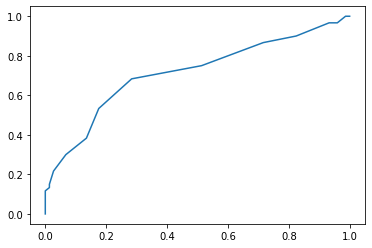

neighbours = 100 err_train = 0.30198019801980197 err_test = 0.5447761194029851
[[ 1 73]
 [ 0 60]]
Mera F1 Train: 0.6217616580310881
Precision Score Train:  0.4552238805970149
Recall Score Train:  0.4552238805970149


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [549]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[7][i]=err_test
    Knn_train[7][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [550]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[7][i]= err_test
    SVC_train_RBF[7][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.3069306930693069 err_test_SVC_rbf = 0.5522388059701493
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.5522388059701493


## Linear

In [551]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[7]= err_test
SVC_train_Lin[7]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.373134328358209


## Poly

In [552]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[7][i-2]=err_test
    SVC_train_Poly[7][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.30198019801980197 err_test_SVC_Poly = 0.5522388059701493
degree = 3 err_train_SVC_Poly = 0.297029702970297 err_test_SVC_Poly = 0.5447761194029851
degree = 4 err_train_SVC_Poly = 0.2871287128712871 err_test_SVC_Poly = 0.5447761194029851


# RepeatedEditedNearestNeighbours

In [553]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
renn = RepeatedEditedNearestNeighbours()
X_resampled, y_resampled = renn.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 62), (1, 140)]


## Knn

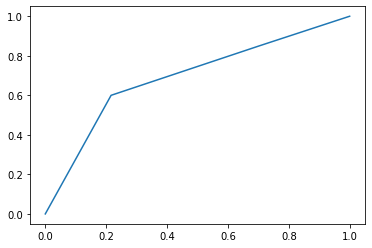

neighbours = 2 err_train = 0.18316831683168316 err_test = 0.29850746268656714
[[58 16]
 [24 36]]
Mera F1 Train: 0.6428571428571429
Precision Score Train:  0.7014925373134329
Recall Score Train:  0.7014925373134329


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


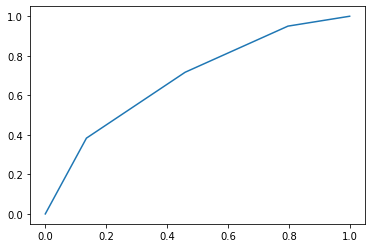

neighbours = 3 err_train = 0.10891089108910891 err_test = 0.3805970149253731
[[40 34]
 [17 43]]
Mera F1 Train: 0.6277372262773723
Precision Score Train:  0.6194029850746269
Recall Score Train:  0.6194029850746269


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


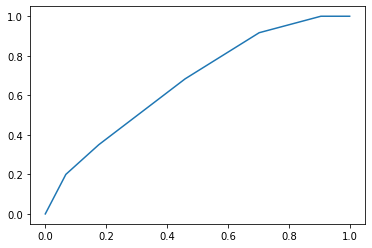

neighbours = 5 err_train = 0.1485148514851485 err_test = 0.39552238805970147
[[40 34]
 [19 41]]
Mera F1 Train: 0.6074074074074074
Precision Score Train:  0.6044776119402985
Recall Score Train:  0.6044776119402985


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


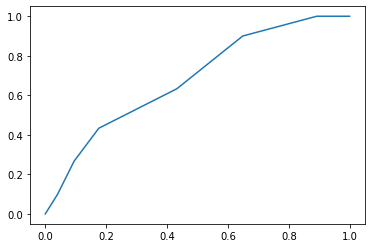

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 7 err_train = 0.16831683168316833 err_test = 0.40298507462686567
[[42 32]
 [22 38]]
Mera F1 Train: 0.5846153846153846
Precision Score Train:  0.5970149253731343
Recall Score Train:  0.5970149253731343


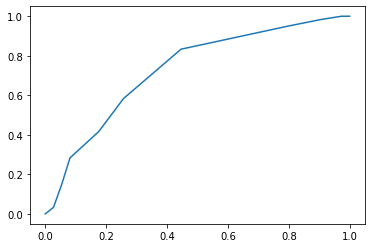

neighbours = 10 err_train = 0.24257425742574257 err_test = 0.3283582089552239
[[55 19]
 [25 35]]

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)



Mera F1 Train: 0.6140350877192983
Precision Score Train:  0.6716417910447762
Recall Score Train:  0.6716417910447762


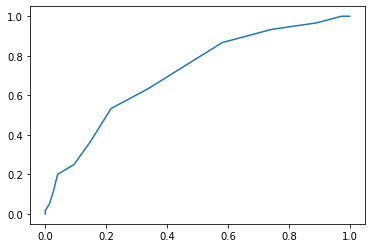

neighbours = 15 err_train = 0.24257425742574257 err_test = 0.35074626865671643
[[49 25]
 [22 38]]
Mera F1 Train: 0.6178861788617885
Precision Score Train:  0.6492537313432836
Recall Score Train:  0.6492537313432836


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


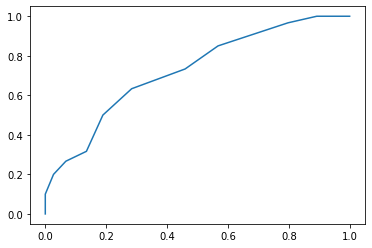

neighbours = 20 err_train = 0.2871287128712871 err_test = 0.3208955223880597
[[53 21]
 [22 38]]
Mera F1 Train: 0.6386554621848739
Precision Score Train:  0.6791044776119403
Recall Score Train:  0.6791044776119403


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


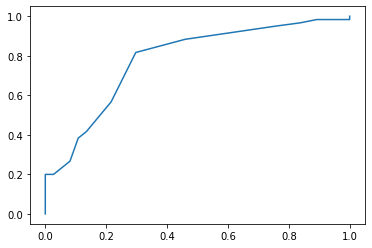

neighbours = 50 err_train = 0.24752475247524752 err_test = 0.2462686567164179
[[52 22]
 [11 49]]
Mera F1 Train: 0.748091603053435
Precision Score Train:  0.753731343283582
Recall Score Train:  0.753731343283582


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


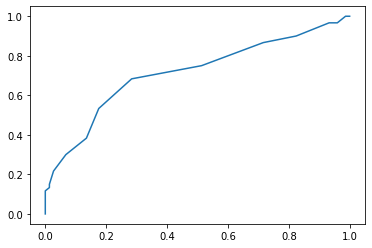

neighbours = 100 err_train = 0.30198019801980197 err_test = 0.5447761194029851
[[ 1 73]
 [ 0 60]]
Mera F1 Train: 0.6217616580310881
Precision Score Train:  0.4552238805970149
Recall Score Train:  0.4552238805970149


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [554]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[8][i]=err_test
    Knn_train[8][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [555]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[8][i]= err_test
    SVC_train_RBF[8][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.3069306930693069 err_test_SVC_rbf = 0.5522388059701493
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.5522388059701493


## Linear

In [556]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[8]= err_test
SVC_train_Lin[8]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.373134328358209


## Poly

In [557]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[8][i-2]=err_test
    SVC_train_Poly[8][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.30198019801980197 err_test_SVC_Poly = 0.5522388059701493
degree = 3 err_train_SVC_Poly = 0.297029702970297 err_test_SVC_Poly = 0.5447761194029851
degree = 4 err_train_SVC_Poly = 0.2871287128712871 err_test_SVC_Poly = 0.5447761194029851


# AllKNN

In [558]:
from imblearn.under_sampling import AllKNN
allknn = AllKNN()
X_resampled, y_resampled = allknn.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 128), (1, 140)]


## Knn

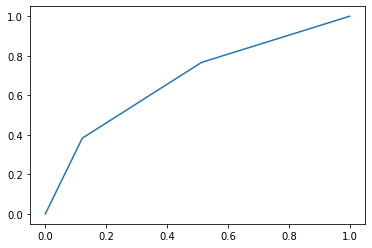

neighbours = 2 err_train = 0.2462686567164179 err_test = 0.34328358208955223
[[65  9]
 [37 23]]
Mera F1 Train: 0.5
Precision Score Train:  0.6567164179104478
Recall Score Train:  0.6567164179104478


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


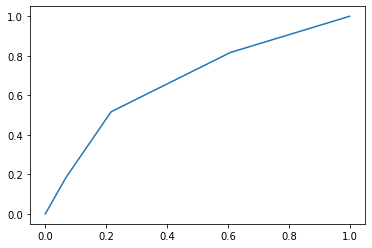

neighbours = 3 err_train = 0.1455223880597015 err_test = 0.3358208955223881
[[58 16]
 [29 31]]
Mera F1 Train: 0.5794392523364487
Precision Score Train:  0.664179104477612
Recall Score Train:  0.664179104477612


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


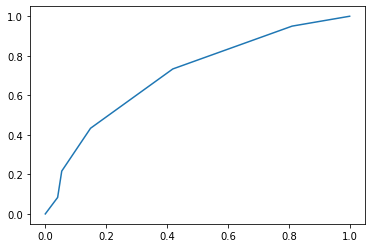

neighbours = 5 err_train = 0.23507462686567165 err_test = 0.3358208955223881
[[63 11]
 [34 26]]
Mera F1 Train: 0.5360824742268041
Precision Score Train:  0.664179104477612
Recall Score Train:  0.664179104477612


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


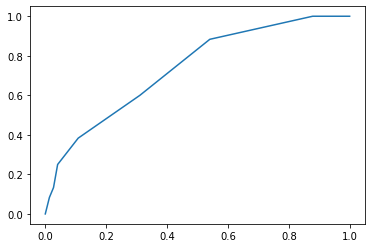

neighbours = 7 err_train = 0.2947761194029851 err_test = 0.3358208955223881
[[66  8]
 [37 23]]
Mera F1 Train: 0.5054945054945055
Precision Score Train:  0.664179104477612
Recall Score Train:  0.664179104477612


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


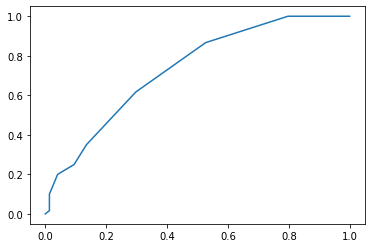

neighbours = 10 err_train = 0.332089552238806 err_test = 0.3880597014925373
[[67  7]
 [45 15]]
Mera F1 Train: 0.36585365853658536
Precision Score Train:  0.6119402985074627
Recall Score Train:  0.6119402985074627


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


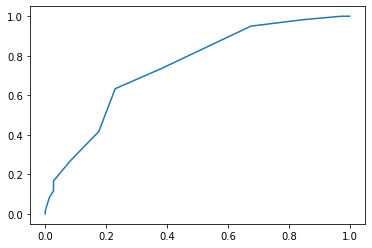

neighbours = 15 err_train = 0.34701492537313433 err_test = 0.373134328358209
[[68  6]
 [44 16]]
Mera F1 Train: 0.3902439024390244
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


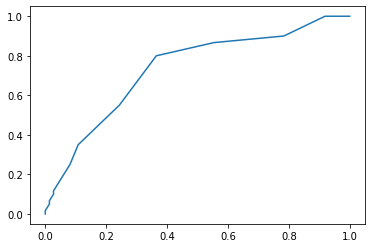

neighbours = 20 err_train = 0.373134328358209 err_test = 0.39552238805970147
[[70  4]
 [49 11]]
Mera F1 Train: 0.2933333333333333
Precision Score Train:  0.6044776119402985
Recall Score Train:  0.6044776119402985


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


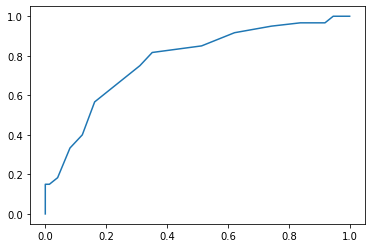

neighbours = 50 err_train = 0.48134328358208955 err_test = 0.40298507462686567
[[74  0]
 [54  6]]
Mera F1 Train: 0.18181818181818182
Precision Score Train:  0.5970149253731343
Recall Score Train:  0.5970149253731343


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


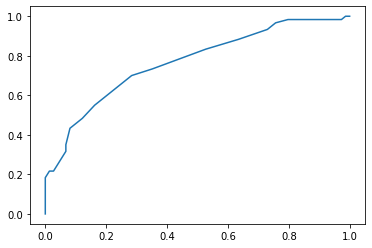

neighbours = 100 err_train = 0.5223880597014925 err_test = 0.43283582089552236
[[74  0]
 [58  2]]
Mera F1 Train: 0.06451612903225806
Precision Score Train:  0.5671641791044776
Recall Score Train:  0.5671641791044776


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [559]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[9][i]=err_test
    Knn_train[9][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [560]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[9][i]= err_test
    SVC_train_RBF[9][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.2798507462686567 err_test_SVC_rbf = 0.22388059701492538
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.5522388059701493


## Linear

In [561]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[9]= err_test
SVC_train_Lin[9]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.3582089552238806


## Poly

In [562]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[9][i-2]=err_test
    SVC_train_Poly[9][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.23880597014925373 err_test_SVC_Poly = 0.26865671641791045
degree = 3 err_train_SVC_Poly = 0.208955223880597 err_test_SVC_Poly = 0.2462686567164179
degree = 4 err_train_SVC_Poly = 0.19776119402985073 err_test_SVC_Poly = 0.2462686567164179


# Condensed nearest neighbors and derived algorithms

# CondensedNearestNeighbour

In [563]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(random_state=0)
X_resampled, y_resampled = cnn.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 75), (1, 140)]


## Knn

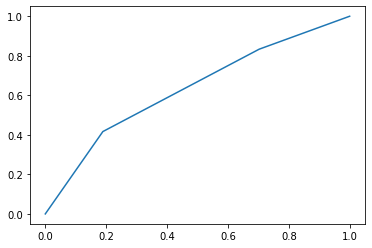

neighbours = 2 err_train = 0.2651162790697674 err_test = 0.3656716417910448
[[60 14]
 [35 25]]
Mera F1 Train: 0.5050505050505051
Precision Score Train:  0.6343283582089553
Recall Score Train:  0.6343283582089553


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


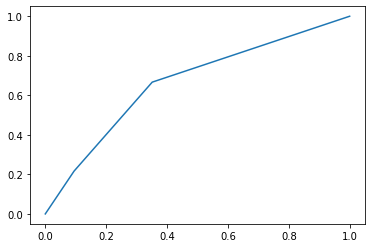

neighbours = 3 err_train = 0.20930232558139536 err_test = 0.34328358208955223
[[48 26]
 [20 40]]
Mera F1 Train: 0.6349206349206349
Precision Score Train:  0.6567164179104478
Recall Score Train:  0.6567164179104478


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


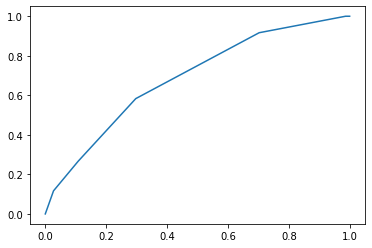

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 5 err_train = 0.28837209302325584 err_test = 0.35074626865671643
[[52 22]
 [25 35]]
Mera F1 Train: 0.5982905982905983
Precision Score Train:  0.6492537313432836
Recall Score Train:  0.6492537313432836


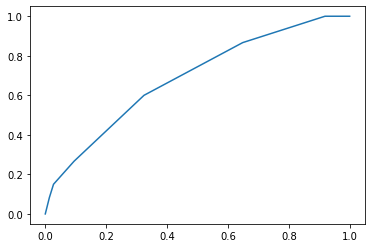

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 7 err_train = 0.3302325581395349 err_test = 0.3582089552238806
[[50 24]
 [24 36]]
Mera F1 Train: 0.6
Precision Score Train:  0.6417910447761194
Recall Score Train:  0.6417910447761194


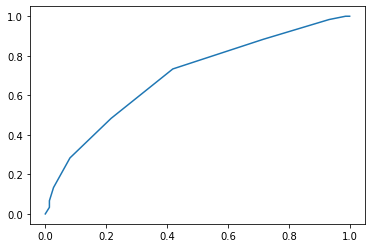

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 10 err_train = 0.3627906976744186 err_test = 0.35074626865671643
[[58 16]
 [31 29]]
Mera F1 Train: 0.5523809523809524
Precision Score Train:  0.6492537313432836
Recall Score Train:  0.6492537313432836


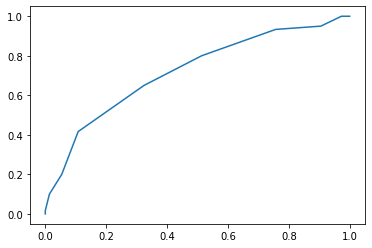

neighbours = 15 err_train = 0.35348837209302325 err_test = 0.3358208955223881
[[50 24]
 [21 39]]
Mera F1 Train: 0.6341463414634146


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Precision Score Train:  0.664179104477612
Recall Score Train:  0.664179104477612


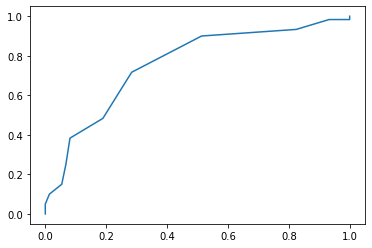

neighbours = 20 err_train = 0.40930232558139534 err_test = 0.3358208955223881
[[60 14]
 [31 29]]
Mera F1 Train: 0.5631067961165049
Precision Score Train:  0.664179104477612
Recall Score Train:  0.664179104477612


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


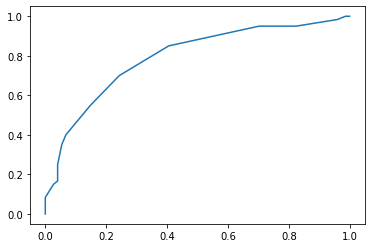

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 50 err_train = 0.3488372093023256 err_test = 0.2835820895522388
[[63 11]
 [27 33]]
Mera F1 Train: 0.6346153846153847
Precision Score Train:  0.7164179104477612
Recall Score Train:  0.7164179104477612


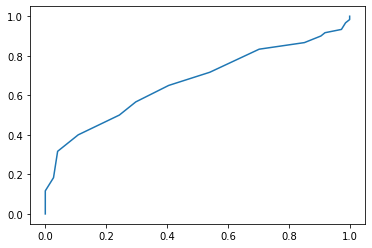

neighbours = 100 err_train = 0.3581395348837209 err_test = 0.4626865671641791
[[22 52]
 [10 50]]
Mera F1 Train: 0.6172839506172839
Precision Score Train:  0.5373134328358209
Recall Score Train:  0.5373134328358209


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [564]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[10][i]=err_test
    Knn_train[10][i]=err_train
    #for j in range (6):
    #    print("threshold = ",tresholds_array[j])
    #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
    #    plt.plot(fpr,tpr,label="ROC")
    #    plt.show()
    #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [565]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[10][i]= err_test
    SVC_train_RBF[10][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.3488372093023256 err_test_SVC_rbf = 0.5522388059701493
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.5522388059701493


## Linear

In [566]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[10]= err_test
SVC_train_Lin[10]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.3880597014925373


## Poly

In [567]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[10][i-2]=err_test
    SVC_train_Poly[10][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.34418604651162793 err_test_SVC_Poly = 0.5522388059701493
degree = 3 err_train_SVC_Poly = 0.33488372093023255 err_test_SVC_Poly = 0.5522388059701493
degree = 4 err_train_SVC_Poly = 0.29767441860465116 err_test_SVC_Poly = 0.5373134328358209


# OneSidedSelection

In [568]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=0)
X_resampled, y_resampled = oss.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 145), (1, 140)]


## Knn

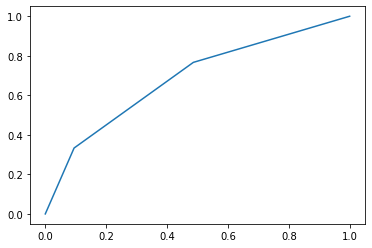

neighbours = 2 err_train = 0.23859649122807017 err_test = 0.35074626865671643
[[67  7]
 [40 20]]
Mera F1 Train: 0.4597701149425288
Precision Score Train:  0.6492537313432836
Recall Score Train:  0.6492537313432836


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


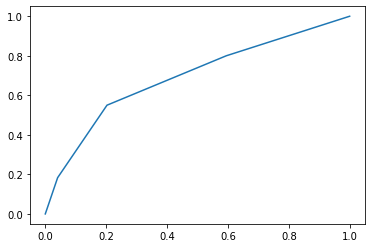

neighbours = 3 err_train = 0.1824561403508772 err_test = 0.31343283582089554
[[59 15]
 [27 33]]
Mera F1 Train: 0.6111111111111112
Precision Score Train:  0.6865671641791045
Recall Score Train:  0.6865671641791045


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


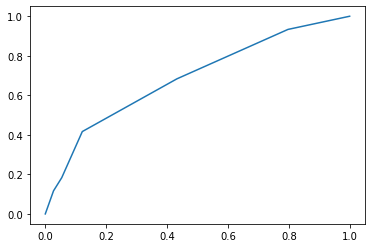

neighbours = 5 err_train = 0.2596491228070175 err_test = 0.3283582089552239
[[65  9]
 [35 25]]
Mera F1 Train: 0.5319148936170213
Precision Score Train:  0.6716417910447762
Recall Score Train:  0.6716417910447762


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


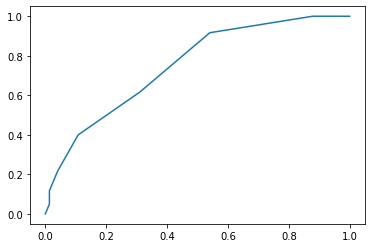

neighbours = 7 err_train = 0.2982456140350877 err_test = 0.3283582089552239
[[66  8]
 [36 24]]
Mera F1 Train: 0.5217391304347827
Precision Score Train:  0.6716417910447762
Recall Score Train:  0.6716417910447762


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


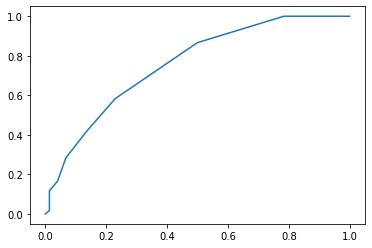

neighbours = 10 err_train = 0.3333333333333333 err_test = 0.3582089552238806
[[69  5]
 [43 17]]
Mera F1 Train: 0.4146341463414634
Precision Score Train:  0.6417910447761194
Recall Score Train:  0.6417910447761194


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


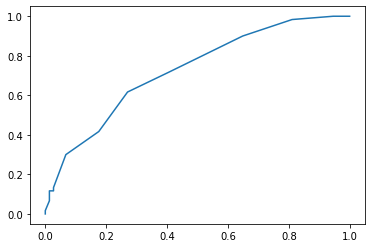

neighbours = 15 err_train = 0.3368421052631579 err_test = 0.35074626865671643
[[69  5]
 [42 18]]
Mera F1 Train: 0.43373493975903615
Precision Score Train:  0.6492537313432836
Recall Score Train:  0.6492537313432836


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


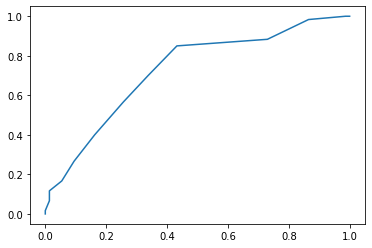

neighbours = 20 err_train = 0.3684210526315789 err_test = 0.40298507462686567
[[70  4]
 [50 10]]
Mera F1 Train: 0.2702702702702703
Precision Score Train:  0.5970149253731343
Recall Score Train:  0.5970149253731343


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


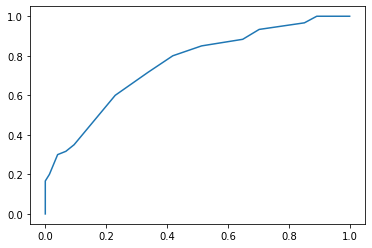

neighbours = 50 err_train = 0.45614035087719296 err_test = 0.39552238805970147
[[74  0]
 [53  7]]
Mera F1 Train: 0.208955223880597
Precision Score Train:  0.6044776119402985
Recall Score Train:  0.6044776119402985


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


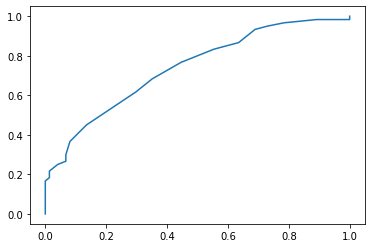

neighbours = 100 err_train = 0.49122807017543857 err_test = 0.44029850746268656
[[74  0]
 [59  1]]
Mera F1 Train: 0.03278688524590164
Precision Score Train:  0.5597014925373134
Recall Score Train:  0.5597014925373134


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [569]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[11][i]=err_test
    Knn_train[11][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [570]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[11][i]= err_test
    SVC_train_RBF[11][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.27017543859649124 err_test_SVC_rbf = 0.20149253731343283
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.44776119402985076


## Linear

In [571]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[11]= err_test
SVC_train_Lin[11]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.40298507462686567


## Poly

In [572]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[11][i-2]=err_test
    SVC_train_Poly[11][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.23859649122807017 err_test_SVC_Poly = 0.23134328358208955
degree = 3 err_train_SVC_Poly = 0.23157894736842105 err_test_SVC_Poly = 0.21641791044776118
degree = 4 err_train_SVC_Poly = 0.19649122807017544 err_test_SVC_Poly = 0.22388059701492538


# NeighbourhoodCleaningRule

In [573]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule()
X_resampled, y_resampled = ncr.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 53), (1, 140)]


## Knn

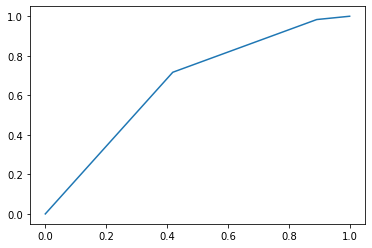

neighbours = 2 err_train = 0.046632124352331605 err_test = 0.3582089552238806
[[43 31]
 [17 43]]
Mera F1 Train: 0.6417910447761194
Precision Score Train:  0.6417910447761194
Recall Score Train:  0.6417910447761194


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


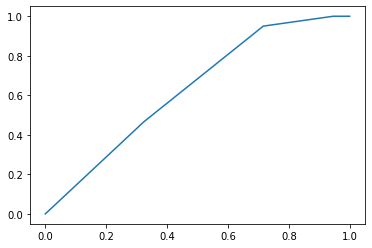

neighbours = 3 err_train = 0.12435233160621761 err_test = 0.417910447761194
[[21 53]
 [ 3 57]]
Mera F1 Train: 0.6705882352941176
Precision Score Train:  0.582089552238806
Recall Score Train:  0.582089552238806


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


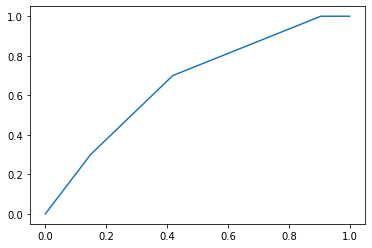

neighbours = 5 err_train = 0.13989637305699482 err_test = 0.4552238805970149
[[19 55]
 [ 6 54]]
Mera F1 Train: 0.6390532544378699
Precision Score Train:  0.5447761194029851
Recall Score Train:  0.5447761194029851


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


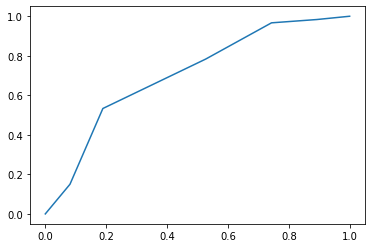

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 7 err_train = 0.16580310880829016 err_test = 0.4253731343283582
[[19 55]
 [ 2 58]]
Mera F1 Train: 0.6705202312138728
Precision Score Train:  0.5746268656716418
Recall Score Train:  0.5746268656716418


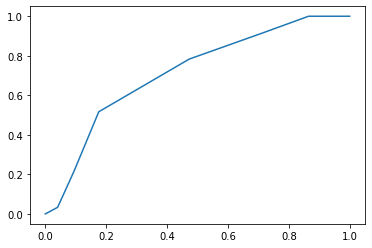

neighbours = 10 err_train = 0.17098445595854922 err_test = 0.43283582089552236
[[21 53]
 [ 5 55]]
Mera F1 Train: 0.6547619047619048
Precision Score Train:  0.5671641791044776
Recall Score Train:  0.5671641791044776


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


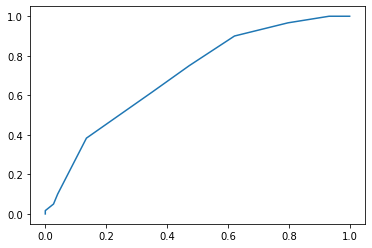

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 15 err_train = 0.20207253886010362 err_test = 0.4552238805970149
[[15 59]
 [ 2 58]]
Mera F1 Train: 0.655367231638418
Precision Score Train:  0.5447761194029851
Recall Score Train:  0.5447761194029851


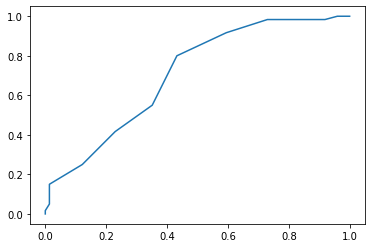

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 20 err_train = 0.18652849740932642 err_test = 0.41044776119402987
[[20 54]
 [ 1 59]]
Mera F1 Train: 0.6820809248554913
Precision Score Train:  0.5895522388059702
Recall Score Train:  0.5895522388059702


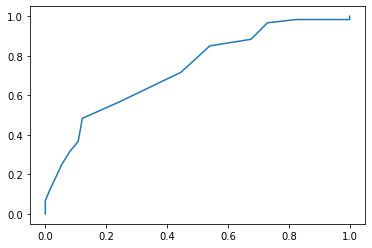

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 50 err_train = 0.2538860103626943 err_test = 0.4925373134328358
[[ 9 65]
 [ 1 59]]
Mera F1 Train: 0.641304347826087
Precision Score Train:  0.5074626865671642
Recall Score Train:  0.5074626865671642


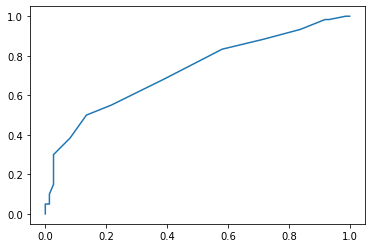

neighbours = 100 err_train = 0.27461139896373055 err_test = 0.5522388059701493
[[ 0 74]
 [ 0 60]]
Mera F1 Train: 0.6185567010309279
Precision Score Train:  0.44776119402985076
Recall Score Train:  0.44776119402985076


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [574]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[12][i]=err_test
    Knn_train[12][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [575]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[12][i]= err_test
    SVC_train_RBF[12][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.27461139896373055 err_test_SVC_rbf = 0.5522388059701493
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.5522388059701493


## Linear

In [576]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[12]= err_test
SVC_train_Lin[12]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.40298507462686567


## Poly

In [577]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[12][i-2]=err_test
    SVC_train_Poly[12][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.2694300518134715 err_test_SVC_Poly = 0.5522388059701493
degree = 3 err_train_SVC_Poly = 0.2694300518134715 err_test_SVC_Poly = 0.5447761194029851
degree = 4 err_train_SVC_Poly = 0.23834196891191708 err_test_SVC_Poly = 0.5447761194029851


# Instance hardness threshold

In [578]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold(random_state=0,
                                estimator=LogisticRegression(
                                    solver='lbfgs', multi_class='auto'))
X_resampled, y_resampled = iht.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 140), (1, 140)]


H:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
H:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

## Knn

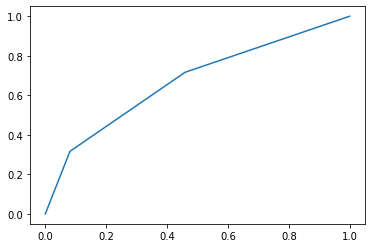

neighbours = 2 err_train = 0.25357142857142856 err_test = 0.35074626865671643
[[68  6]
 [41 19]]
Mera F1 Train: 0.4470588235294118
Precision Score Train:  0.6492537313432836
Recall Score Train:  0.6492537313432836


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


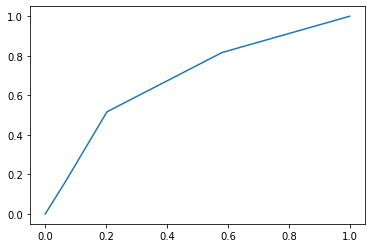

neighbours = 3 err_train = 0.18571428571428572 err_test = 0.3283582089552239
[[59 15]
 [29 31]]
Mera F1 Train: 0.5849056603773585
Precision Score Train:  0.6716417910447762
Recall Score Train:  0.6716417910447762


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


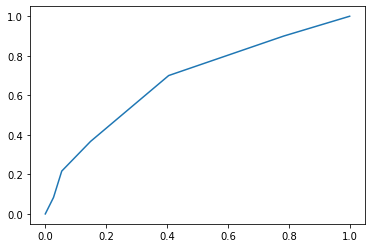

neighbours = 5 err_train = 0.25357142857142856 err_test = 0.3656716417910448
[[63 11]
 [38 22]]
Mera F1 Train: 0.47311827956989244
Precision Score Train:  0.6343283582089553
Recall Score Train:  0.6343283582089553


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


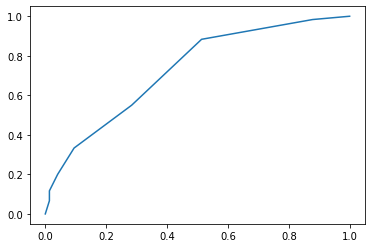

neighbours = 7 err_train = 0.28214285714285714 err_test = 0.35074626865671643
[[67  7]
 [40 20]]
Mera F1 Train: 0.4597701149425288
Precision Score Train:  0.6492537313432836
Recall Score Train:  0.6492537313432836


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


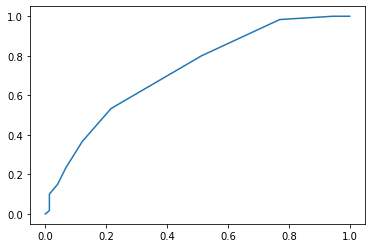

neighbours = 10 err_train = 0.35 err_test = 0.3805970149253731
[[69  5]
 [46 14]]
Mera F1 Train: 0.35443037974683544
Precision Score Train:  0.6194029850746269
Recall Score Train:  0.6194029850746269


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


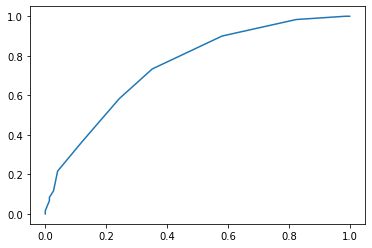

neighbours = 15 err_train = 0.3392857142857143 err_test = 0.373134328358209
[[71  3]
 [47 13]]
Mera F1 Train: 0.34210526315789475
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


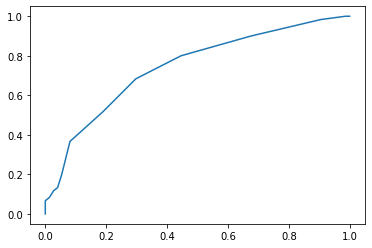

neighbours = 20 err_train = 0.3821428571428571 err_test = 0.41044776119402987
[[71  3]
 [52  8]]
Mera F1 Train: 0.22535211267605634
Precision Score Train:  0.5895522388059702
Recall Score Train:  0.5895522388059702


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


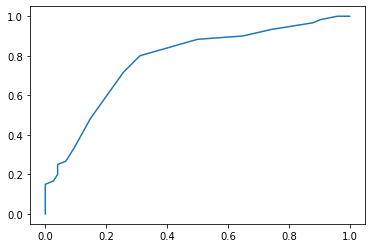

neighbours = 50 err_train = 0.4714285714285714 err_test = 0.41044776119402987
[[74  0]
 [55  5]]
Mera F1 Train: 0.15384615384615385
Precision Score Train:  0.5895522388059702
Recall Score Train:  0.5895522388059702


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


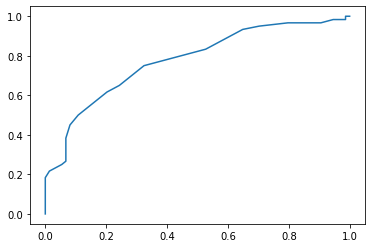

neighbours = 100 err_train = 0.5 err_test = 0.44776119402985076
[[74  0]
 [60  0]]
Mera F1 Train: 0.0
Precision Score Train:  0.5522388059701493
Recall Score Train:  0.5522388059701493


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [579]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[13][i]=err_test
    Knn_train[13][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [580]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[13][i]= err_test
    SVC_train_RBF[13][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.26785714285714285 err_test_SVC_rbf = 0.22388059701492538
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.5522388059701493


## Linear

In [581]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[13]= err_test
SVC_train_Lin[13]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.35074626865671643


## Poly

In [582]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[13][i-2]=err_test
    SVC_train_Poly[13][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.2642857142857143 err_test_SVC_Poly = 0.27611940298507465
degree = 3 err_train_SVC_Poly = 0.21785714285714286 err_test_SVC_Poly = 0.2462686567164179
degree = 4 err_train_SVC_Poly = 0.19285714285714287 err_test_SVC_Poly = 0.23134328358208955


# Combination of over- and under-sampling

# SMOTEENN

In [583]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 45), (1, 48)]


## Knn

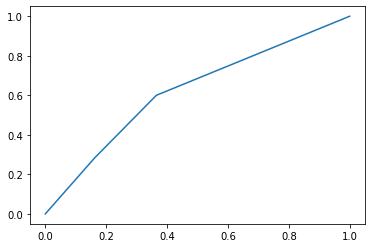

neighbours = 2 err_train = 0.053763440860215055 err_test = 0.41044776119402987
[[62 12]
 [43 17]]
Mera F1 Train: 0.38202247191011235
Precision Score Train:  0.5895522388059702
Recall Score Train:  0.5895522388059702


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


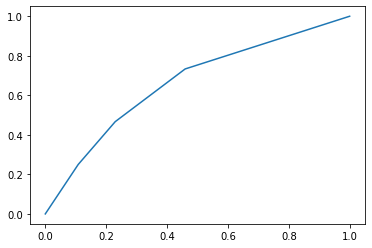

neighbours = 3 err_train = 0.043010752688172046 err_test = 0.3656716417910448
[[57 17]
 [32 28]]
Mera F1 Train: 0.5333333333333333
Precision Score Train:  0.6343283582089553
Recall Score Train:  0.6343283582089553


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


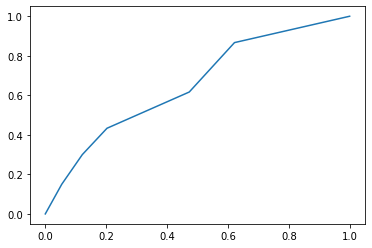

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 5 err_train = 0.043010752688172046 err_test = 0.3656716417910448
[[59 15]
 [34 26]]
Mera F1 Train: 0.514851485148515
Precision Score Train:  0.6343283582089553
Recall Score Train:  0.6343283582089553


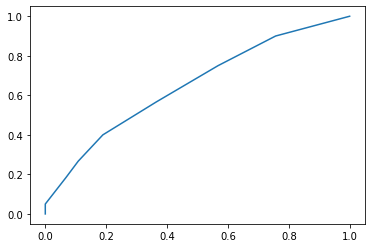

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 7 err_train = 0.0967741935483871 err_test = 0.373134328358209
[[60 14]
 [36 24]]
Mera F1 Train: 0.4897959183673469
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


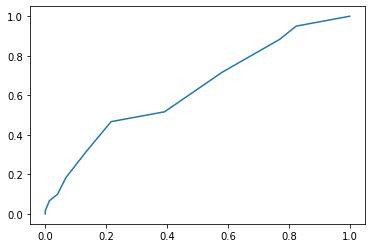

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 10 err_train = 0.17204301075268819 err_test = 0.3805970149253731
[[64 10]
 [41 19]]
Mera F1 Train: 0.42696629213483145
Precision Score Train:  0.6194029850746269
Recall Score Train:  0.6194029850746269


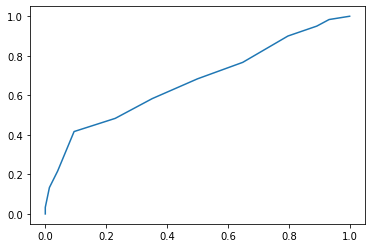

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 15 err_train = 0.21505376344086022 err_test = 0.31343283582089554
[[67  7]
 [35 25]]
Mera F1 Train: 0.5434782608695653
Precision Score Train:  0.6865671641791045
Recall Score Train:  0.6865671641791045


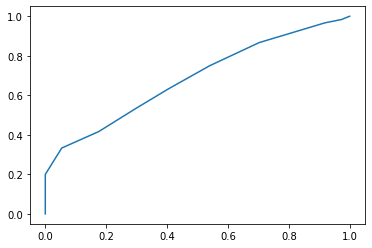

H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


neighbours = 20 err_train = 0.3118279569892473 err_test = 0.3582089552238806
[[74  0]
 [48 12]]
Mera F1 Train: 0.33333333333333337
Precision Score Train:  0.6417910447761194
Recall Score Train:  0.6417910447761194


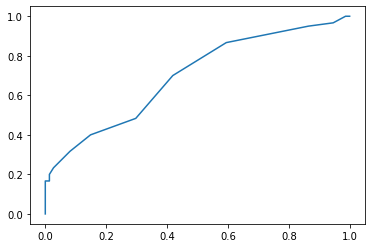

neighbours = 50 err_train = 0.4731182795698925 err_test = 0.4253731343283582
[[74  0]
 [57  3]]
Mera F1 Train: 0.09523809523809523
Precision Score Train:  0.5746268656716418
Recall Score Train:  0.5746268656716418


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [586]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[14][i]=err_test
    Knn_train[14][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [587]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[14][i]= err_test
    SVC_train_RBF[14][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.1935483870967742 err_test_SVC_rbf = 0.26865671641791045
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.5522388059701493


## Linear

In [588]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[14]= err_test
SVC_train_Lin[14]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.3358208955223881


## Poly

In [589]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[14][i-2]=err_test
    SVC_train_Poly[14][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.17204301075268819 err_test_SVC_Poly = 0.29850746268656714
degree = 3 err_train_SVC_Poly = 0.15053763440860216 err_test_SVC_Poly = 0.2537313432835821
degree = 4 err_train_SVC_Poly = 0.12903225806451613 err_test_SVC_Poly = 0.2462686567164179


# SMOTETomek

In [590]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 162), (1, 162)]


## Knn

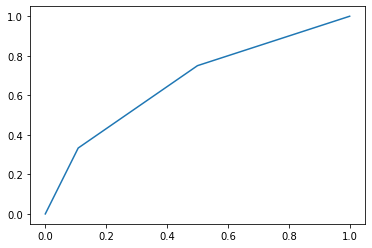

neighbours = 2 err_train = 0.12345679012345678 err_test = 0.3582089552238806
[[66  8]
 [40 20]]
Mera F1 Train: 0.4545454545454545
Precision Score Train:  0.6417910447761194
Recall Score Train:  0.6417910447761194


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


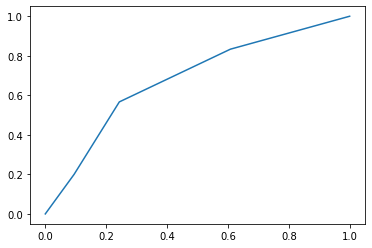

neighbours = 3 err_train = 0.12962962962962962 err_test = 0.3283582089552239
[[56 18]
 [26 34]]
Mera F1 Train: 0.6071428571428571
Precision Score Train:  0.6716417910447762
Recall Score Train:  0.6716417910447762


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


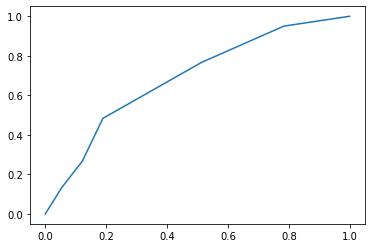

neighbours = 5 err_train = 0.18518518518518517 err_test = 0.3358208955223881
[[60 14]
 [31 29]]
Mera F1 Train: 0.5631067961165049
Precision Score Train:  0.664179104477612
Recall Score Train:  0.664179104477612


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


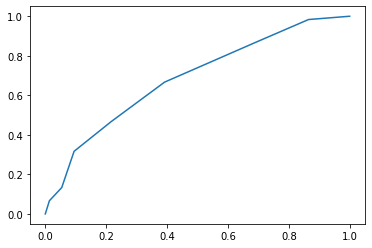

neighbours = 7 err_train = 0.2222222222222222 err_test = 0.3582089552238806
[[58 16]
 [32 28]]
Mera F1 Train: 0.5384615384615385
Precision Score Train:  0.6417910447761194
Recall Score Train:  0.6417910447761194


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


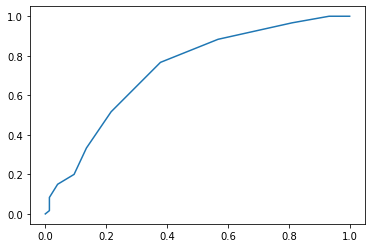

neighbours = 10 err_train = 0.30864197530864196 err_test = 0.373134328358209
[[64 10]
 [40 20]]
Mera F1 Train: 0.4444444444444444
Precision Score Train:  0.6268656716417911
Recall Score Train:  0.6268656716417911


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


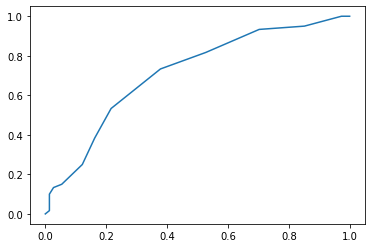

neighbours = 15 err_train = 0.2932098765432099 err_test = 0.3656716417910448
[[62 12]
 [37 23]]
Mera F1 Train: 0.4842105263157894
Precision Score Train:  0.6343283582089553
Recall Score Train:  0.6343283582089553


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


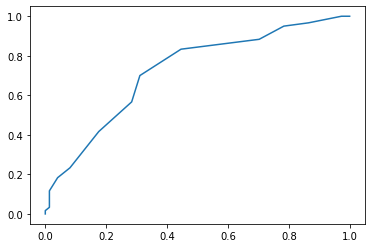

neighbours = 20 err_train = 0.3271604938271605 err_test = 0.3880597014925373
[[68  6]
 [46 14]]
Mera F1 Train: 0.35
Precision Score Train:  0.6119402985074627
Recall Score Train:  0.6119402985074627


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


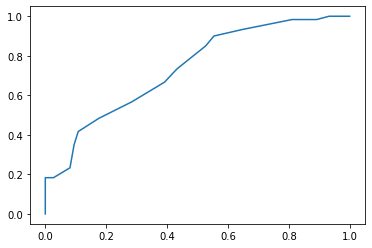

neighbours = 50 err_train = 0.4382716049382716 err_test = 0.3656716417910448
[[74  0]
 [49 11]]
Mera F1 Train: 0.30985915492957744
Precision Score Train:  0.6343283582089553
Recall Score Train:  0.6343283582089553


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


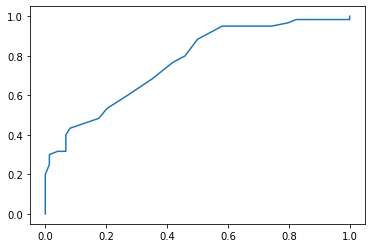

neighbours = 100 err_train = 0.47530864197530864 err_test = 0.4253731343283582
[[74  0]
 [57  3]]
Mera F1 Train: 0.09523809523809523
Precision Score Train:  0.5746268656716418
Recall Score Train:  0.5746268656716418


H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [591]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
tresholds_array = np.array([0.0,0.2,0.4,0.5,0.7,0.8])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_resampled, y_resampled)
    
    y_train_predict = knn.predict(X_resampled)
    err_train  = np.mean(y_resampled  !=  y_train_predict)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    Knn_test[15][i]=err_test
    Knn_train[15][i]=err_train
   #for j in range (6):
   #    print("threshold = ",tresholds_array[j])
   #    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1]>=tresholds_array[j])
   #    plt.plot(fpr,tpr,label="ROC")
   #    plt.show()
   #print("auto threshold")
    fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label="ROC")
    plt.show()
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_test,y_test_predict))
    print("Mera F1 Train:",f1_score(y_test,y_test_predict))
    print("Precision Score Train: ",precision_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_test, y_test_predict, pos_label='positive',average='micro'))
    i=i+1

## Support Vector Classifier

## Rbf

In [592]:
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_RBF[15][i]= err_test
    SVC_train_RBF[15][i]= err_train
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.2654320987654321 err_test_SVC_rbf = 0.21641791044776118
gamma = auto err_train_SVC_rbf = 0.0 err_test_SVC_rbf = 0.44776119402985076


## Linear

In [593]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_resampled, y_resampled)
err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
err_test = np.mean(y_test != svc_model.predict(X_test))
SVC_test_Lin[15]= err_test
SVC_train_Lin[15]= err_train
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.0 err_test_SVC_Lin = 0.3805970149253731


## Poly

In [594]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_resampled, y_resampled)
    err_train = np.mean(y_resampled != svc_model.predict(X_resampled))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    SVC_test_Poly[15][i-2]=err_test
    SVC_train_Poly[15][i-2]=err_train
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.25925925925925924 err_test_SVC_Poly = 0.23134328358208955
degree = 3 err_train_SVC_Poly = 0.2191358024691358 err_test_SVC_Poly = 0.22388059701492538
degree = 4 err_train_SVC_Poly = 0.19753086419753085 err_test_SVC_Poly = 0.23880597014925373


In [595]:
print('Test Err in Knn')
print("%-31s"%('Method'),'|',"%-7s"%('n = 2'),'|',"%-7s"%('n = 3'),'|',"%-7s"%('n = 5'),'|',"%-7s"%('n = 7'),'|',"%-7s"%('n = 10'),'|',"%-7s"%('n = 15'),'|',"%-7s"%('n = 20'),'|',"%-7s"%('n = 50'),'|',"%-7s"%('n = 100'))
for i in range(16):
    print("%-31s"%(methods[i]),'|',"%.5f"%(Knn_test[i][0]),'|',"%.5f"%(Knn_test[i][1]),'|',"%.5f"%(Knn_test[i][2]),'|',"%.5f"%(Knn_test[i][3]),'|',"%.5f"%(Knn_test[i][4]),'|',"%.5f"%(Knn_test[i][5]),'|',"%.5f"%(Knn_test[i][6]),'|',"%.5f"%(Knn_test[i][7]),'|',"%.5f"%(Knn_test[i][8]))

Test Err in Knn
Method                          | n = 2   | n = 3   | n = 5   | n = 7   | n = 10  | n = 15  | n = 20  | n = 50  | n = 100
Naive                           | 0.37313 | 0.33582 | 0.32090 | 0.35821 | 0.38060 | 0.38806 | 0.38806 | 0.38806 | 0.42537
SMOTE                           | 0.35821 | 0.35821 | 0.37313 | 0.35821 | 0.37313 | 0.37313 | 0.37313 | 0.39552 | 0.41045
BorderlineSMOTE                 | 0.37313 | 0.35821 | 0.35075 | 0.33582 | 0.35821 | 0.37313 | 0.38806 | 0.38060 | 0.44030
ADASYN                          | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000
ClusterCentroids                | 0.36567 | 0.34328 | 0.37313 | 0.35821 | 0.36567 | 0.37313 | 0.41045 | 0.40299 | 0.44030
RandomUnderSampler              | 0.37313 | 0.33582 | 0.36567 | 0.35075 | 0.38060 | 0.38806 | 0.38806 | 0.41045 | 0.44776
NearMiss                        | 0.36567 | 0.32836 | 0.38060 | 0.35075 | 0.38806 | 0.38060 | 0.41045 | 0.41045 | 0.44030
EditedNe

In [596]:
print('Train Err in Knn')
print("%-31s"%('Method'),'|',"%-7s"%('n = 2'),'|',"%-7s"%('n = 3'),'|',"%-7s"%('n = 5'),'|',"%-7s"%('n = 7'),'|',"%-7s"%('n = 10'),'|',"%-7s"%('n = 15'),'|',"%-7s"%('n = 20'),'|',"%-7s"%('n = 50'),'|',"%-7s"%('n = 100'))
for i in range(16):
    print("%-31s"%(methods[i]),'|',"%.5f"%(Knn_train[i][0]),'|',"%.5f"%(Knn_train[i][1]),'|',"%.5f"%(Knn_train[i][2]),'|',"%.5f"%(Knn_train[i][3]),'|',"%.5f"%(Knn_train[i][4]),'|',"%.5f"%(Knn_train[i][5]),'|',"%.5f"%(Knn_train[i][6]),'|',"%.5f"%(Knn_train[i][7]),'|',"%.5f"%(Knn_train[i][8]))

Train Err in Knn
Method                          | n = 2   | n = 3   | n = 5   | n = 7   | n = 10  | n = 15  | n = 20  | n = 50  | n = 100
Naive                           | 0.17647 | 0.15294 | 0.20882 | 0.22353 | 0.34118 | 0.34412 | 0.37353 | 0.44412 | 0.49412
SMOTE                           | 0.15294 | 0.14118 | 0.20294 | 0.26176 | 0.29118 | 0.28529 | 0.33235 | 0.42059 | 0.49118
BorderlineSMOTE                 | 0.15000 | 0.14706 | 0.19412 | 0.23824 | 0.29412 | 0.28529 | 0.33235 | 0.44706 | 0.49118
ADASYN                          | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000
ClusterCentroids                | 0.25357 | 0.18929 | 0.26071 | 0.30000 | 0.36786 | 0.33571 | 0.36429 | 0.47143 | 0.50000
RandomUnderSampler              | 0.24643 | 0.19643 | 0.27143 | 0.30714 | 0.36071 | 0.35357 | 0.39643 | 0.47143 | 0.50000
NearMiss                        | 0.25357 | 0.19286 | 0.26071 | 0.30000 | 0.36786 | 0.36786 | 0.39286 | 0.46786 | 0.50000
EditedN

In [597]:
print('Errors in SVC linear')
print("%-31s"%('Method'),'|',"{:^10}".format('Train'),'|',"{:^10}".format('Test'),'|')
for i in range(16):
    print("%-31s"%(methods[i]),'|',"%.8f"%(SVC_train_Lin[i]),'|',"%.8f"%(SVC_test_Lin[i]),'|')

Errors in SVC linear
Method                          |   Train    |    Test    |
Naive                           | 0.00000000 | 0.39552239 |
SMOTE                           | 0.00000000 | 0.39552239 |
BorderlineSMOTE                 | 0.00000000 | 0.39552239 |
ADASYN                          | 0.00000000 | 0.00000000 |
ClusterCentroids                | 0.00000000 | 0.41791045 |
RandomUnderSampler              | 0.00000000 | 0.38059701 |
NearMiss                        | 0.00000000 | 0.32835821 |
EditedNearestNeighbours         | 0.00000000 | 0.37313433 |
RepeatedEditedNearestNeighbours | 0.00000000 | 0.37313433 |
AllKNN                          | 0.00000000 | 0.35820896 |
CondensedNearestNeighbour       | 0.00000000 | 0.38805970 |
OneSidedSelection               | 0.00000000 | 0.40298507 |
NeighbourhoodCleaningRule       | 0.00000000 | 0.40298507 |
Instance hardness threshold     | 0.00000000 | 0.35074627 |
SMOTEENN                        | 0.00000000 | 0.33582090 |
SMOTETomek         

In [598]:
print('Errors in SVC rbf')
print("%-31s"%('Method'),'|',"{:^10}".format('Train scale'),'|',"{:^10}".format('Test scale'),' |',"{:^10}".format('Train auto'),' |',"{:^10}".format('Test auto'),' |')
for i in range(16):
    print("%-31s"%(methods[i]),'|',"%.9f"%(SVC_train_RBF[i][0]),'|',"%.9f"%(SVC_test_RBF[i][0]),'|',"%.9f"%(SVC_train_RBF[i][1]),'|',"%.9f"%(SVC_test_RBF[i][1]),'|')


Errors in SVC rbf
Method                          | Train scale | Test scale  | Train auto  | Test auto   |
Naive                           | 0.261764706 | 0.231343284 | 0.000000000 | 0.447761194 |
SMOTE                           | 0.267647059 | 0.216417910 | 0.000000000 | 0.447761194 |
BorderlineSMOTE                 | 0.252941176 | 0.208955224 | 0.000000000 | 0.447761194 |
ADASYN                          | 0.000000000 | 0.000000000 | 0.000000000 | 0.000000000 |
ClusterCentroids                | 0.278571429 | 0.231343284 | 0.000000000 | 0.552238806 |
RandomUnderSampler              | 0.278571429 | 0.231343284 | 0.000000000 | 0.552238806 |
NearMiss                        | 0.250000000 | 0.208955224 | 0.000000000 | 0.552238806 |
EditedNearestNeighbours         | 0.306930693 | 0.552238806 | 0.000000000 | 0.552238806 |
RepeatedEditedNearestNeighbours | 0.306930693 | 0.552238806 | 0.000000000 | 0.552238806 |
AllKNN                          | 0.279850746 | 0.223880597 | 0.000000000 | 0.5522

In [599]:
print('Errors in SVC rbf')
print("%-31s"%('Method'),'|',"{:^7}".format('Train deg 2'),'|',"{:^7}".format('Test deg 2'),' |',"{:^7}".format('Train deg 3'),'|',"{:^7}".format('Test deg 3'),' |',"{:^7}".format('Train deg 4'),'|',"{:^7}".format('Test deg 4'),' |')
for i in range(16):
    print("%-31s"%(methods[i]),'|',"%.9f"%(SVC_train_Poly[i][0]),'|',"%.9f"%(SVC_test_Poly[i][0]),'|',"%.9f"%(SVC_train_Poly[i][1]),'|',"%.9f"%(SVC_test_Poly[i][1]),'|',"%.9f"%(SVC_train_Poly[i][2]),'|',"%.9f"%(SVC_test_Poly[i][2]),'|')

Errors in SVC rbf
Method                          | Train deg 2 | Test deg 2  | Train deg 3 | Test deg 3  | Train deg 4 | Test deg 4  |
Naive                           | 0.247058824 | 0.276119403 | 0.214705882 | 0.231343284 | 0.197058824 | 0.253731343 |
SMOTE                           | 0.247058824 | 0.253731343 | 0.220588235 | 0.223880597 | 0.191176471 | 0.238805970 |
BorderlineSMOTE                 | 0.244117647 | 0.223880597 | 0.208823529 | 0.223880597 | 0.197058824 | 0.253731343 |
ADASYN                          | 0.000000000 | 0.000000000 | 0.000000000 | 0.000000000 | 0.000000000 | 0.000000000 |
ClusterCentroids                | 0.246428571 | 0.261194030 | 0.235714286 | 0.238805970 | 0.207142857 | 0.246268657 |
RandomUnderSampler              | 0.275000000 | 0.231343284 | 0.225000000 | 0.208955224 | 0.192857143 | 0.216417910 |
NearMiss                        | 0.289285714 | 0.208955224 | 0.221428571 | 0.201492537 | 0.192857143 | 0.238805970 |
EditedNearestNeighbours         | 0.30